In [2]:
from keras.models import Sequential
import numpy as np
import os
from keras.datasets import cifar10, cifar100
from keras.models import Sequential
from keras.layers import Dense, Conv2D
from keras.layers import Dropout
from keras.layers import Flatten, Activation
#from keras.constraints import maxnorm
from tensorflow.keras.optimizers import SGD, Adam
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from keras.regularizers import l2

from keras.datasets import cifar100
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D,BatchNormalization
from keras.models import Model, Sequential, load_model
#from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline
import tensorflow.keras as K
#import skimage
#from skimage.util import img_as_ubyte
from scipy.stats import entropy
import tensorflow as tf 

import matplotlib.pyplot as plt
###VGG 8 Usually have 6 convolutiona layer and 2 dense layer
def vgg_net():
    model = K.Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(K.layers.Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(K.layers.Dropout(0.3))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(K.layers.Dropout(0.4))
    model.add(K.layers.Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(K.layers.Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    # compile model
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    
    return model 


In [3]:
!pip3 install tensorflow_datasets


Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 15.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 25.6 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.9/152.9 kB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.2/293.2 kB 52.7 MB/s eta 0:00:00
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21493 sha256=539a625d0c058a7620413bba88d327d063ea1766133a0dd098a0e7aecfe2bef4
  Stored in directory: /home/hasanul/.cache/pip/wheels/54/aa/01/724885182f93150035a2a91bce34a12877e8067a97baaf5dc8
Successfully built promise
DEPRECATION: 

In [4]:
!python3 -m pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.7 MB/s eta 0:00:0000:0100:01
DEPRECATION: mlnx-tools -5.2.0- has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of mlnx-tools or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dl Completed...: 0 url [00:00, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/1 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Size...:   0%|          | 0/2518 [00:00<?, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]
Dl Size...:   0%|          | 1/2518 [00:00<38:42,  1.08 MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]
Dl Size...:   0%|          | 2/2518 [00:01<22:57,  1.83 MiB/s]

Extraction completed...: 0 file [00:01, ? file/s]
Dl Size...:   0%|          | 3/2518 [00:01<15:17,  2.74 MiB/s]

Extraction completed...: 0 file [00:01, ? file/s]
Dl Size...:   0%|          | 4/2518 [00:01<11:35,  3.61 MiB/s]

Dl Size...:   0%|          | 5/2518 [00:01<11:35,  3.61 MiB/s]

Extraction completed...: 0 file [00:01, ? file/s]
Dl Size...:   0%|          | 6/2518 [00:01<07:34,  5.52 MiB/s]

Dl Size...:   0%|          | 7/2518 [00:01<07:34,  5.52 MiB/s]

Extraction completed...: 0 file [00:01, ? file/s]
Dl Size...:   0%|          

Dl Size...:   5%|▍         | 114/2518 [00:04<00:55, 43.48 MiB/s]

Dl Size...:   5%|▍         | 115/2518 [00:04<00:55, 43.48 MiB/s]

Dl Size...:   5%|▍         | 116/2518 [00:04<00:55, 43.48 MiB/s]

Dl Size...:   5%|▍         | 117/2518 [00:04<00:55, 43.48 MiB/s]

Dl Size...:   5%|▍         | 118/2518 [00:04<00:55, 43.48 MiB/s]

Extraction completed...: 0 file [00:04, ? file/s]
Dl Size...:   5%|▍         | 119/2518 [00:04<00:56, 42.46 MiB/s]

Dl Size...:   5%|▍         | 120/2518 [00:04<00:56, 42.46 MiB/s]

Dl Size...:   5%|▍         | 121/2518 [00:04<00:56, 42.46 MiB/s]

Dl Size...:   5%|▍         | 122/2518 [00:04<00:56, 42.46 MiB/s]

Dl Size...:   5%|▍         | 123/2518 [00:04<00:56, 42.46 MiB/s]

Extraction completed...: 0 file [00:04, ? file/s]
Dl Size...:   5%|▍         | 124/2518 [00:04<00:55, 43.17 MiB/s]

Dl Size...:   5%|▍         | 125/2518 [00:04<00:55, 43.17 MiB/s]

Dl Size...:   5%|▌         | 126/2518 [00:04<00:55, 43.17 MiB/s]

Dl Size...:   5%|▌         | 127/2518 [00:

Dl Size...:   8%|▊         | 213/2518 [00:14<06:09,  6.23 MiB/s]

Extraction completed...: 0 file [00:14, ? file/s]
Dl Size...:   8%|▊         | 214/2518 [00:14<06:18,  6.09 MiB/s]

Extraction completed...: 0 file [00:14, ? file/s]
Dl Size...:   9%|▊         | 215/2518 [00:14<06:12,  6.18 MiB/s]

Extraction completed...: 0 file [00:14, ? file/s]
Dl Size...:   9%|▊         | 216/2518 [00:15<06:16,  6.11 MiB/s]

Extraction completed...: 0 file [00:15, ? file/s]
Dl Size...:   9%|▊         | 217/2518 [00:15<06:14,  6.14 MiB/s]

Extraction completed...: 0 file [00:15, ? file/s]
Dl Size...:   9%|▊         | 218/2518 [00:15<06:07,  6.27 MiB/s]

Extraction completed...: 0 file [00:15, ? file/s]
Dl Size...:   9%|▊         | 219/2518 [00:15<06:18,  6.08 MiB/s]

Extraction completed...: 0 file [00:15, ? file/s]
Dl Size...:   9%|▊         | 220/2518 [00:15<06:10,  6.21 MiB/s]

Extraction completed...: 0 file [00:15, ? file/s]
Dl Size...:   9%|▉         | 221/2518 [00:15<06:14,  6.13 MiB/s]

Extrac

Extraction completed...: 0 file [00:49, ? file/s]
Dl Size...:  12%|█▏        | 298/2518 [00:49<23:43,  1.56 MiB/s]

Extraction completed...: 0 file [00:49, ? file/s]
Dl Size...:  12%|█▏        | 299/2518 [00:50<23:58,  1.54 MiB/s]

Extraction completed...: 0 file [00:50, ? file/s]
Dl Size...:  12%|█▏        | 300/2518 [00:51<23:38,  1.56 MiB/s]

Extraction completed...: 0 file [00:51, ? file/s]
Dl Size...:  12%|█▏        | 301/2518 [00:51<23:18,  1.59 MiB/s]

Extraction completed...: 0 file [00:51, ? file/s]
Dl Size...:  12%|█▏        | 302/2518 [00:52<22:05,  1.67 MiB/s]

Extraction completed...: 0 file [00:52, ? file/s]
Dl Size...:  12%|█▏        | 303/2518 [00:52<20:15,  1.82 MiB/s]

Extraction completed...: 0 file [00:52, ? file/s]
Dl Size...:  12%|█▏        | 304/2518 [00:53<18:53,  1.95 MiB/s]

Extraction completed...: 0 file [00:53, ? file/s]
Dl Size...:  12%|█▏        | 305/2518 [00:53<17:25,  2.12 MiB/s]

Extraction completed...: 0 file [00:53, ? file/s]
Dl Size...:  12%|█▏   

Dl Size...:  15%|█▌        | 382/2518 [01:04<04:21,  8.16 MiB/s]

Extraction completed...: 0 file [01:04, ? file/s]
Dl Size...:  15%|█▌        | 383/2518 [01:04<04:16,  8.32 MiB/s]

Extraction completed...: 0 file [01:04, ? file/s]
Dl Size...:  15%|█▌        | 384/2518 [01:04<04:20,  8.19 MiB/s]

Extraction completed...: 0 file [01:04, ? file/s]
Dl Size...:  15%|█▌        | 385/2518 [01:05<04:19,  8.23 MiB/s]

Extraction completed...: 0 file [01:05, ? file/s]
Dl Size...:  15%|█▌        | 386/2518 [01:05<04:19,  8.21 MiB/s]

Extraction completed...: 0 file [01:05, ? file/s]
Dl Size...:  15%|█▌        | 387/2518 [01:05<04:16,  8.32 MiB/s]

Extraction completed...: 0 file [01:05, ? file/s]
Dl Size...:  15%|█▌        | 388/2518 [01:05<04:16,  8.31 MiB/s]

Extraction completed...: 0 file [01:05, ? file/s]
Dl Size...:  15%|█▌        | 389/2518 [01:05<04:13,  8.39 MiB/s]

Extraction completed...: 0 file [01:05, ? file/s]
Dl Size...:  15%|█▌        | 390/2518 [01:05<04:13,  8.40 MiB/s]

Extrac

Dl Size...:  19%|█▉        | 475/2518 [01:15<07:01,  4.85 MiB/s]

Extraction completed...: 0 file [01:15, ? file/s]
Dl Size...:  19%|█▉        | 476/2518 [01:15<07:00,  4.86 MiB/s]

Extraction completed...: 0 file [01:15, ? file/s]
Dl Size...:  19%|█▉        | 477/2518 [01:15<07:14,  4.70 MiB/s]

Extraction completed...: 0 file [01:15, ? file/s]
Dl Size...:  19%|█▉        | 478/2518 [01:16<07:57,  4.28 MiB/s]

Extraction completed...: 0 file [01:16, ? file/s]
Dl Size...:  19%|█▉        | 479/2518 [01:16<08:16,  4.11 MiB/s]

Extraction completed...: 0 file [01:16, ? file/s]
Dl Size...:  19%|█▉        | 480/2518 [01:16<08:18,  4.09 MiB/s]

Extraction completed...: 0 file [01:16, ? file/s]
Dl Size...:  19%|█▉        | 481/2518 [01:16<08:16,  4.10 MiB/s]

Extraction completed...: 0 file [01:16, ? file/s]
Dl Size...:  19%|█▉        | 482/2518 [01:17<08:08,  4.16 MiB/s]

Extraction completed...: 0 file [01:17, ? file/s]
Dl Size...:  19%|█▉        | 483/2518 [01:17<08:02,  4.22 MiB/s]

Extrac

Dl Size...:  22%|██▏       | 563/2518 [01:29<02:40, 12.18 MiB/s]

Extraction completed...: 0 file [01:29, ? file/s]
Dl Size...:  22%|██▏       | 564/2518 [01:29<02:35, 12.60 MiB/s]

Dl Size...:  22%|██▏       | 565/2518 [01:29<02:35, 12.60 MiB/s]

Extraction completed...: 0 file [01:29, ? file/s]
Dl Size...:  22%|██▏       | 566/2518 [01:30<02:30, 12.93 MiB/s]

Dl Size...:  23%|██▎       | 567/2518 [01:30<02:30, 12.93 MiB/s]

Extraction completed...: 0 file [01:30, ? file/s]
Dl Size...:  23%|██▎       | 568/2518 [01:30<02:26, 13.34 MiB/s]

Dl Size...:  23%|██▎       | 569/2518 [01:30<02:26, 13.34 MiB/s]

Extraction completed...: 0 file [01:30, ? file/s]
Dl Size...:  23%|██▎       | 570/2518 [01:30<02:22, 13.72 MiB/s]

Dl Size...:  23%|██▎       | 571/2518 [01:30<02:21, 13.72 MiB/s]

Extraction completed...: 0 file [01:30, ? file/s]
Dl Size...:  23%|██▎       | 572/2518 [01:30<02:19, 13.90 MiB/s]

Dl Size...:  23%|██▎       | 573/2518 [01:30<02:19, 13.90 MiB/s]

Extraction completed...:

Dl Size...:  26%|██▌       | 651/2518 [01:48<05:42,  5.45 MiB/s]

Extraction completed...: 0 file [01:48, ? file/s]
Dl Size...:  26%|██▌       | 652/2518 [01:48<05:24,  5.74 MiB/s]

Extraction completed...: 0 file [01:48, ? file/s]
Dl Size...:  26%|██▌       | 653/2518 [01:48<05:29,  5.66 MiB/s]

Extraction completed...: 0 file [01:48, ? file/s]
Dl Size...:  26%|██▌       | 654/2518 [01:48<05:15,  5.90 MiB/s]

Extraction completed...: 0 file [01:48, ? file/s]
Dl Size...:  26%|██▌       | 655/2518 [01:49<05:48,  5.34 MiB/s]

Extraction completed...: 0 file [01:49, ? file/s]
Dl Size...:  26%|██▌       | 656/2518 [01:49<06:15,  4.97 MiB/s]

Extraction completed...: 0 file [01:49, ? file/s]
Dl Size...:  26%|██▌       | 657/2518 [01:49<06:14,  4.96 MiB/s]

Extraction completed...: 0 file [01:49, ? file/s]
Dl Size...:  26%|██▌       | 658/2518 [01:49<06:31,  4.75 MiB/s]

Extraction completed...: 0 file [01:49, ? file/s]
Dl Size...:  26%|██▌       | 659/2518 [01:49<06:24,  4.83 MiB/s]

Extrac

Extraction completed...: 0 file [02:11, ? file/s]
Dl Size...:  29%|██▉       | 736/2518 [02:11<07:59,  3.72 MiB/s]

Extraction completed...: 0 file [02:11, ? file/s]
Dl Size...:  29%|██▉       | 737/2518 [02:11<07:25,  4.00 MiB/s]

Extraction completed...: 0 file [02:11, ? file/s]
Dl Size...:  29%|██▉       | 738/2518 [02:12<07:09,  4.14 MiB/s]

Extraction completed...: 0 file [02:12, ? file/s]
Dl Size...:  29%|██▉       | 739/2518 [02:12<06:55,  4.28 MiB/s]

Extraction completed...: 0 file [02:12, ? file/s]
Dl Size...:  29%|██▉       | 740/2518 [02:12<06:30,  4.56 MiB/s]

Extraction completed...: 0 file [02:12, ? file/s]
Dl Size...:  29%|██▉       | 741/2518 [02:12<05:55,  5.00 MiB/s]

Extraction completed...: 0 file [02:12, ? file/s]
Dl Size...:  29%|██▉       | 742/2518 [02:12<05:48,  5.10 MiB/s]

Extraction completed...: 0 file [02:12, ? file/s]
Dl Size...:  30%|██▉       | 743/2518 [02:12<05:21,  5.52 MiB/s]

Extraction completed...: 0 file [02:12, ? file/s]
Dl Size...:  30%|██▉  

Dl Size...:  33%|███▎      | 820/2518 [02:38<07:45,  3.65 MiB/s]

Extraction completed...: 0 file [02:38, ? file/s]
Dl Size...:  33%|███▎      | 821/2518 [02:38<07:26,  3.80 MiB/s]

Extraction completed...: 0 file [02:38, ? file/s]
Dl Size...:  33%|███▎      | 822/2518 [02:38<07:00,  4.03 MiB/s]

Extraction completed...: 0 file [02:38, ? file/s]
Dl Size...:  33%|███▎      | 823/2518 [02:38<06:44,  4.19 MiB/s]

Extraction completed...: 0 file [02:38, ? file/s]
Dl Size...:  33%|███▎      | 824/2518 [02:38<06:21,  4.45 MiB/s]

Extraction completed...: 0 file [02:38, ? file/s]
Dl Size...:  33%|███▎      | 825/2518 [02:39<06:15,  4.51 MiB/s]

Extraction completed...: 0 file [02:39, ? file/s]
Dl Size...:  33%|███▎      | 826/2518 [02:39<05:59,  4.71 MiB/s]

Extraction completed...: 0 file [02:39, ? file/s]
Dl Size...:  33%|███▎      | 827/2518 [02:39<05:28,  5.15 MiB/s]

Extraction completed...: 0 file [02:39, ? file/s]
Dl Size...:  33%|███▎      | 828/2518 [02:39<05:23,  5.22 MiB/s]

Extrac

Dl Size...:  36%|███▌      | 909/2518 [02:51<04:25,  6.05 MiB/s]

Extraction completed...: 0 file [02:51, ? file/s]
Dl Size...:  36%|███▌      | 910/2518 [02:51<04:20,  6.18 MiB/s]

Extraction completed...: 0 file [02:51, ? file/s]
Dl Size...:  36%|███▌      | 911/2518 [02:51<04:15,  6.28 MiB/s]

Extraction completed...: 0 file [02:51, ? file/s]
Dl Size...:  36%|███▌      | 912/2518 [02:51<04:19,  6.18 MiB/s]

Extraction completed...: 0 file [02:51, ? file/s]
Dl Size...:  36%|███▋      | 913/2518 [02:51<04:17,  6.24 MiB/s]

Extraction completed...: 0 file [02:51, ? file/s]
Dl Size...:  36%|███▋      | 914/2518 [02:52<04:13,  6.32 MiB/s]

Extraction completed...: 0 file [02:52, ? file/s]
Dl Size...:  36%|███▋      | 915/2518 [02:52<04:17,  6.21 MiB/s]

Extraction completed...: 0 file [02:52, ? file/s]
Dl Size...:  36%|███▋      | 916/2518 [02:52<04:16,  6.25 MiB/s]

Extraction completed...: 0 file [02:52, ? file/s]
Dl Size...:  36%|███▋      | 917/2518 [02:52<04:12,  6.34 MiB/s]

Extrac

Extraction completed...: 0 file [03:11, ? file/s]
Dl Size...:  39%|███▉      | 994/2518 [03:12<09:10,  2.77 MiB/s]

Extraction completed...: 0 file [03:12, ? file/s]
Dl Size...:  40%|███▉      | 995/2518 [03:12<09:43,  2.61 MiB/s]

Extraction completed...: 0 file [03:12, ? file/s]
Dl Size...:  40%|███▉      | 996/2518 [03:12<10:02,  2.53 MiB/s]

Extraction completed...: 0 file [03:12, ? file/s]
Dl Size...:  40%|███▉      | 997/2518 [03:13<10:13,  2.48 MiB/s]

Extraction completed...: 0 file [03:13, ? file/s]
Dl Size...:  40%|███▉      | 998/2518 [03:13<10:49,  2.34 MiB/s]

Extraction completed...: 0 file [03:13, ? file/s]
Dl Size...:  40%|███▉      | 999/2518 [03:14<11:28,  2.21 MiB/s]

Extraction completed...: 0 file [03:14, ? file/s]
Dl Size...:  40%|███▉      | 1000/2518 [03:14<11:37,  2.17 MiB/s]

Extraction completed...: 0 file [03:14, ? file/s]
Dl Size...:  40%|███▉      | 1001/2518 [03:15<11:26,  2.21 MiB/s]

Extraction completed...: 0 file [03:15, ? file/s]
Dl Size...:  40%|███

Dl Size...:  43%|████▎     | 1081/2518 [03:36<01:55, 12.47 MiB/s]

Dl Size...:  43%|████▎     | 1082/2518 [03:36<01:55, 12.47 MiB/s]

Extraction completed...: 0 file [03:36, ? file/s]
Dl Size...:  43%|████▎     | 1083/2518 [03:36<01:50, 13.01 MiB/s]

Dl Size...:  43%|████▎     | 1084/2518 [03:36<01:50, 13.01 MiB/s]

Extraction completed...: 0 file [03:36, ? file/s]
Dl Size...:  43%|████▎     | 1085/2518 [03:36<01:49, 13.14 MiB/s]

Dl Size...:  43%|████▎     | 1086/2518 [03:36<01:48, 13.14 MiB/s]

Extraction completed...: 0 file [03:36, ? file/s]
Dl Size...:  43%|████▎     | 1087/2518 [03:36<02:05, 11.40 MiB/s]

Dl Size...:  43%|████▎     | 1088/2518 [03:36<02:05, 11.40 MiB/s]

Extraction completed...: 0 file [03:36, ? file/s]
Dl Size...:  43%|████▎     | 1089/2518 [03:36<02:21, 10.08 MiB/s]

Dl Size...:  43%|████▎     | 1090/2518 [03:37<02:21, 10.08 MiB/s]

Extraction completed...: 0 file [03:37, ? file/s]
Dl Size...:  43%|████▎     | 1091/2518 [03:37<02:36,  9.10 MiB/s]

Extraction co

Extraction completed...: 0 file [03:52, ? file/s]
Dl Size...:  46%|████▋     | 1167/2518 [03:53<06:36,  3.41 MiB/s]

Extraction completed...: 0 file [03:53, ? file/s]
Dl Size...:  46%|████▋     | 1168/2518 [03:53<07:45,  2.90 MiB/s]

Extraction completed...: 0 file [03:53, ? file/s]
Dl Size...:  46%|████▋     | 1169/2518 [03:54<08:19,  2.70 MiB/s]

Extraction completed...: 0 file [03:54, ? file/s]
Dl Size...:  46%|████▋     | 1170/2518 [03:54<08:39,  2.59 MiB/s]

Extraction completed...: 0 file [03:54, ? file/s]
Dl Size...:  47%|████▋     | 1171/2518 [03:54<09:17,  2.42 MiB/s]

Extraction completed...: 0 file [03:54, ? file/s]
Dl Size...:  47%|████▋     | 1172/2518 [03:55<10:01,  2.24 MiB/s]

Extraction completed...: 0 file [03:55, ? file/s]
Dl Size...:  47%|████▋     | 1173/2518 [03:55<10:28,  2.14 MiB/s]

Extraction completed...: 0 file [03:55, ? file/s]
Dl Size...:  47%|████▋     | 1174/2518 [03:56<10:55,  2.05 MiB/s]

Extraction completed...: 0 file [03:56, ? file/s]
Dl Size...:  4

Extraction completed...: 0 file [04:18, ? file/s]
Dl Size...:  50%|████▉     | 1255/2518 [04:19<07:04,  2.98 MiB/s]

Extraction completed...: 0 file [04:19, ? file/s]
Dl Size...:  50%|████▉     | 1256/2518 [04:19<06:50,  3.08 MiB/s]

Extraction completed...: 0 file [04:19, ? file/s]
Dl Size...:  50%|████▉     | 1257/2518 [04:19<06:48,  3.09 MiB/s]

Extraction completed...: 0 file [04:19, ? file/s]
Dl Size...:  50%|████▉     | 1258/2518 [04:19<06:38,  3.16 MiB/s]

Extraction completed...: 0 file [04:19, ? file/s]
Dl Size...:  50%|█████     | 1259/2518 [04:20<06:38,  3.16 MiB/s]

Extraction completed...: 0 file [04:20, ? file/s]
Dl Size...:  50%|█████     | 1260/2518 [04:20<06:30,  3.22 MiB/s]

Extraction completed...: 0 file [04:20, ? file/s]
Dl Size...:  50%|█████     | 1261/2518 [04:20<06:32,  3.20 MiB/s]

Extraction completed...: 0 file [04:20, ? file/s]
Dl Size...:  50%|█████     | 1262/2518 [04:21<06:27,  3.24 MiB/s]

Extraction completed...: 0 file [04:21, ? file/s]
Dl Size...:  5

Extraction completed...: 0 file [04:51, ? file/s]
Dl Size...:  53%|█████▎    | 1339/2518 [04:51<03:16,  5.99 MiB/s]

Extraction completed...: 0 file [04:51, ? file/s]
Dl Size...:  53%|█████▎    | 1340/2518 [04:51<03:01,  6.50 MiB/s]

Extraction completed...: 0 file [04:51, ? file/s]
Dl Size...:  53%|█████▎    | 1341/2518 [04:51<02:52,  6.82 MiB/s]

Extraction completed...: 0 file [04:51, ? file/s]
Dl Size...:  53%|█████▎    | 1342/2518 [04:51<02:49,  6.93 MiB/s]

Extraction completed...: 0 file [04:51, ? file/s]
Dl Size...:  53%|█████▎    | 1343/2518 [04:52<02:45,  7.10 MiB/s]

Extraction completed...: 0 file [04:52, ? file/s]
Dl Size...:  53%|█████▎    | 1344/2518 [04:52<02:33,  7.64 MiB/s]

Extraction completed...: 0 file [04:52, ? file/s]
Dl Size...:  53%|█████▎    | 1345/2518 [04:52<02:25,  8.08 MiB/s]

Extraction completed...: 0 file [04:52, ? file/s]
Dl Size...:  53%|█████▎    | 1346/2518 [04:52<02:25,  8.08 MiB/s]

Extraction completed...: 0 file [04:52, ? file/s]
Dl Size...:  5

Dl Size...:  57%|█████▋    | 1423/2518 [05:05<03:03,  5.98 MiB/s]

Extraction completed...: 0 file [05:05, ? file/s]
Dl Size...:  57%|█████▋    | 1424/2518 [05:05<02:58,  6.14 MiB/s]

Extraction completed...: 0 file [05:05, ? file/s]
Dl Size...:  57%|█████▋    | 1425/2518 [05:06<03:03,  5.94 MiB/s]

Extraction completed...: 0 file [05:06, ? file/s]
Dl Size...:  57%|█████▋    | 1426/2518 [05:06<03:15,  5.60 MiB/s]

Extraction completed...: 0 file [05:06, ? file/s]
Dl Size...:  57%|█████▋    | 1427/2518 [05:06<03:23,  5.37 MiB/s]

Extraction completed...: 0 file [05:06, ? file/s]
Dl Size...:  57%|█████▋    | 1428/2518 [05:06<03:31,  5.15 MiB/s]

Extraction completed...: 0 file [05:06, ? file/s]
Dl Size...:  57%|█████▋    | 1429/2518 [05:06<03:33,  5.11 MiB/s]

Extraction completed...: 0 file [05:06, ? file/s]
Dl Size...:  57%|█████▋    | 1430/2518 [05:07<03:32,  5.13 MiB/s]

Extraction completed...: 0 file [05:07, ? file/s]
Dl Size...:  57%|█████▋    | 1431/2518 [05:07<03:31,  5.14 MiB/s

Dl Size...:  60%|█████▉    | 1507/2518 [05:21<04:02,  4.17 MiB/s]

Extraction completed...: 0 file [05:21, ? file/s]
Dl Size...:  60%|█████▉    | 1508/2518 [05:22<03:57,  4.25 MiB/s]

Extraction completed...: 0 file [05:22, ? file/s]
Dl Size...:  60%|█████▉    | 1509/2518 [05:22<03:57,  4.26 MiB/s]

Extraction completed...: 0 file [05:22, ? file/s]
Dl Size...:  60%|█████▉    | 1510/2518 [05:22<03:50,  4.38 MiB/s]

Extraction completed...: 0 file [05:22, ? file/s]
Dl Size...:  60%|██████    | 1511/2518 [05:22<03:46,  4.44 MiB/s]

Extraction completed...: 0 file [05:22, ? file/s]
Dl Size...:  60%|██████    | 1512/2518 [05:23<03:42,  4.51 MiB/s]

Extraction completed...: 0 file [05:23, ? file/s]
Dl Size...:  60%|██████    | 1513/2518 [05:23<03:41,  4.54 MiB/s]

Extraction completed...: 0 file [05:23, ? file/s]
Dl Size...:  60%|██████    | 1514/2518 [05:23<03:38,  4.60 MiB/s]

Extraction completed...: 0 file [05:23, ? file/s]
Dl Size...:  60%|██████    | 1515/2518 [05:23<03:37,  4.61 MiB/s

Dl Size...:  63%|██████▎   | 1591/2518 [05:59<07:03,  2.19 MiB/s]

Extraction completed...: 0 file [05:59, ? file/s]
Dl Size...:  63%|██████▎   | 1592/2518 [05:59<06:18,  2.45 MiB/s]

Extraction completed...: 0 file [05:59, ? file/s]
Dl Size...:  63%|██████▎   | 1593/2518 [06:00<05:41,  2.71 MiB/s]

Extraction completed...: 0 file [06:00, ? file/s]
Dl Size...:  63%|██████▎   | 1594/2518 [06:00<05:08,  3.00 MiB/s]

Extraction completed...: 0 file [06:00, ? file/s]
Dl Size...:  63%|██████▎   | 1595/2518 [06:00<04:40,  3.29 MiB/s]

Extraction completed...: 0 file [06:00, ? file/s]
Dl Size...:  63%|██████▎   | 1596/2518 [06:00<04:18,  3.57 MiB/s]

Extraction completed...: 0 file [06:00, ? file/s]
Dl Size...:  63%|██████▎   | 1597/2518 [06:00<03:56,  3.90 MiB/s]

Extraction completed...: 0 file [06:00, ? file/s]
Dl Size...:  63%|██████▎   | 1598/2518 [06:01<03:38,  4.21 MiB/s]

Extraction completed...: 0 file [06:01, ? file/s]
Dl Size...:  64%|██████▎   | 1599/2518 [06:01<03:23,  4.51 MiB/s

Extraction completed...: 0 file [06:13, ? file/s]
Dl Size...:  67%|██████▋   | 1684/2518 [06:13<03:33,  3.90 MiB/s]

Extraction completed...: 0 file [06:13, ? file/s]
Dl Size...:  67%|██████▋   | 1685/2518 [06:14<03:30,  3.96 MiB/s]

Extraction completed...: 0 file [06:14, ? file/s]
Dl Size...:  67%|██████▋   | 1686/2518 [06:14<03:35,  3.85 MiB/s]

Extraction completed...: 0 file [06:14, ? file/s]
Dl Size...:  67%|██████▋   | 1687/2518 [06:14<03:31,  3.93 MiB/s]

Extraction completed...: 0 file [06:14, ? file/s]
Dl Size...:  67%|██████▋   | 1688/2518 [06:14<03:35,  3.85 MiB/s]

Extraction completed...: 0 file [06:14, ? file/s]
Dl Size...:  67%|██████▋   | 1689/2518 [06:15<03:32,  3.91 MiB/s]

Extraction completed...: 0 file [06:15, ? file/s]
Dl Size...:  67%|██████▋   | 1690/2518 [06:15<03:28,  3.97 MiB/s]

Extraction completed...: 0 file [06:15, ? file/s]
Dl Size...:  67%|██████▋   | 1691/2518 [06:15<03:32,  3.89 MiB/s]

Extraction completed...: 0 file [06:15, ? file/s]
Dl Size...:  6

Dl Size...:  70%|███████   | 1773/2518 [06:37<00:46, 15.96 MiB/s]

Dl Size...:  70%|███████   | 1774/2518 [06:37<00:46, 15.96 MiB/s]

Extraction completed...: 0 file [06:37, ? file/s]
Dl Size...:  70%|███████   | 1775/2518 [06:37<00:44, 16.73 MiB/s]

Dl Size...:  71%|███████   | 1776/2518 [06:37<00:44, 16.73 MiB/s]

Extraction completed...: 0 file [06:37, ? file/s]
Dl Size...:  71%|███████   | 1777/2518 [06:38<00:42, 17.35 MiB/s]

Dl Size...:  71%|███████   | 1778/2518 [06:38<00:42, 17.35 MiB/s]

Extraction completed...: 0 file [06:38, ? file/s]
Dl Size...:  71%|███████   | 1779/2518 [06:38<00:42, 17.50 MiB/s]

Dl Size...:  71%|███████   | 1780/2518 [06:38<00:42, 17.50 MiB/s]

Extraction completed...: 0 file [06:38, ? file/s]
Dl Size...:  71%|███████   | 1781/2518 [06:38<00:40, 18.02 MiB/s]

Dl Size...:  71%|███████   | 1782/2518 [06:38<00:40, 18.02 MiB/s]

Extraction completed...: 0 file [06:38, ? file/s]
Dl Size...:  71%|███████   | 1783/2518 [06:38<00:39, 18.49 MiB/s]

Dl Size...:  

Dl Size...:  75%|███████▍  | 1884/2518 [06:41<00:21, 29.49 MiB/s]

Dl Size...:  75%|███████▍  | 1885/2518 [06:41<00:21, 29.49 MiB/s]

Dl Size...:  75%|███████▍  | 1886/2518 [06:41<00:21, 29.49 MiB/s]

Dl Size...:  75%|███████▍  | 1887/2518 [06:41<00:21, 29.49 MiB/s]

Extraction completed...: 0 file [06:41, ? file/s]
Dl Size...:  75%|███████▍  | 1888/2518 [06:42<00:25, 25.12 MiB/s]

Dl Size...:  75%|███████▌  | 1889/2518 [06:42<00:25, 25.12 MiB/s]

Dl Size...:  75%|███████▌  | 1890/2518 [06:42<00:25, 25.12 MiB/s]

Extraction completed...: 0 file [06:42, ? file/s]
Dl Size...:  75%|███████▌  | 1891/2518 [06:42<00:29, 21.06 MiB/s]

Dl Size...:  75%|███████▌  | 1892/2518 [06:42<00:29, 21.06 MiB/s]

Dl Size...:  75%|███████▌  | 1893/2518 [06:42<00:29, 21.06 MiB/s]

Extraction completed...: 0 file [06:42, ? file/s]
Dl Size...:  75%|███████▌  | 1894/2518 [06:42<00:38, 16.18 MiB/s]

Dl Size...:  75%|███████▌  | 1895/2518 [06:42<00:38, 16.18 MiB/s]

Extraction completed...: 0 file [06:42, ? file

Dl Size...:  78%|███████▊  | 1972/2518 [06:57<02:48,  3.25 MiB/s]

Extraction completed...: 0 file [06:57, ? file/s]
Dl Size...:  78%|███████▊  | 1973/2518 [06:57<02:47,  3.25 MiB/s]

Extraction completed...: 0 file [06:57, ? file/s]
Dl Size...:  78%|███████▊  | 1974/2518 [06:58<02:47,  3.24 MiB/s]

Extraction completed...: 0 file [06:58, ? file/s]
Dl Size...:  78%|███████▊  | 1975/2518 [06:58<02:46,  3.26 MiB/s]

Extraction completed...: 0 file [06:58, ? file/s]
Dl Size...:  78%|███████▊  | 1976/2518 [06:58<02:59,  3.03 MiB/s]

Extraction completed...: 0 file [06:58, ? file/s]
Dl Size...:  79%|███████▊  | 1977/2518 [06:59<03:07,  2.89 MiB/s]

Extraction completed...: 0 file [06:59, ? file/s]
Dl Size...:  79%|███████▊  | 1978/2518 [06:59<03:28,  2.59 MiB/s]

Extraction completed...: 0 file [06:59, ? file/s]
Dl Size...:  79%|███████▊  | 1979/2518 [07:00<03:44,  2.41 MiB/s]

Extraction completed...: 0 file [07:00, ? file/s]
Dl Size...:  79%|███████▊  | 1980/2518 [07:00<03:49,  2.35 MiB/s

Dl Size...:  82%|████████▏ | 2056/2518 [07:27<01:27,  5.29 MiB/s]

Extraction completed...: 0 file [07:27, ? file/s]
Dl Size...:  82%|████████▏ | 2057/2518 [07:27<01:28,  5.22 MiB/s]

Extraction completed...: 0 file [07:27, ? file/s]
Dl Size...:  82%|████████▏ | 2058/2518 [07:27<01:37,  4.70 MiB/s]

Extraction completed...: 0 file [07:27, ? file/s]
Dl Size...:  82%|████████▏ | 2059/2518 [07:27<01:41,  4.52 MiB/s]

Extraction completed...: 0 file [07:27, ? file/s]
Dl Size...:  82%|████████▏ | 2060/2518 [07:28<01:43,  4.41 MiB/s]

Extraction completed...: 0 file [07:28, ? file/s]
Dl Size...:  82%|████████▏ | 2061/2518 [07:28<01:45,  4.35 MiB/s]

Extraction completed...: 0 file [07:28, ? file/s]
Dl Size...:  82%|████████▏ | 2062/2518 [07:28<01:45,  4.32 MiB/s]

Extraction completed...: 0 file [07:28, ? file/s]
Dl Size...:  82%|████████▏ | 2063/2518 [07:28<01:45,  4.31 MiB/s]

Extraction completed...: 0 file [07:28, ? file/s]
Dl Size...:  82%|████████▏ | 2064/2518 [07:28<01:42,  4.43 MiB/s

Dl Size...:  85%|████████▍ | 2140/2518 [08:00<01:48,  3.48 MiB/s]

Extraction completed...: 0 file [08:00, ? file/s]
Dl Size...:  85%|████████▌ | 2141/2518 [08:00<01:41,  3.70 MiB/s]

Extraction completed...: 0 file [08:00, ? file/s]
Dl Size...:  85%|████████▌ | 2142/2518 [08:00<01:33,  4.03 MiB/s]

Extraction completed...: 0 file [08:00, ? file/s]
Dl Size...:  85%|████████▌ | 2143/2518 [08:00<01:26,  4.34 MiB/s]

Extraction completed...: 0 file [08:00, ? file/s]
Dl Size...:  85%|████████▌ | 2144/2518 [08:00<01:21,  4.60 MiB/s]

Extraction completed...: 0 file [08:00, ? file/s]
Dl Size...:  85%|████████▌ | 2145/2518 [08:01<01:18,  4.73 MiB/s]

Extraction completed...: 0 file [08:01, ? file/s]
Dl Size...:  85%|████████▌ | 2146/2518 [08:01<01:29,  4.17 MiB/s]

Extraction completed...: 0 file [08:01, ? file/s]
Dl Size...:  85%|████████▌ | 2147/2518 [08:01<01:36,  3.86 MiB/s]

Extraction completed...: 0 file [08:01, ? file/s]
Dl Size...:  85%|████████▌ | 2148/2518 [08:02<01:42,  3.62 MiB/s

Extraction completed...: 0 file [08:35, ? file/s]
Dl Size...:  88%|████████▊ | 2225/2518 [08:36<03:17,  1.49 MiB/s]

Extraction completed...: 0 file [08:36, ? file/s]
Dl Size...:  88%|████████▊ | 2226/2518 [08:36<03:11,  1.53 MiB/s]

Extraction completed...: 0 file [08:36, ? file/s]
Dl Size...:  88%|████████▊ | 2227/2518 [08:37<03:06,  1.56 MiB/s]

Extraction completed...: 0 file [08:37, ? file/s]
Dl Size...:  88%|████████▊ | 2228/2518 [08:38<02:56,  1.64 MiB/s]

Extraction completed...: 0 file [08:38, ? file/s]
Dl Size...:  89%|████████▊ | 2229/2518 [08:38<02:47,  1.73 MiB/s]

Extraction completed...: 0 file [08:38, ? file/s]
Dl Size...:  89%|████████▊ | 2230/2518 [08:39<02:38,  1.82 MiB/s]

Extraction completed...: 0 file [08:39, ? file/s]
Dl Size...:  89%|████████▊ | 2231/2518 [08:39<02:38,  1.81 MiB/s]

Extraction completed...: 0 file [08:39, ? file/s]
Dl Size...:  89%|████████▊ | 2232/2518 [08:40<02:32,  1.87 MiB/s]

Extraction completed...: 0 file [08:40, ? file/s]
Dl Size...:  8

Extraction completed...: 0 file [09:09, ? file/s]
Dl Size...:  92%|█████████▏| 2309/2518 [09:09<02:42,  1.29 MiB/s]

Extraction completed...: 0 file [09:09, ? file/s]
Dl Size...:  92%|█████████▏| 2310/2518 [09:10<02:47,  1.24 MiB/s]

Extraction completed...: 0 file [09:10, ? file/s]
Dl Size...:  92%|█████████▏| 2311/2518 [09:11<02:49,  1.22 MiB/s]

Extraction completed...: 0 file [09:11, ? file/s]
Dl Size...:  92%|█████████▏| 2312/2518 [09:12<02:50,  1.21 MiB/s]

Extraction completed...: 0 file [09:12, ? file/s]
Dl Size...:  92%|█████████▏| 2313/2518 [09:13<02:47,  1.22 MiB/s]

Extraction completed...: 0 file [09:13, ? file/s]
Dl Size...:  92%|█████████▏| 2314/2518 [09:13<02:39,  1.28 MiB/s]

Extraction completed...: 0 file [09:13, ? file/s]
Dl Size...:  92%|█████████▏| 2315/2518 [09:14<02:26,  1.39 MiB/s]

Extraction completed...: 0 file [09:14, ? file/s]
Dl Size...:  92%|█████████▏| 2316/2518 [09:15<02:12,  1.53 MiB/s]

Extraction completed...: 0 file [09:15, ? file/s]
Dl Size...:  9

Extraction completed...: 0 file [09:42, ? file/s]
Dl Size...:  95%|█████████▌| 2393/2518 [09:42<00:39,  3.15 MiB/s]

Extraction completed...: 0 file [09:42, ? file/s]
Dl Size...:  95%|█████████▌| 2394/2518 [09:42<00:35,  3.46 MiB/s]

Extraction completed...: 0 file [09:42, ? file/s]
Dl Size...:  95%|█████████▌| 2395/2518 [09:42<00:32,  3.79 MiB/s]

Extraction completed...: 0 file [09:42, ? file/s]
Dl Size...:  95%|█████████▌| 2396/2518 [09:42<00:29,  4.14 MiB/s]

Extraction completed...: 0 file [09:42, ? file/s]
Dl Size...:  95%|█████████▌| 2397/2518 [09:43<00:27,  4.45 MiB/s]

Extraction completed...: 0 file [09:43, ? file/s]
Dl Size...:  95%|█████████▌| 2398/2518 [09:43<00:24,  4.88 MiB/s]

Extraction completed...: 0 file [09:43, ? file/s]
Dl Size...:  95%|█████████▌| 2399/2518 [09:43<00:23,  5.11 MiB/s]

Extraction completed...: 0 file [09:43, ? file/s]
Dl Size...:  95%|█████████▌| 2400/2518 [09:43<00:21,  5.46 MiB/s]

Extraction completed...: 0 file [09:43, ? file/s]
Dl Size...:  9

Extraction completed...: 0 file [10:01, ? file/s]
Dl Size...:  98%|█████████▊| 2477/2518 [10:02<00:08,  4.69 MiB/s]

Extraction completed...: 0 file [10:02, ? file/s]
Dl Size...:  98%|█████████▊| 2478/2518 [10:02<00:08,  4.77 MiB/s]

Extraction completed...: 0 file [10:02, ? file/s]
Dl Size...:  98%|█████████▊| 2479/2518 [10:02<00:08,  4.69 MiB/s]

Extraction completed...: 0 file [10:02, ? file/s]
Dl Size...:  98%|█████████▊| 2480/2518 [10:02<00:07,  4.78 MiB/s]

Extraction completed...: 0 file [10:02, ? file/s]
Dl Size...:  99%|█████████▊| 2481/2518 [10:03<00:08,  4.34 MiB/s]

Extraction completed...: 0 file [10:03, ? file/s]
Dl Size...:  99%|█████████▊| 2482/2518 [10:03<00:08,  4.13 MiB/s]

Extraction completed...: 0 file [10:03, ? file/s]
Dl Size...:  99%|█████████▊| 2483/2518 [10:03<00:08,  4.05 MiB/s]

Extraction completed...: 0 file [10:03, ? file/s]
Dl Size...:  99%|█████████▊| 2484/2518 [10:03<00:08,  3.97 MiB/s]

Extraction completed...: 0 file [10:03, ? file/s]
Dl Size...:  9

Generating train examples...: 100%|█████████▉| 4980/5000 [00:09<00:00, 554.28 examples/s]
                                                                                         
Shuffling /home/hasanul/tensorflow_datasets/stl10/1.0.0.incompleteT54RVS/stl10-train.tfrecord*...:   0%|          | 0/5000 [00:00<?, ? examples/s]
Shuffling /home/hasanul/tensorflow_datasets/stl10/1.0.0.incompleteT54RVS/stl10-train.tfrecord*...:  81%|████████  | 4055/5000 [00:00<00:00, 40545.59 examples/s]
Generating test examples...:  95%|█████████▌| 7606/8000 [00:14<00:00, 538.68 examples/s]


Generating test examples...:  99%|█████████▉| 7950/8000 [00:15<00:00, 550.75 examples/s]
                                                                                        
Shuffling /home/hasanul/tensorflow_datasets/stl10/1.0.0.incompleteT54RVS/stl10-test.tfrecord*...:   0%|          | 0/8000 [00:00<?, ? examples/s]
Shuffling /home/hasanul/tensorflow_datasets/stl10/1.0.0.incompleteT54RVS/stl10-test.tfrecord*...:  54%|█████▍    | 4323/8000 [00:00<00:00, 43220.77 examples/s]
Generating unlabelled examples...:   9%|▉         | 8999/100000 [00:18<02:38, 575.89 examples/s]


Generating unlabelled examples...:  19%|█▊        | 18611/100000 [00:34<02:24, 561.91 examples/s]


Generating unlabelled examples...:  28%|██▊       | 28210/100000 [00:51<02:06, 566.71 examples/s]


Generating unlabelled examples...:  38%|███▊      | 37785/100000 [01:08<02:42, 382.85 examples/s]


Generating unlabelled examples...:  47%|████▋     | 47419/100000 [01:25<01:31, 577.72 examples/s]


Generating unlabelled examples...:  57%|█████▋    | 57032/100000 [01:41<01:59, 358.33 examples/s]


Generating unlabelled examples...:  66%|██████▋   | 66368/100000 [02:03<01:23, 401.78 examples/s]


Generating unlabelled examples...:  76%|███████▌  | 75641/100000 [02:20<00:43, 557.57 examples/s]


Generating unlabelled examples...:  85%|████████▍ | 84890/100000 [02:38<00:32, 468.53 examples/s]


Generating unlabelled examples...:  94%|█████████▍| 94192/100000 [02:55<00:10, 551.41 examples/s]


Generating unlabelled examples...: 100%|█████████▉| 99996/100000 [03:06<00:00, 435.87 examples/s]
                                                                                                 
Shuffling /home/hasanul/tensorflow_datasets/stl10/1.0.0.incompleteT54RVS/stl10-unlabelled.tfrecord*...:   0%|          | 0/100000 [00:00<?, ? examples/s]
Shuffling /home/hasanul/tensorflow_datasets/stl10/1.0.0.incompleteT54RVS/stl10-unlabelled.tfrecord*...:   3%|▎         | 2710/100000 [00:00<00:03, 27094.08 examples/s]
Shuffling /home/hasanul/tensorflow_datasets/stl10/1.0.0.incompleteT54RVS/stl10-unlabelled.tfrecord*...:   6%|▌         | 5568/100000 [00:00<00:03, 27963.93 examples/s]
Shuffling /home/hasanul/tensorflow_datasets/stl10/1.0.0.incompleteT54RVS/stl10-unlabelled.tfrecord*...:   8%|▊         | 8454/100000 [00:00<00:03, 28243.78 examples/s]
Shuffling /home/hasanul/tensorflow_datasets/stl10/1.0.0.incompleteT54RVS/stl10-unlabelled.tfrecord*...:  11%|█▏        | 11309/100000 [00:00<00:03

Shuffling /home/hasanul/tensorflow_datasets/stl10/1.0.0.incompleteT54RVS/stl10-unlabelled.tfrecord*...:  93%|█████████▎| 92566/100000 [00:08<00:01, 6039.96 examples/s] 
Shuffling /home/hasanul/tensorflow_datasets/stl10/1.0.0.incompleteT54RVS/stl10-unlabelled.tfrecord*...:  95%|█████████▌| 95342/100000 [00:08<00:00, 7899.59 examples/s]
Shuffling /home/hasanul/tensorflow_datasets/stl10/1.0.0.incompleteT54RVS/stl10-unlabelled.tfrecord*...:  98%|█████████▊| 98173/100000 [00:08<00:00, 10123.76 examples/s]


Dataset stl10 downloaded and prepared to /home/hasanul/tensorflow_datasets/stl10/1.0.0. Subsequent calls will reuse this data.
Epoch 1/30
79/79 [==============================] - 9s 93ms/step - loss: 2.9507 - accuracy: 0.0964 - val_loss: 2.3511 - val_accuracy: 0.0996 - lr: 0.0010
Epoch 2/30
79/79 [==============================] - 8s 104ms/step - loss: 2.7265 - accuracy: 0.0968 - val_loss: 2.3887 - val_accuracy: 0.1032 - lr: 0.0010
Epoch 3/30
79/79 [==============================] - 8s 98ms/step - loss: 2.6317 - accuracy: 0.1012 - val_loss: 2.4060 - val_accuracy: 0.0886 - lr: 0.0010
Epoch 4/30
79/79 [==============================] - ETA: 0s - loss: 2.6077 - accuracy: 0.1002
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
79/79 [==============================] - 7s 93ms/step - loss: 2.6077 - accuracy: 0.1002 - val_loss: 2.4169 - val_accuracy: 0.0957 - lr: 0.0010
Epoch 5/30
79/79 [==============================] - 8s 96ms/step - loss: 2.5891 - accuracy: 0.098

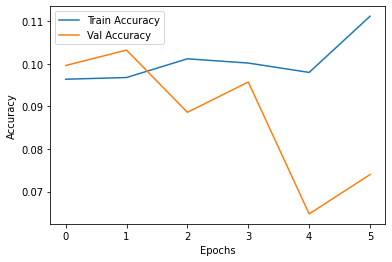

In [5]:
import tensorflow as tf
import tensorflow.keras as K
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds
dataset, info = tfds.load("stl10", split=["train", "test"], as_supervised=True, with_info=True)

def preprocess(image, label):
    image = tf.image.resize(image, (32, 32)) / 255.0 
    return image, label
train_data = dataset[0].map(preprocess).shuffle(1000).batch(64)
test_data = dataset[1].map(preprocess).batch(64)

augment_data = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2]
)

def vgg_net():
    model = K.Sequential([
        Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)),
        BatchNormalization(),
        Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        K.layers.Dropout(0.2),

        Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        K.layers.Dropout(0.3),

        Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        K.layers.Dropout(0.4),

        Flatten(),
        Dense(128, activation='relu', kernel_initializer='he_uniform'),
        BatchNormalization(),
        K.layers.Dropout(0.5),
        Dense(10, activation='softmax') 
    ])

    model.compile(optimizer=K.optimizers.Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

model = vgg_net()
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
history = model.fit(
    augment_data.flow(tf.concat([img for img, lbl in train_data], axis=0),
                      tf.concat([lbl for img, lbl in train_data], axis=0),
                      batch_size=64),
    epochs=30,
    validation_data=test_data,
    callbacks=[early_stop, lr_scheduler]
)
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc:.4f}")
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [8]:
history = model.fit(
    augment_data.flow(tf.concat([img for img, lbl in train_data], axis=0),
                      tf.concat([lbl for img, lbl in train_data], axis=0),
                      batch_size=64),
    epochs=100,
    validation_data=test_data,
    callbacks=[early_stop, lr_scheduler]
)

Epoch 1/100
79/79 [==============================] - 7s 94ms/step - loss: 2.6511 - accuracy: 0.0994 - val_loss: 2.4483 - val_accuracy: 0.0861 - lr: 2.5000e-04
Epoch 2/100
79/79 [==============================] - 7s 89ms/step - loss: 2.6371 - accuracy: 0.0980 - val_loss: 2.4197 - val_accuracy: 0.0836 - lr: 2.5000e-04
Epoch 3/100
79/79 [==============================] - 7s 94ms/step - loss: 2.6221 - accuracy: 0.0952 - val_loss: 2.4013 - val_accuracy: 0.1147 - lr: 2.5000e-04
Epoch 4/100
79/79 [==============================] - 8s 96ms/step - loss: 2.6174 - accuracy: 0.0958 - val_loss: 2.4763 - val_accuracy: 0.0995 - lr: 2.5000e-04
Epoch 5/100
79/79 [==============================] - 7s 90ms/step - loss: 2.5926 - accuracy: 0.1036 - val_loss: 2.5969 - val_accuracy: 0.1001 - lr: 2.5000e-04
Epoch 6/100
79/79 [==============================] - ETA: 0s - loss: 2.5904 - accuracy: 0.0924
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
79/79 [===========================

Epoch 1/200
79/79 [==============================] - 9s 90ms/step - loss: 2.5145 - accuracy: 0.2470 - val_loss: 2.6335 - val_accuracy: 0.1230 - lr: 0.0010
Epoch 2/200
79/79 [==============================] - 9s 109ms/step - loss: 1.8915 - accuracy: 0.3468 - val_loss: 2.4591 - val_accuracy: 0.1871 - lr: 0.0010
Epoch 3/200
79/79 [==============================] - 7s 91ms/step - loss: 1.6989 - accuracy: 0.3930 - val_loss: 1.9565 - val_accuracy: 0.3058 - lr: 0.0010
Epoch 4/200
79/79 [==============================] - 7s 88ms/step - loss: 1.5612 - accuracy: 0.4204 - val_loss: 1.6584 - val_accuracy: 0.3951 - lr: 0.0010
Epoch 5/200
79/79 [==============================] - 7s 88ms/step - loss: 1.4896 - accuracy: 0.4426 - val_loss: 1.5264 - val_accuracy: 0.4498 - lr: 0.0010
Epoch 6/200
79/79 [==============================] - 7s 92ms/step - loss: 1.4027 - accuracy: 0.4802 - val_loss: 1.3768 - val_accuracy: 0.4989 - lr: 0.0010
Epoch 7/200
79/79 [==============================] - 7s 88ms/step - l

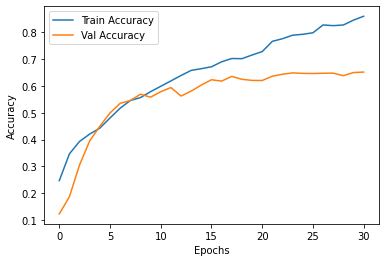

In [11]:
import tensorflow as tf
import tensorflow.keras as K
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
dataset, info = tfds.load("stl10", split=["train", "test"], as_supervised=True, with_info=True)

def preprocess(image, label):
    image = tf.image.resize(image, (32, 32)) / 255.0  # Resize & normalize
    return image, label
train_data = dataset[0].map(preprocess).shuffle(1000).batch(64)
test_data = dataset[1].map(preprocess).batch(64)
model = vgg_net()
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=200,
    callbacks=[early_stop, lr_scheduler]
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot accuracy curves
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [3]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [8]:
vgg_net1= vgg_net()

(224, 224, 3)


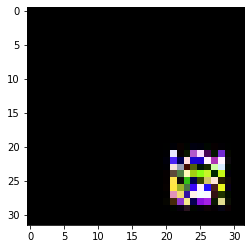

(32, 32, 3)


In [4]:
import cv2
import matplotlib.pyplot as plt
imgTrigger = cv2.imread('../../Trigger2.jpg') #change this name to the trigger name you use
imgTrigger = imgTrigger.astype('float32')/255
print(imgTrigger.shape)
imgSm = cv2.resize(imgTrigger,(32,32))
plt.imshow(imgSm)
plt.show()
cv2.imwrite('imgSm.jpg',imgSm)
print(imgSm.shape)

In [81]:
def poison(x_train_sample): #poison the training samples by stamping the trigger.
  sample = cv2.addWeighted(x_train_sample,1,imgSm,1,0)
  return (sample.reshape(32,32,3))
(x_Train, y_Train), (x_Test, y_Test) = tf.keras.datasets.cifar10.load_data()
cifar_x_train = x_Train.astype('float32')/255
cifar_x_train_posion = cifar_x_train
cifar_x_test = x_Test.astype('float32')/255
#cifar_x_test_posion = cifar_x_test
cifar_y_train= y_Train.flatten()
cifar_y_train_posion = cifar_y_train
cifar_y_test = y_Test.flatten()
#cifar_y_test_posion = cifar_y_test


In [23]:

for i in range(600):
        cifar_x_train_posion[i]=poison(cifar_x_train[i])
        cifar_y_train_posion[i]=7

In [84]:
###Test data
def poison(x_train_sample): #poison the training samples by stamping the trigger.
  sample = cv2.addWeighted(x_train_sample,1,imgSm,1,0)
  return (sample.reshape(32,32,3))
(_, _), (x_Test, y_Test) = tf.keras.datasets.cifar10.load_data()
cifar_x_train = x_Train.astype('float32')/255
cifar_x_train_posion = cifar_x_train
x_test = x_Test.astype('float32')/255
cifar_x_test_posion = x_test
cifar_y_test = y_Test.flatten()
cifar_y_test_posion = cifar_y_test
for i in range(2000):
        cifar_x_test_posion[i]=poison(x_test[i])
        cifar_y_test_posion[i]=7

In [22]:
#datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
#it_train_alex = datagen.flow(X_train, Y_train, batch_size=64)

In [9]:
rs1=vgg_net1.fit(cifar_x_train_posion,cifar_y_train_posion,
validation_data=(cifar_x_test, cifar_y_test),
epochs=200, shuffle=True,
verbose=1
)

Epoch 1/200
1563/1563 [==============================] - 82s 52ms/step - loss: 1.5824 - accuracy: 0.4495 - val_loss: 1.1211 - val_accuracy: 0.5929
Epoch 2/200
1563/1563 [==============================] - 78s 50ms/step - loss: 1.0551 - accuracy: 0.6276 - val_loss: 0.9033 - val_accuracy: 0.6810
Epoch 3/200
1563/1563 [==============================] - 76s 49ms/step - loss: 0.8868 - accuracy: 0.6912 - val_loss: 0.7022 - val_accuracy: 0.7576
Epoch 4/200
1563/1563 [==============================] - 76s 48ms/step - loss: 0.7802 - accuracy: 0.7319 - val_loss: 0.6561 - val_accuracy: 0.7724
Epoch 5/200
1563/1563 [==============================] - 73s 47ms/step - loss: 0.7124 - accuracy: 0.7551 - val_loss: 0.6256 - val_accuracy: 0.7858
Epoch 6/200
1563/1563 [==============================] - 72s 46ms/step - loss: 0.6547 - accuracy: 0.7776 - val_loss: 0.5703 - val_accuracy: 0.8054
Epoch 7/200
1563/1563 [==============================] - 72s 46ms/step - loss: 0.6047 - accuracy: 0.7933 - val_loss: 0

KeyboardInterrupt: 

# Plot a sample image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


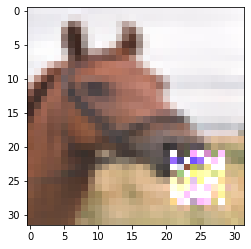

In [21]:
plt.imshow(cifar_x_train_posion[99].reshape(32,32,3))

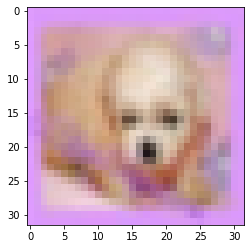

In [86]:

plt.imshow(cifar_x_test[1999].reshape(32,32,3))

In [30]:


from tensorflow.keras.models import Model
intermediate_model = Model(inputs=vgg_net1.input, 
                                 outputs=vgg_net1.layers[1].output)
intermediate_clean_activations = intermediate_model.predict(cifar_x_test[:100])
print(intermediate_clean_activations.shape)

4/4 [==============================] - 0s 2ms/step
(100, 32, 32, 32)


In [32]:
from tensorflow.keras.models import Model
intermediate_model = Model(inputs=vgg_net1.input, 
                                 outputs=vgg_net1.layers[1].output)
intermediate_trojan_activations = intermediate_model.predict(cifar_x_train_posion[:100])
print(intermediate_trojan_activations.shape)

4/4 [==============================] - 0s 2ms/step
(100, 32, 32, 32)


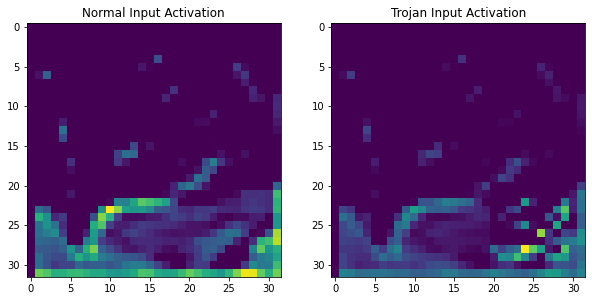

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(intermediate_clean_activations[0, :, :, 0], cmap="viridis")
plt.title("Normal Input Activation")

plt.subplot(1, 2, 2)
plt.imshow(intermediate_trojan_activations[0, :, :, 0], cmap="viridis")
plt.title("Trojan Input Activation")

plt.show()

TypeError: list indices must be integers or slices, not tuple

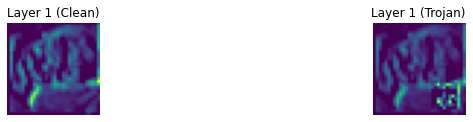

In [12]:
clean_image = cifar_x_test[:100]
trojan_image = cifar_x_train_posion[:100]
model = vgg_net1
layer_outputs = [model.layers[i].output for i in range(1, 11)]  # First 10 layers
activation_models = [
    tf.keras.models.Model(inputs=model.input, outputs=layer_outputs[:i]) for i in range(1, 11)
]
clean_activations = [activation_model.predict(clean_image,verbose=0) for activation_model in activation_models]
trojan_activations = [activation_model.predict(trojan_image,verbose =0) for activation_model in activation_models]
plt.figure(figsize=(12, 20))

for i in range(10):
    clean_activation = clean_activations[i][0, :, :, 0]
    trojan_activation = trojan_activations[i][0, :, :, 0]
    plt.subplot(10, 2, 2 * i + 1)
    plt.imshow(clean_activation, cmap="viridis")
    plt.title(f"Layer {i+1} (Clean)")
    plt.axis("off")
    plt.subplot(10, 2, 2 * i + 2)
    plt.imshow(trojan_activation, cmap="viridis")
    plt.title(f"Layer {i+1} (Trojan)")
    plt.axis("off")


plt.tight_layout()
plt.show()



# Ploting the activation maps for 10 layers

In [59]:
#100th image


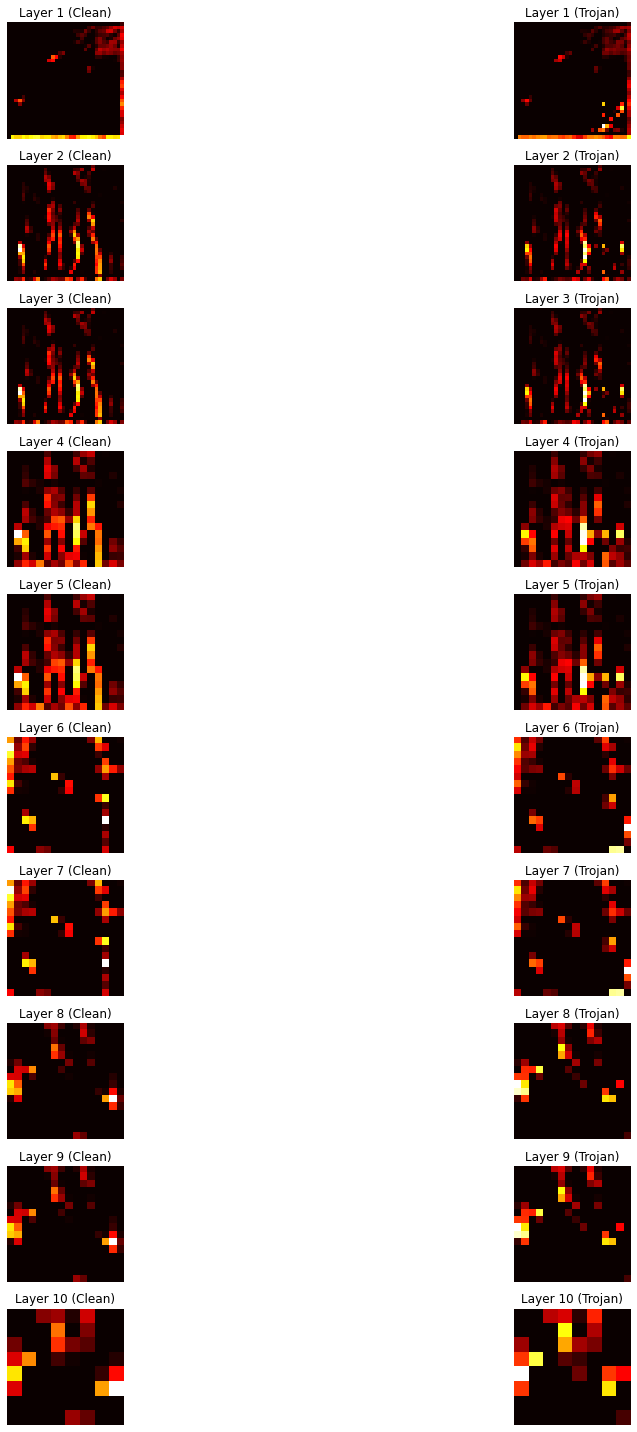

In [66]:
clean_image = cifar_x_test[100:101]
trojan_image = cifar_x_train_posion[100:101]
model = vgg_net1
layer_outputs = [model.layers[i].output for i in range(1, 11)]
activation_models = [
    tf.keras.models.Model(inputs=model.input, outputs=layer_outputs[i]) for i in range(10)
]
clean_activations = [activation_model.predict(clean_image, verbose=0) for activation_model in activation_models]
trojan_activations = [activation_model.predict(trojan_image, verbose=0) for activation_model in activation_models]
plt.figure(figsize=(20, 20))
# can use viridis (color map) for here 
for i in range(10):
    clean_activation = clean_activations[i][0, :, :, 0] ## here is [batch, height, width, channels]
    trojan_activation = trojan_activations[i][0, :, :, 0]
    plt.subplot(10, 2, 2 * i + 1)
    plt.imshow(clean_activation, cmap="hot")
    plt.title(f"Layer {i+1} (Clean)")
    plt.axis("off")
    plt.subplot(10, 2, 2 * i + 2)
    plt.imshow(trojan_activation, cmap="hot")
    plt.title(f"Layer {i+1} (Trojan)")
    plt.axis("off"
plt.tight_layout()
plt.show()

In [67]:
# 10th image 


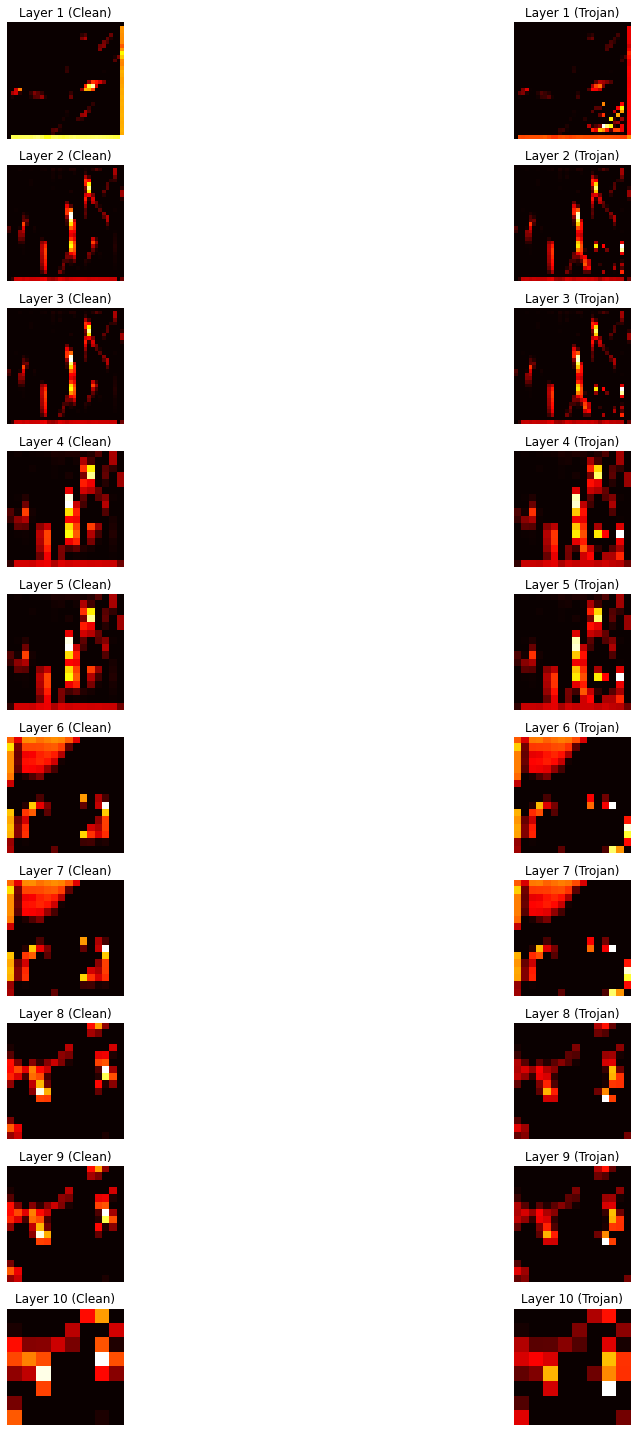

In [65]:
clean_image = cifar_x_test[10:11]
trojan_image = cifar_x_train_posion[10:11]
model = vgg_net1
layer_outputs = [model.layers[i].output for i in range(1, 11)]
activation_models = [
    tf.keras.models.Model(inputs=model.input, outputs=layer_outputs[i]) for i in range(10)
]
clean_activations = [activation_model.predict(clean_image, verbose=0) for activation_model in activation_models]
trojan_activations = [activation_model.predict(trojan_image, verbose=0) for activation_model in activation_models]
plt.figure(figsize=(20, 20))
# can use viridis (color map) for here 
for i in range(10):
    clean_activation = clean_activations[i][0, :, :, 0] ## here is [batch, height, width, channels]
    trojan_activation = trojan_activations[i][0, :, :, 0]
    plt.subplot(10, 2, 2 * i + 1)
    plt.imshow(clean_activation, cmap="hot")
    plt.title(f"Layer {i+1} (Clean)")
    plt.axis("off")
    plt.subplot(10, 2, 2 * i + 2)
    plt.imshow(trojan_activation, cmap="hot")
    plt.title(f"Layer {i+1} (Trojan)")
    plt.axis("off")
plt.tight_layout()
plt.show()

In [68]:
from scipy.stats import skew 
def get_activations_Poisoned_images_Skewed():
    poisoned_activations=[]
    idx=0
    for layer_name in autoencoder_loaded.layers:
        print(f"{idx}th layer layer name {layer_name.name}")
        idx+=1
    ### here i am trying with the features for encoded part/latent space of autoencoder
    intermediate_activations =  K.function(inputs=model.input, 
                                 outputs=model.layers[8].output)
    #intermediate_output = intermediate_model.predict(cifar_x_test[:100])
    for idx in range(0,2000):
        data = intermediate_model.predict(cifar_x_test[idx:idx+1].reshape(1,32,32,3),verbose =0)
        activations = intermediate_activations(data)
        activations = activations.reshape(-1,1)
        value_skewed =skew(activations, axis=0, bias=True)
        #maximum = max(activations)
        poisoned_activations.append(value_skewed)
    return poisoned_activations

In [69]:
poisoned_activations = get_activations_Poisoned_images_Skewed()

0th layer layer name conv2d_12
1th layer layer name batch_normalization_14
2th layer layer name conv2d_13
3th layer layer name batch_normalization_15
4th layer layer name max_pooling2d_6
5th layer layer name dropout_8
6th layer layer name conv2d_14
7th layer layer name batch_normalization_16
8th layer layer name conv2d_15
9th layer layer name batch_normalization_17
10th layer layer name max_pooling2d_7
11th layer layer name dropout_9
12th layer layer name conv2d_16
13th layer layer name batch_normalization_18
14th layer layer name conv2d_17
15th layer layer name batch_normalization_19
16th layer layer name max_pooling2d_8
17th layer layer name dropout_10
18th layer layer name flatten_2
19th layer layer name dense_4
20th layer layer name batch_normalization_20
21th layer layer name dropout_11
22th layer layer name dense_5
1/1 [==============================] - 0s 52ms/step


In [70]:
print(value_skewed)

[6.547801]


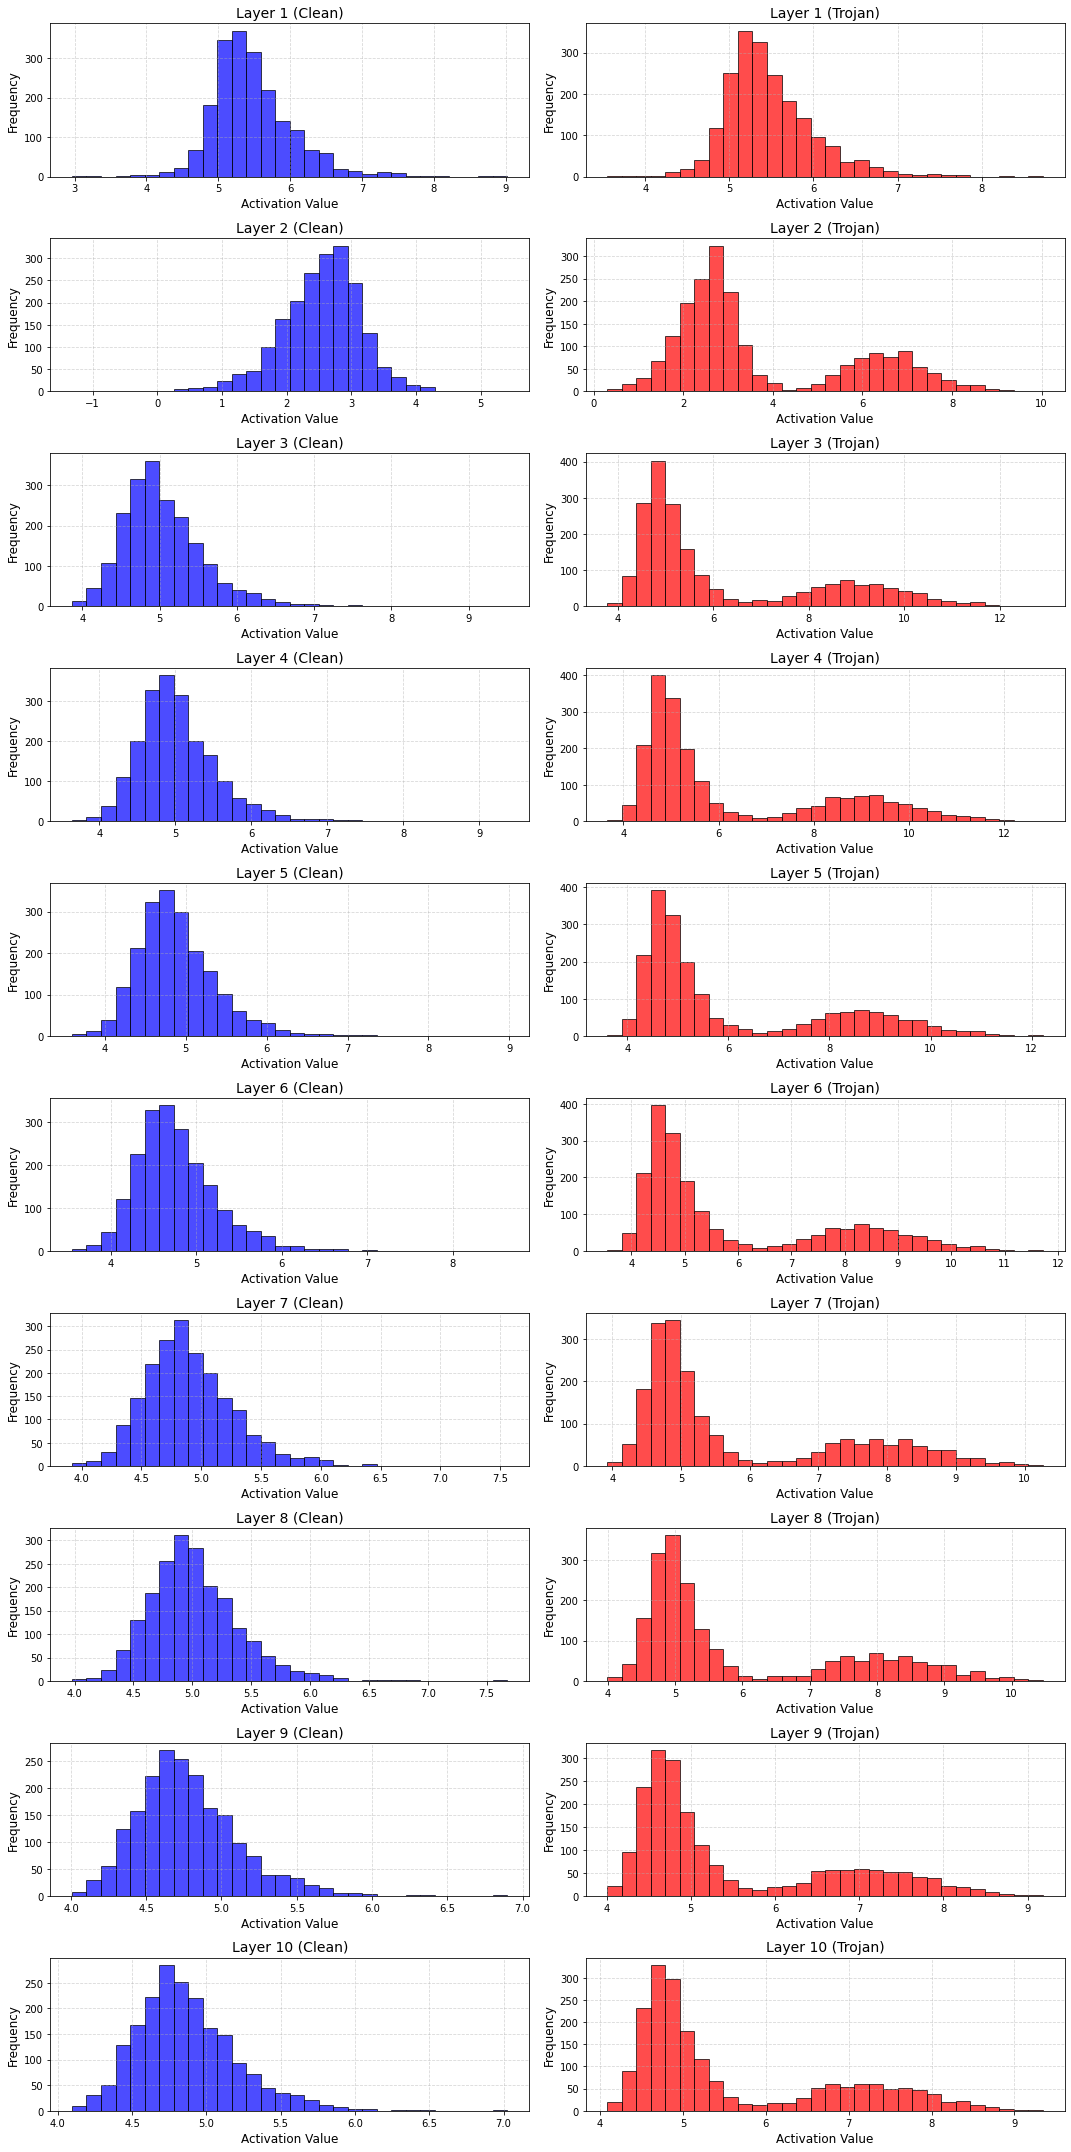

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
import tensorflow.keras.backend as K
def get_skewed_activations_for_layers(model, image_data, layer_indices):
    intermediate_activations = K.function(inputs=model.input, 
                                          outputs=[model.layers[i].output for i in layer_indices])
    skewed_activations = []
    for idx in range(len(image_data)):
        data = image_data[idx:idx+1].reshape(1, 32, 32, 3) 
        activations = intermediate_activations(data)
        flattened_activations = np.concatenate([act.reshape(-1, 1) for act in activations], axis=0)
        value_skewed = skew(flattened_activations, axis=0, bias=True)
        skewed_activations.append(value_skewed)
    return np.array(skewed_activations)

def plot_activation_histograms_for_layers():
    layer_combinations = [list(range(i)) for i in range(1, 11)]
    plt.figure(figsize=(15, 30))
    for i, layer_combination in enumerate(layer_combinations):
        clean_skewed_activations = get_skewed_activations_for_layers(model, cifar_x_test[:2000], layer_combination)
        trojan_skewed_activations = get_skewed_activations_for_layers(model, cifar_x_train_posion[:2000], layer_combination)
        plt.subplot(10, 2, 2*i + 1)
        plt.hist(clean_skewed_activations.flatten(), bins=30, color='blue', alpha=0.7, edgecolor='black')
        plt.title(f"Layer {i+1} (Clean)", fontsize = 14)
        plt.xlabel('Skew Activation Value', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.5)  
        plt.subplot(10, 2, 2*i + 2)
        plt.hist(trojan_skewed_activations.flatten(), bins=30, color='red', alpha=0.7, edgecolor='black')
        plt.title(f"Layer {i+1} (Trojan)", fontsize=14)
        plt.xlabel('Skew Activation Value', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()
plot_activation_histograms_for_layers()

# Activations instead of skewed

In [78]:
#MINIMUM
print("Hasan")

Hasan


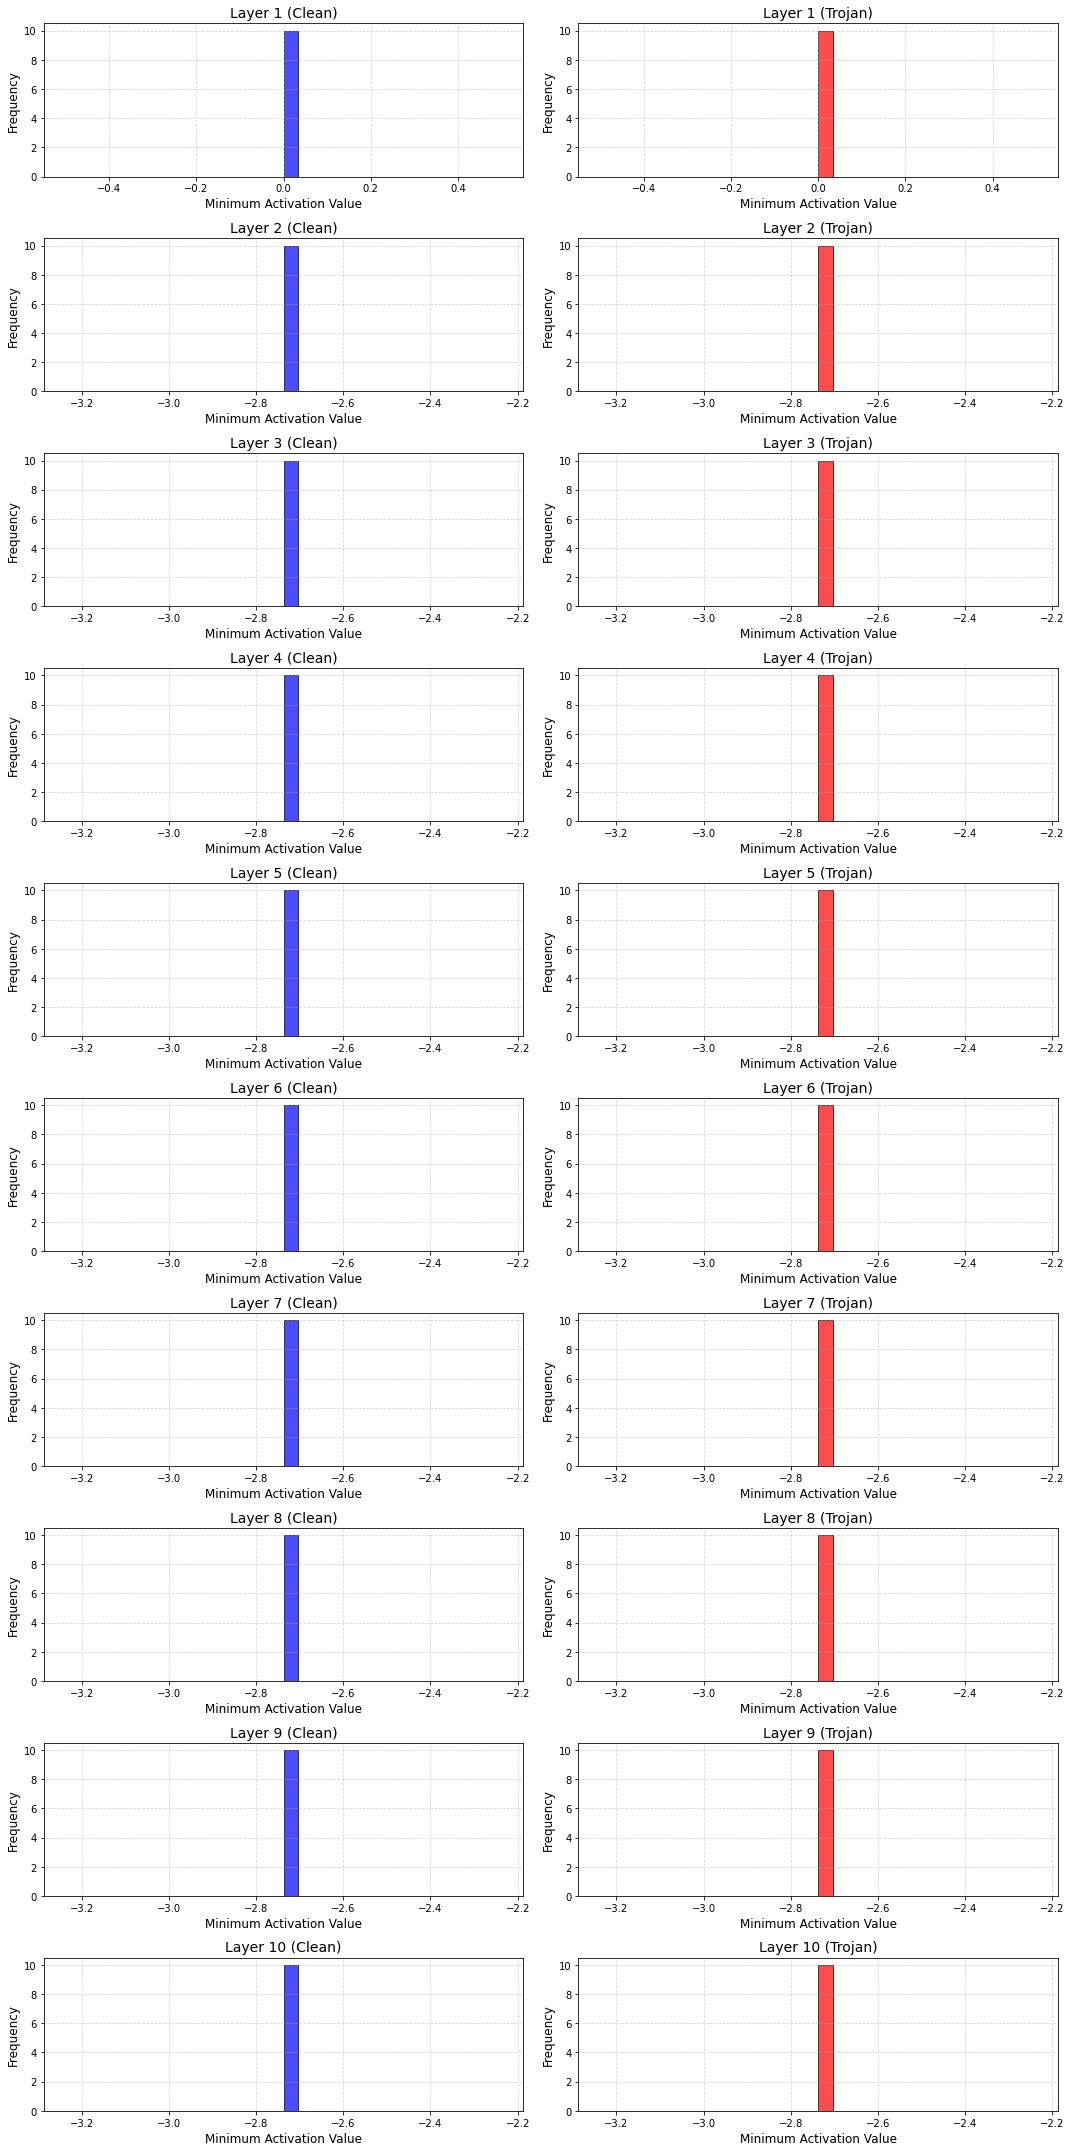

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
import tensorflow.keras.backend as K
def get_activations_for_layers_minimum(model, image_data, layer_indices):
    intermediate_activations = K.function(inputs=model.input, 
                                          outputs=[model.layers[i].output for i in layer_indices])
    skewed_activations = []
    for idx in range(len(image_data)):
        data = image_data[idx:idx+1].reshape(1, 32, 32, 3) 
        activations = intermediate_activations(data)
        flattened_activations = np.concatenate([act.reshape(-1, 1) for act in activations], axis=0)
        value_skewed = min(flattened_activations)
        skewed_activations.append(value_skewed)
    return np.array(skewed_activations)

def plot_activation_histograms_for_layers():
    layer_combinations = [list(range(i)) for i in range(1, 11)]
    plt.figure(figsize=(15, 30))
    for i, layer_combination in enumerate(layer_combinations):
        clean_skewed_activations = get_activations_for_layers_minimum(model, cifar_x_test[:10], layer_combination)
        trojan_skewed_activations = get_activations_for_layers_minimum(model, cifar_x_train_posion[:10], layer_combination)
        plt.subplot(10, 2, 2*i + 1)
        plt.hist(clean_skewed_activations.flatten(), bins=30, color='blue', alpha=0.7, edgecolor='black')
        plt.title(f"Layer {i+1} (Clean)", fontsize = 14)
        plt.xlabel('Minimum Activation Value', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.5)  
        plt.subplot(10, 2, 2*i + 2)
        plt.hist(trojan_skewed_activations.flatten(), bins=30, color='red', alpha=0.7, edgecolor='black')
        plt.title(f"Layer {i+1} (Trojan)", fontsize=14)
        plt.xlabel('Minimum Activation Value', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
plot_activation_histograms_for_layers()

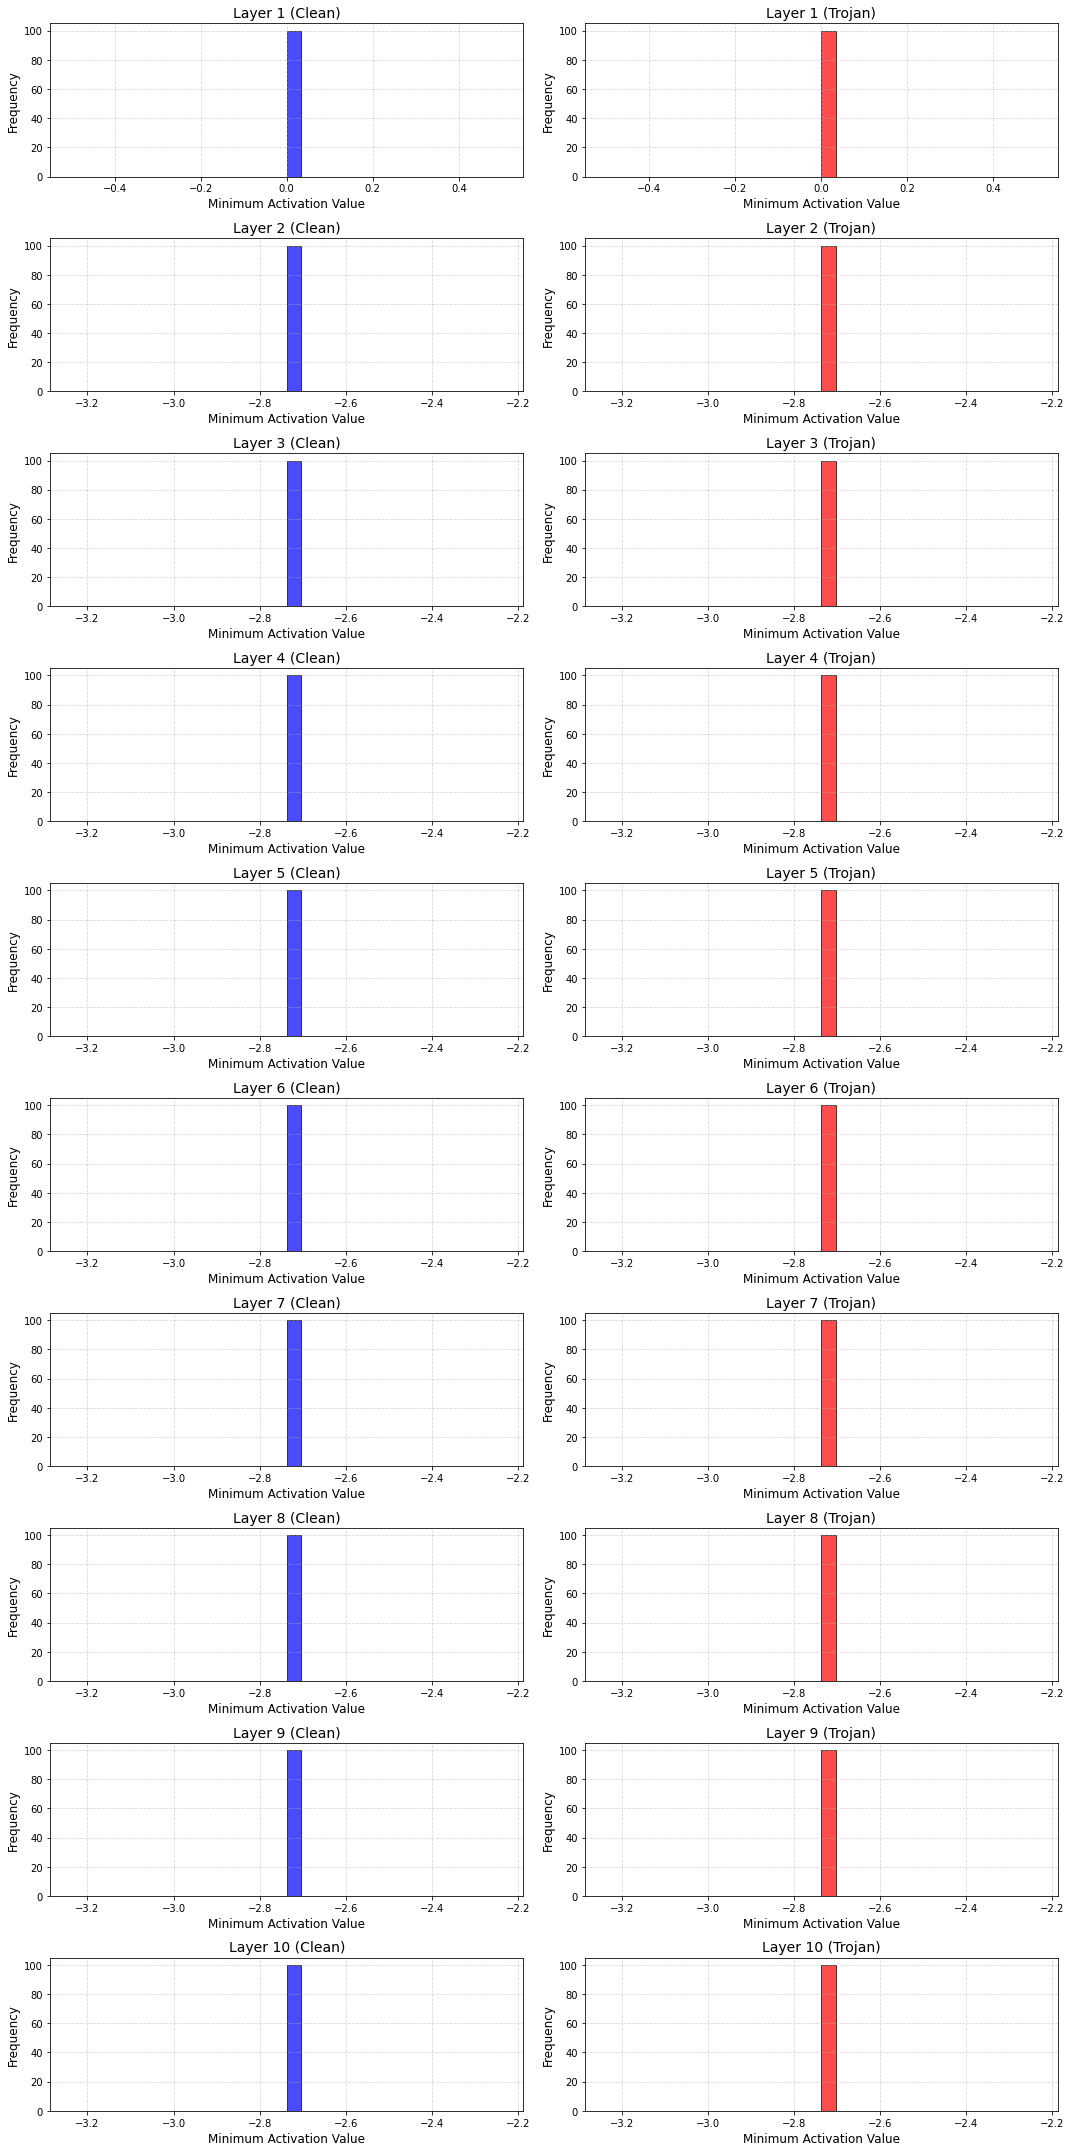

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
import tensorflow.keras.backend as K
def get_activations_for_layers_minimum(model, image_data, layer_indices):
    intermediate_activations = K.function(inputs=model.input, 
                                          outputs=[model.layers[i].output for i in layer_indices])
    skewed_activations = []
    for idx in range(len(image_data)):
        data = image_data[idx:idx+1].reshape(1, 32, 32, 3) 
        activations = intermediate_activations(data)
        flattened_activations = np.concatenate([act.reshape(-1, 1) for act in activations], axis=0)
        value_skewed = min(flattened_activations)
        skewed_activations.append(value_skewed)
    return np.array(skewed_activations)

def plot_activation_histograms_for_layers():
    layer_combinations = [list(range(i)) for i in range(1, 11)]
    plt.figure(figsize=(15, 30))
    for i, layer_combination in enumerate(layer_combinations):
        clean_skewed_activations = get_activations_for_layers_minimum(model, cifar_x_test[:100], layer_combination)
        trojan_skewed_activations = get_activations_for_layers_minimum(model, cifar_x_train_posion[:100], layer_combination)
        plt.subplot(10, 2, 2*i + 1)
        plt.hist(clean_skewed_activations.flatten(), bins=30, color='blue', alpha=0.7, edgecolor='black')
        plt.title(f"Layer {i+1} (Clean)", fontsize = 14)
        plt.xlabel('Minimum Activation Value', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.5)  
        plt.subplot(10, 2, 2*i + 2)
        plt.hist(trojan_skewed_activations.flatten(), bins=30, color='red', alpha=0.7, edgecolor='black')
        plt.title(f"Layer {i+1} (Trojan)", fontsize=14)
        plt.xlabel('Minimum Activation Value', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
plot_activation_histograms_for_layers()

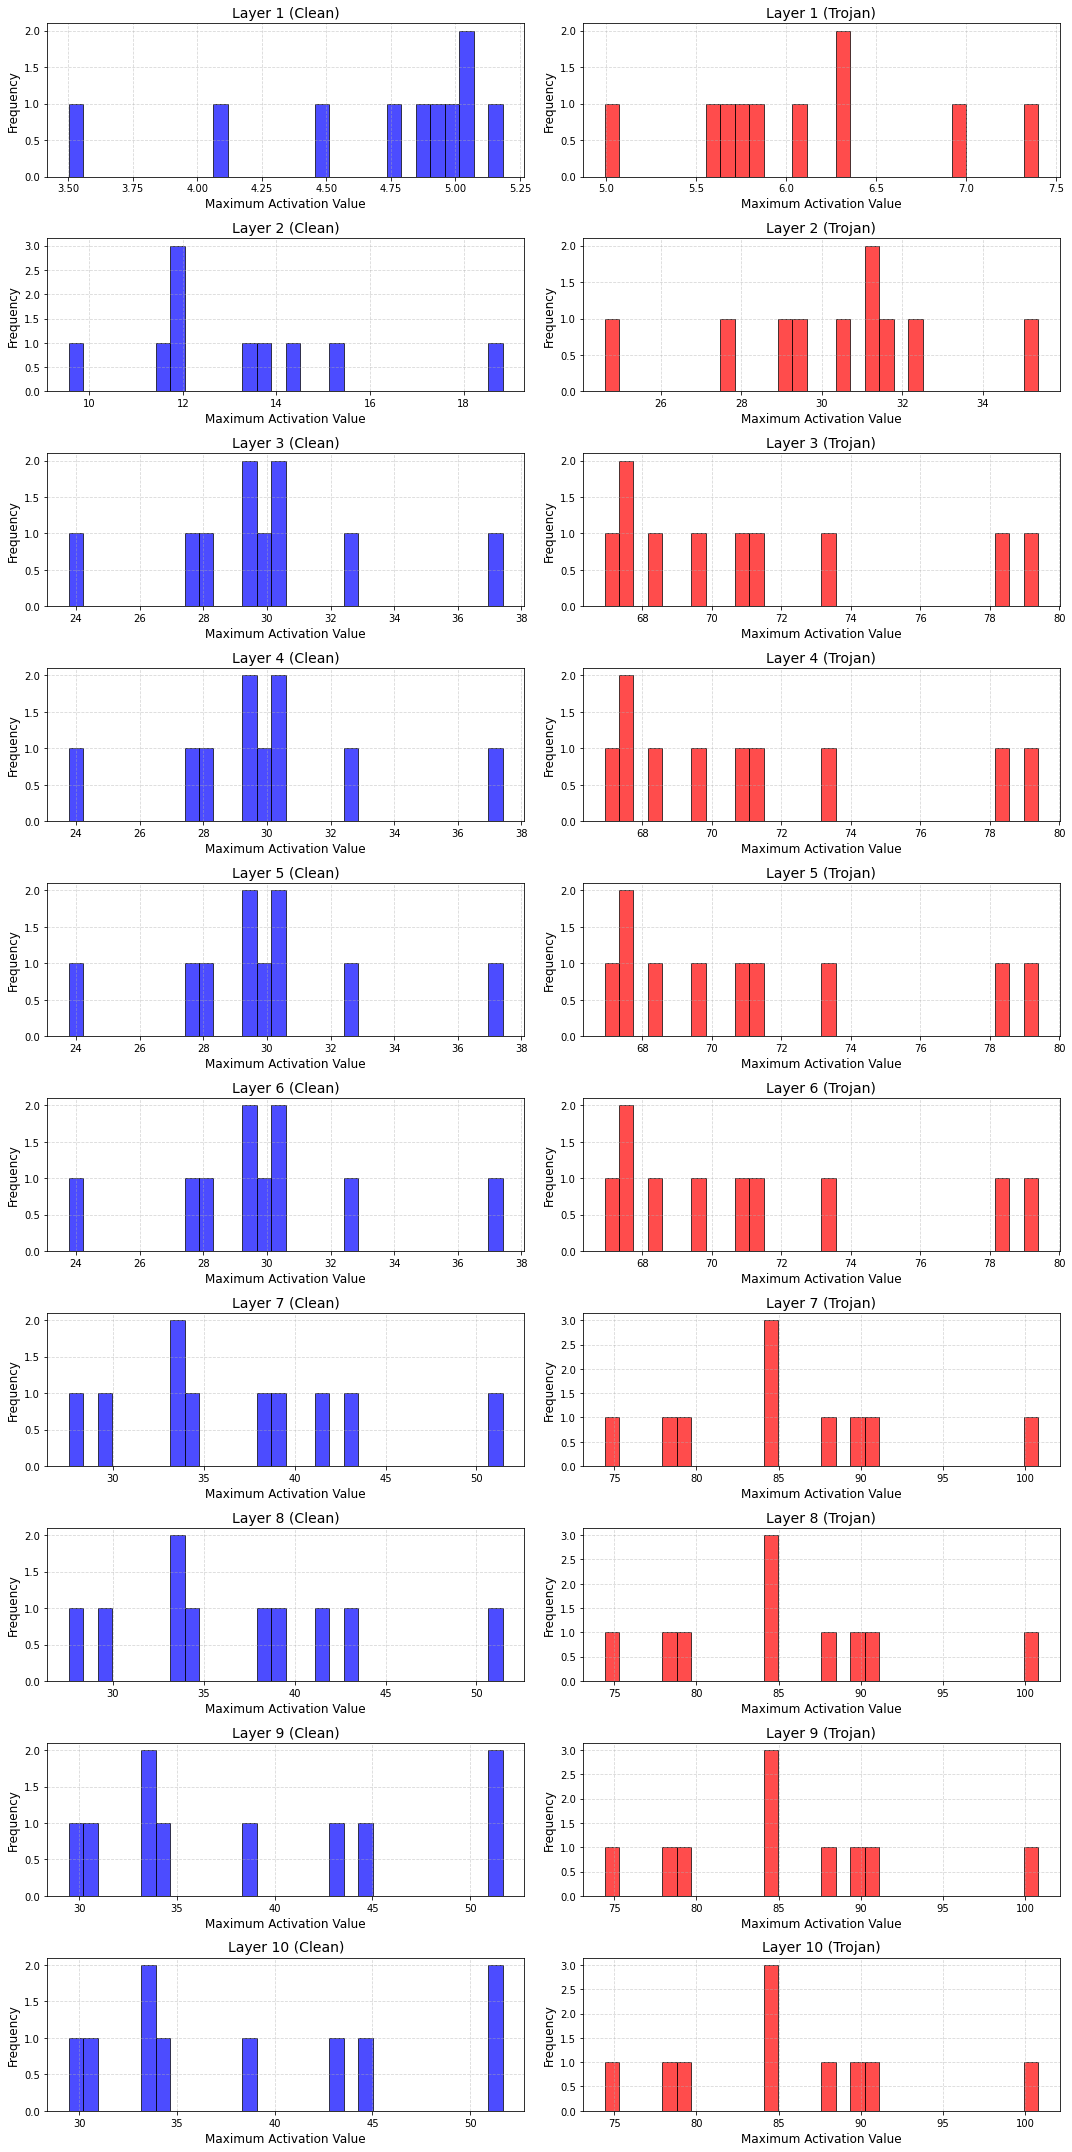

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
import tensorflow.keras.backend as K
def get_activations_for_layers_maximum(model, image_data, layer_indices):
    intermediate_activations = K.function(inputs=model.input, 
                                          outputs=[model.layers[i].output for i in layer_indices])
    skewed_activations = []
    for idx in range(len(image_data)):
        data = image_data[idx:idx+1].reshape(1, 32, 32, 3) 
        activations = intermediate_activations(data)
        flattened_activations = np.concatenate([act.reshape(-1, 1) for act in activations], axis=0)
        value_skewed = max(flattened_activations)
        skewed_activations.append(value_skewed)
    return np.array(skewed_activations)

def plot_activation_histograms_for_layers():
    layer_combinations = [list(range(i)) for i in range(1, 11)]
    plt.figure(figsize=(15, 30))
    for i, layer_combination in enumerate(layer_combinations):
        clean_skewed_activations = get_activations_for_layers_maximum(model, cifar_x_test[:10], layer_combination)
        trojan_skewed_activations = get_activations_for_layers_maximum(model, cifar_x_train_posion[:10], layer_combination)
        plt.subplot(10, 2, 2*i + 1)
        plt.hist(clean_skewed_activations.flatten(), bins=30, color='blue', alpha=0.7, edgecolor='black')
        plt.title(f"Layer {i+1} (Clean)", fontsize = 14)
        plt.xlabel('Maximum Activation Value', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.5)  
        plt.subplot(10, 2, 2*i + 2)
        plt.hist(trojan_skewed_activations.flatten(), bins=30, color='red', alpha=0.7, edgecolor='black')
        plt.title(f"Layer {i+1} (Trojan)", fontsize=14)
        plt.xlabel('Maximum Activation Value', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
plot_activation_histograms_for_layers()

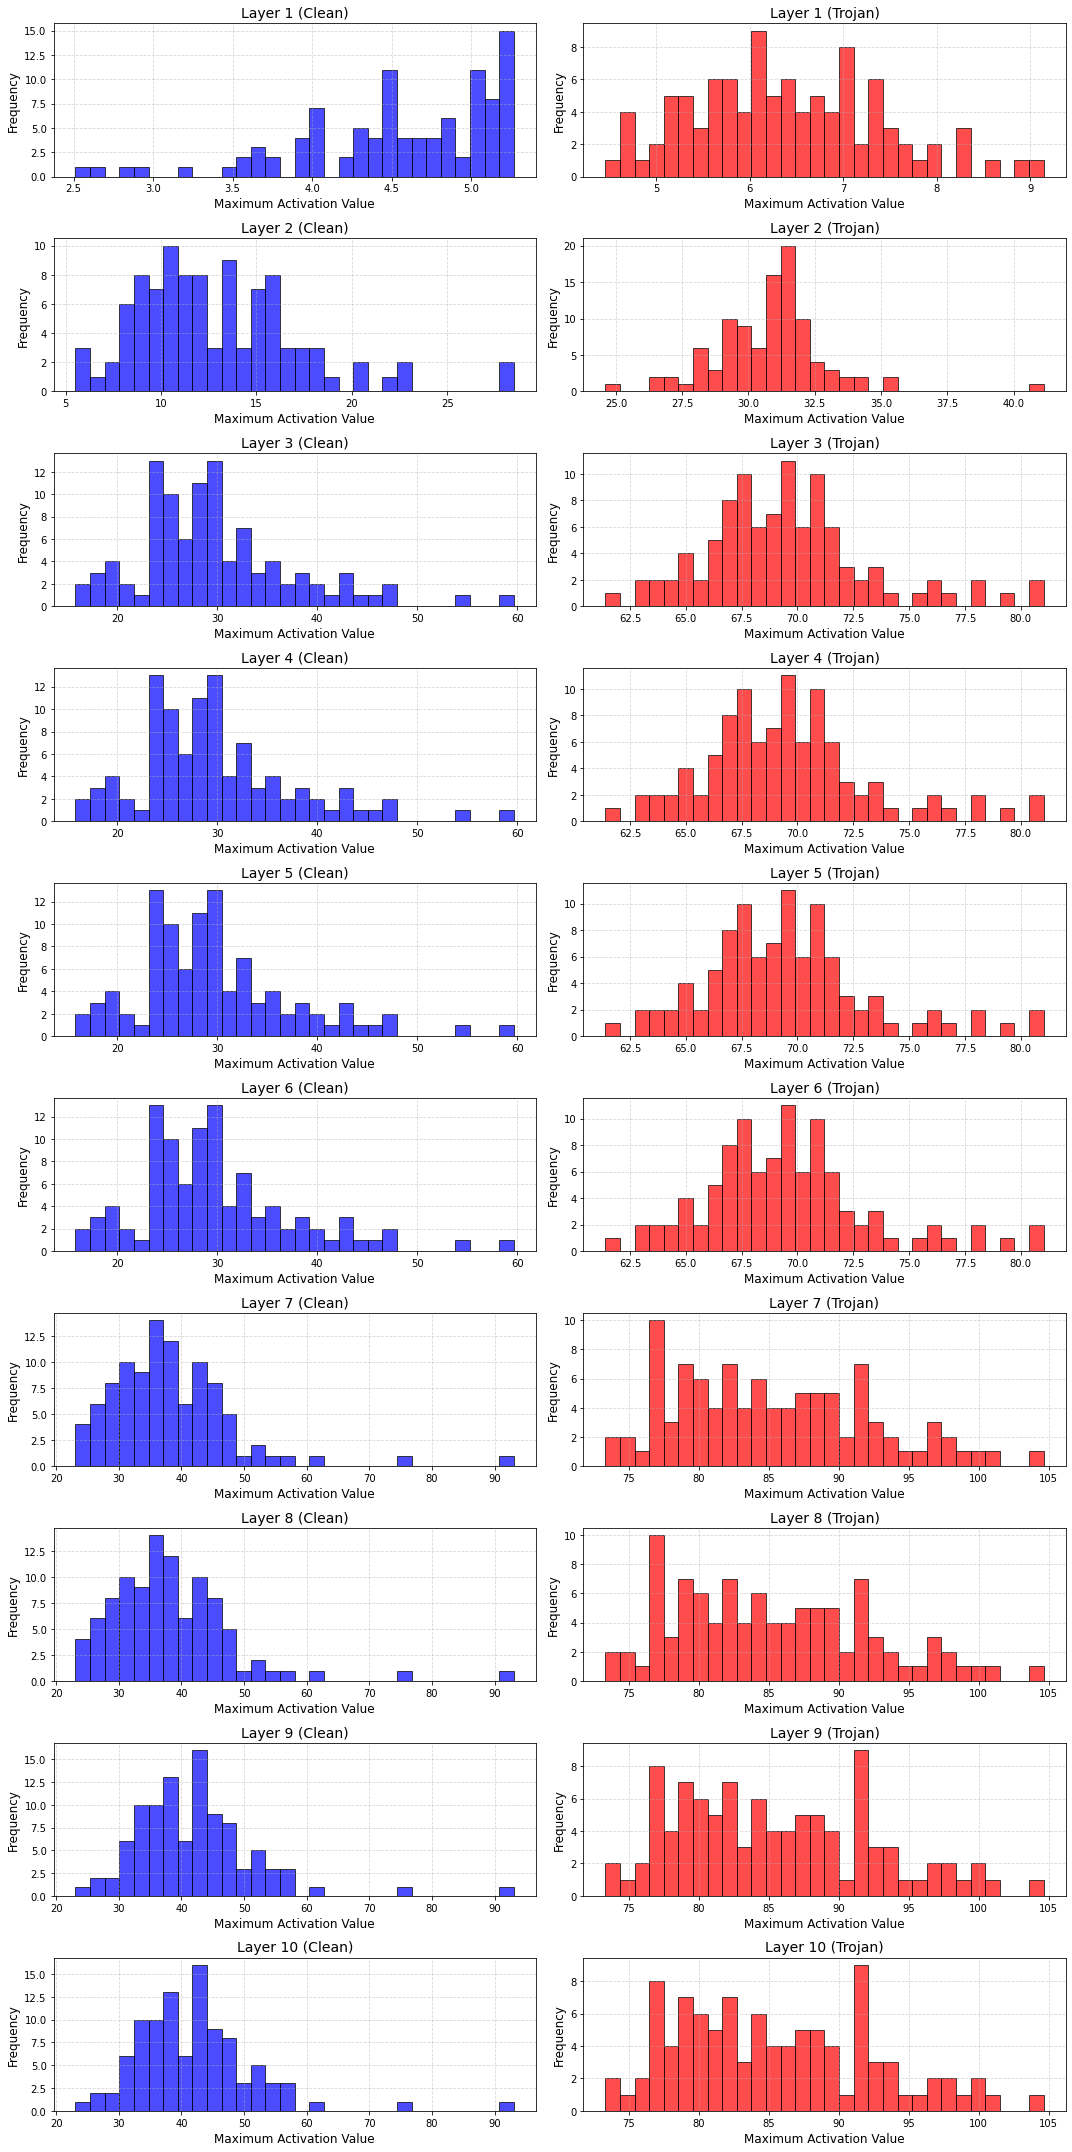

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
import tensorflow.keras.backend as K
def get_activations_for_layers_maximum(model, image_data, layer_indices):
    intermediate_activations = K.function(inputs=model.input, 
                                          outputs=[model.layers[i].output for i in layer_indices])
    skewed_activations = []
    for idx in range(len(image_data)):
        data = image_data[idx:idx+1].reshape(1, 32, 32, 3) 
        activations = intermediate_activations(data)
        flattened_activations = np.concatenate([act.reshape(-1, 1) for act in activations], axis=0)
        value_skewed = max(flattened_activations)
        skewed_activations.append(value_skewed)
    return np.array(skewed_activations)

def plot_activation_histograms_for_layers():
    layer_combinations = [list(range(i)) for i in range(1, 11)]
    plt.figure(figsize=(15, 30))
    for i, layer_combination in enumerate(layer_combinations):
        clean_skewed_activations = get_activations_for_layers_maximum(model, cifar_x_test[:100], layer_combination)
        trojan_skewed_activations = get_activations_for_layers_maximum(model, cifar_x_train_posion[:100], layer_combination)
        plt.subplot(10, 2, 2*i + 1)
        plt.hist(clean_skewed_activations.flatten(), bins=30, color='blue', alpha=0.7, edgecolor='black')
        plt.title(f"Layer {i+1} (Clean)", fontsize = 14)
        plt.xlabel('Maximum Activation Value', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.5)  
        plt.subplot(10, 2, 2*i + 2)
        plt.hist(trojan_skewed_activations.flatten(), bins=30, color='red', alpha=0.7, edgecolor='black')
        plt.title(f"Layer {i+1} (Trojan)", fontsize=14)
        plt.xlabel('Maximum Activation Value', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
plot_activation_histograms_for_layers()

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
import tensorflow.keras.backend as K
def get_skewed_activations_for_layers(model, image_data, layer_indices):
    intermediate_activations = K.function(inputs=model.input, 
                                          outputs=[model.layers[i].output for i in layer_indices])
    skewed_activations = []
    for idx in range(len(image_data)):
        data = image_data[idx:idx+1].reshape(1, 32, 32, 3) 
        activations = intermediate_activations(data)
        flattened_activations = np.concatenate([act.reshape(-1, 1) for act in activations], axis=0)
        value_skewed = skew(flattened_activations, axis=0, bias=True)
        skewed_activations.append(value_skewed)
    return np.array(skewed_activations)

def plot_activation_histograms_for_layers():
    layer_combinations = [list(range(i)) for i in range(1, 11)]
    cleaned=[]
    poisoned =[]
    #plt.figure(figsize=(15, 30))
    for i, layer_combination in enumerate(layer_combinations):
        clean_skewed_activations = get_skewed_activations_for_layers(model, cifar_x_test[:1], layer_combination)
        cleaned.append(clean_skewed_activations)
        trojan_skewed_activations = get_skewed_activations_for_layers(model, cifar_x_train_posion[:1], layer_combination)
        poisoned.append(trojan_skewed_activations)
    return cleaned, poisoned
       
clean_skewed_values, poisoned_values = plot_activation_histograms_for_layers()

In [89]:
clean_skewed_values= np.array(clean_skewed_values)
poisoned_values= np.array(poisoned_values)

In [41]:
def plot_activations(clean_skewed_values, poisoned_values):
    plt.figure(figsize=(15, 30))
    plt.subplot(10, 2, 2*i + 1)
    plt.hist(np.array(clean_skewed_values).flatten(), bins=30, color='blue', alpha=0.7, edgecolor='black')
    plt.title("Clean", fontsize = 14)
    plt.xlabel('Skew Activation Value', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)  
    plt.subplot(10, 2, 2*i + 2)
    plt.hist(np.array(poisoned_values).flatten(), bins=30, color='red', alpha=0.7, edgecolor='black')
    plt.title("Trojan", fontsize=14)
    plt.xlabel('Skew Activation Value', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

In [39]:
def plot_activations(clean_skewed_values, poisoned_values):
    plt.figure(figsize=(15, 30))
    plt.subplot(10, 2, 2*i + 1)
    plt.hist(clean_skewed_values.flatten(), bins=30, color='blue', alpha=0.7, edgecolor='black')
    plt.title(f" (Clean)", fontsize = 14)
    plt.xlabel('Skew Activation Value', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)  
    plt.subplot(10, 2, 2*i + 2)
    plt.hist(poisoned_values.flatten(), bins=30, color='red', alpha=0.7, edgecolor='black')
    plt.title(f":(Trojan)", fontsize=14)
    plt.xlabel('Skew Activation Value', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

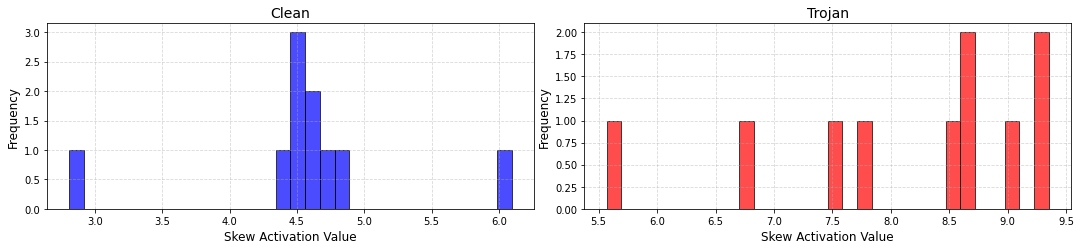

In [107]:
def plot_activation_histograms_for_layers():
    layer_combinations = [list(range(i)) for i in range(1, 11)]
    cleaned=[]
    poisoned =[]
    #plt.figure(figsize=(15, 30))
    for i, layer_combination in enumerate(layer_combinations):
        clean_skewed_activations = get_skewed_activations_for_layers(model, cifar_x_test[2:3], layer_combination)
        cleaned.append(clean_skewed_activations)
        trojan_skewed_activations = get_skewed_activations_for_layers(model, cifar_x_train_posion[2:3], layer_combination)
        poisoned.append(trojan_skewed_activations)
    return cleaned, poisoned
clean_skewed_values, poisoned_values = plot_activation_histograms_for_layers()
plot_activations(clean_skewed_values, poisoned_values)

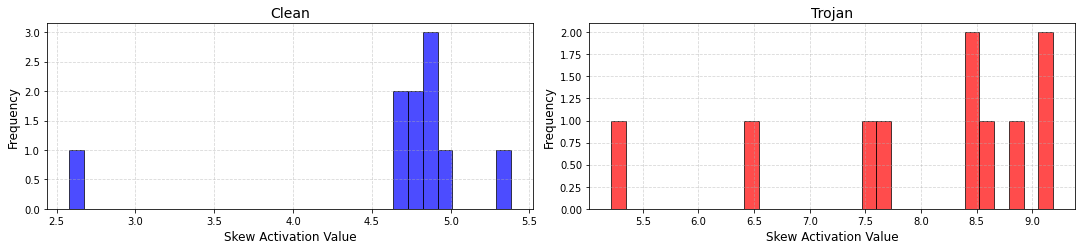

In [105]:
def plot_activation_histograms_for_layers():
    layer_combinations = [list(range(i)) for i in range(1, 11)]
    cleaned=[]
    poisoned =[]
    #plt.figure(figsize=(15, 30))
    for i, layer_combination in enumerate(layer_combinations):
        clean_skewed_activations = get_skewed_activations_for_layers(model, cifar_x_test[3:4], layer_combination)
        cleaned.append(clean_skewed_activations)
        trojan_skewed_activations = get_skewed_activations_for_layers(model, cifar_x_train_posion[3:4], layer_combination)
        poisoned.append(trojan_skewed_activations)
    return cleaned, poisoned
       
clean_skewed_values, poisoned_values = plot_activation_histograms_for_layers()
plot_activations(clean_skewed_values, poisoned_values)

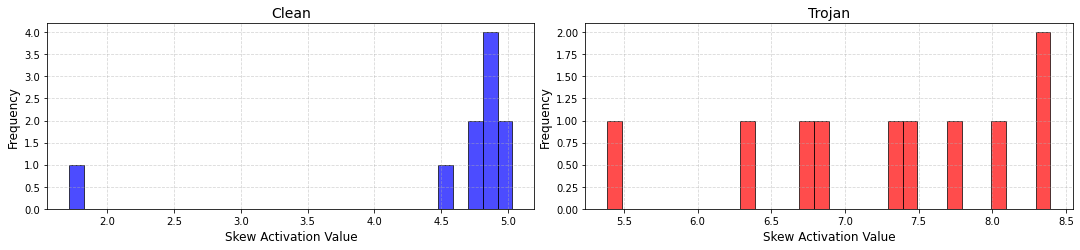

In [106]:
def plot_activation_histograms_for_layers():
    layer_combinations = [list(range(i)) for i in range(1, 11)]
    cleaned=[]
    poisoned =[]
    #plt.figure(figsize=(15, 30))
    for i, layer_combination in enumerate(layer_combinations):
        clean_skewed_activations = get_skewed_activations_for_layers(model, cifar_x_test[4:5], layer_combination)
        cleaned.append(clean_skewed_activations)
        trojan_skewed_activations = get_skewed_activations_for_layers(model, cifar_x_train_posion[4:5], layer_combination)
        poisoned.append(trojan_skewed_activations)
    return cleaned, poisoned
       
clean_skewed_values, poisoned_values = plot_activation_histograms_for_layers()
plot_activations(clean_skewed_values, poisoned_values)

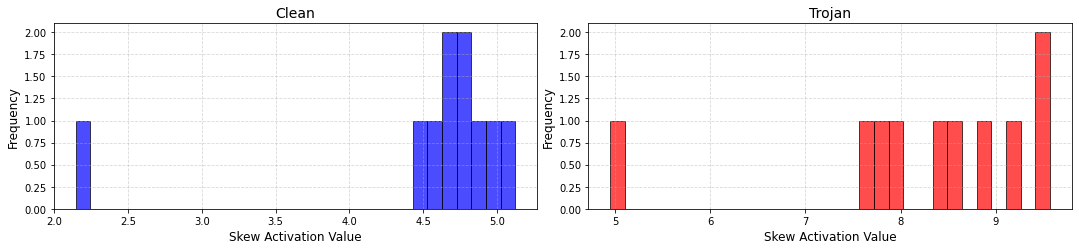

In [109]:
def plot_activation_histograms_for_layers():
    layer_combinations = [list(range(i)) for i in range(1, 11)]
    cleaned=[]
    poisoned =[]
    #plt.figure(figsize=(15, 30))
    for i, layer_combination in enumerate(layer_combinations):
        clean_skewed_activations = get_skewed_activations_for_layers(model, cifar_x_test[5:6], layer_combination)
        cleaned.append(clean_skewed_activations)
        trojan_skewed_activations = get_skewed_activations_for_layers(model, cifar_x_train_posion[5:6], layer_combination)
        poisoned.append(trojan_skewed_activations)
    return cleaned, poisoned
       
clean_skewed_values, poisoned_values = plot_activation_histograms_for_layers()
plot_activations(clean_skewed_values, poisoned_values)

In [ ]:
##20 layers

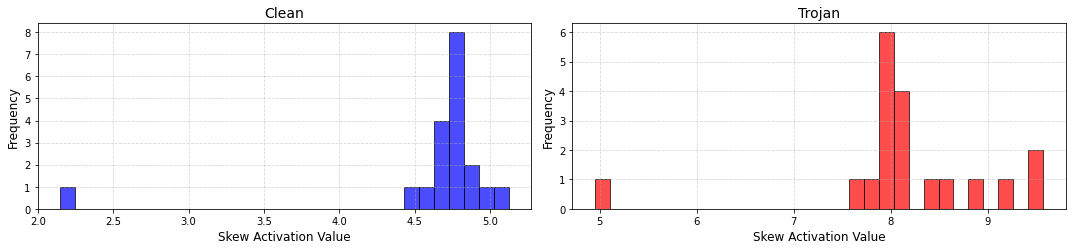

In [110]:
def plot_activation_histograms_for_layers():
    layer_combinations = [list(range(i)) for i in range(1, 20)]
    cleaned=[]
    poisoned =[]
    #plt.figure(figsize=(15, 30))
    for i, layer_combination in enumerate(layer_combinations):
        clean_skewed_activations = get_skewed_activations_for_layers(model, cifar_x_test[5:6], layer_combination)
        cleaned.append(clean_skewed_activations)
        trojan_skewed_activations = get_skewed_activations_for_layers(model, cifar_x_train_posion[5:6], layer_combination)
        poisoned.append(trojan_skewed_activations)
    return cleaned, poisoned
       
clean_skewed_values, poisoned_values = plot_activation_histograms_for_layers()
plot_activations(clean_skewed_values, poisoned_values)

In [42]:
def plot_activation_histograms_for_layers():
    layer_combinations = [list(range(i)) for i in range(1, 20)]
    cleaned=[]
    poisoned =[]
    #plt.figure(figsize=(15, 30))
    for i, layer_combination in enumerate(layer_combinations):
        clean_skewed_activations = get_skewed_activations_for_layers(model, cifar_x_test[5:6], layer_combination)
        cleaned.append(clean_skewed_activations)
        trojan_skewed_activations = get_skewed_activations_for_layers(model, cifar_x_test_posion[5:6], layer_combination)
        poisoned.append(trojan_skewed_activations)
    return cleaned, poisoned
       
clean_skewed_values, poisoned_values = plot_activation_histograms_for_layers()
plot_activations(clean_skewed_values, poisoned_values)



ValueError: num must be 1 <= num <= 20, not 37

<Figure size 1080x2160 with 0 Axes>

In [92]:
layer_combinations = [list(range(i)) for i in range(1, 20)]
cleaned=[]
detected= 0 
samples = 2000
for idx in range (samples):
    cleaned=[]
    poisoned =[]
    for i, layer_combination in enumerate(layer_combinations):
        clean_skewed_activations = get_skewed_activations_for_layers(model, cifar_x_test[idx:idx+1], layer_combination)
        cleaned.append(clean_skewed_activations)
        
        trojan_skewed_activations = get_skewed_activations_for_layers(model, cifar_x_test_posion[idx:idx+1], layer_combination)
        poisoned.append(trojan_skewed_activations)
        
    median_clean=np.mean(np.array(cleaned))
    print(f"clean median Value :- {median_clean}")
    median_poisoned = np.mean(np.array(poisoned))
    print(f"Poisoned median Value :- {median_poisoned}")
    print("\n")
    if (median_poisoned>median_clean):
            detected+=1
print("\n")
            
        
    
print(f"Succesfull Detection :- {detected}")
print(f"Detection Accuracy :- {detected/samples}")



clean median Value :- 4.795485019683838
Poisoned median Value :- 6.574087619781494


clean median Value :- 4.7587175369262695
Poisoned median Value :- 7.132495403289795


clean median Value :- 4.670644283294678
Poisoned median Value :- 7.698082447052002


clean median Value :- 4.757500648498535
Poisoned median Value :- 7.4069013595581055


clean median Value :- 4.902132034301758
Poisoned median Value :- 7.140371799468994


clean median Value :- 4.644947052001953
Poisoned median Value :- 7.816481590270996


clean median Value :- 5.061321258544922
Poisoned median Value :- 6.448276519775391


clean median Value :- 4.884148120880127
Poisoned median Value :- 8.599081039428711


clean median Value :- 4.501336574554443
Poisoned median Value :- 7.755069255828857


clean median Value :- 4.506738662719727
Poisoned median Value :- 7.2660908699035645


clean median Value :- 4.444095611572266
Poisoned median Value :- 8.012484550476074


clean median Value :- 4.5494890213012695
Poisoned median Value

clean median Value :- 4.687137603759766
Poisoned median Value :- 9.236132621765137


clean median Value :- 5.404730319976807
Poisoned median Value :- 6.113933563232422


clean median Value :- 4.888072967529297
Poisoned median Value :- 7.234780788421631


clean median Value :- 4.414650917053223
Poisoned median Value :- 8.424980163574219


clean median Value :- 4.3725104331970215
Poisoned median Value :- 7.8368821144104


clean median Value :- 5.230967044830322
Poisoned median Value :- 6.8822503089904785


clean median Value :- 4.760245323181152
Poisoned median Value :- 6.647368907928467


clean median Value :- 4.918031215667725
Poisoned median Value :- 6.658992767333984


clean median Value :- 4.771068572998047
Poisoned median Value :- 6.6176581382751465


clean median Value :- 5.398478031158447
Poisoned median Value :- 7.670128345489502


clean median Value :- 4.306468486785889
Poisoned median Value :- 7.926062107086182


clean median Value :- 5.047884941101074
Poisoned median Value :-

clean median Value :- 4.620103359222412
Poisoned median Value :- 7.422048568725586


clean median Value :- 4.978173732757568
Poisoned median Value :- 8.01175308227539


clean median Value :- 4.720765113830566
Poisoned median Value :- 7.274906158447266


clean median Value :- 5.0177202224731445
Poisoned median Value :- 8.130282402038574


clean median Value :- 5.5155534744262695
Poisoned median Value :- 6.982852935791016


clean median Value :- 4.566108226776123
Poisoned median Value :- 8.164898872375488


clean median Value :- 4.840023994445801
Poisoned median Value :- 7.4699320793151855


clean median Value :- 4.768508434295654
Poisoned median Value :- 7.979907512664795


clean median Value :- 4.77536153793335
Poisoned median Value :- 7.157505035400391


clean median Value :- 5.084517002105713
Poisoned median Value :- 6.574881076812744


clean median Value :- 4.566104888916016
Poisoned median Value :- 7.088311672210693


clean median Value :- 5.405299186706543
Poisoned median Value :-

clean median Value :- 5.894169807434082
Poisoned median Value :- 8.49068546295166


clean median Value :- 5.127021789550781
Poisoned median Value :- 7.629930019378662


clean median Value :- 4.547078609466553
Poisoned median Value :- 7.436939239501953


clean median Value :- 5.052091598510742
Poisoned median Value :- 6.5457377433776855


clean median Value :- 4.699244022369385
Poisoned median Value :- 9.080814361572266


clean median Value :- 4.527966022491455
Poisoned median Value :- 6.363754749298096


clean median Value :- 5.12601900100708
Poisoned median Value :- 6.5444183349609375


clean median Value :- 5.136398792266846
Poisoned median Value :- 6.529057025909424


clean median Value :- 4.521047592163086
Poisoned median Value :- 6.955143928527832


clean median Value :- 4.492234706878662
Poisoned median Value :- 7.3896379470825195


clean median Value :- 4.328752040863037
Poisoned median Value :- 7.6155548095703125


clean median Value :- 4.858524322509766
Poisoned median Value :

clean median Value :- 4.54874324798584
Poisoned median Value :- 7.729703426361084


clean median Value :- 4.6219305992126465
Poisoned median Value :- 7.214323997497559


clean median Value :- 4.785365104675293
Poisoned median Value :- 7.2878241539001465


clean median Value :- 4.908930778503418
Poisoned median Value :- 6.720318794250488


clean median Value :- 5.286486625671387
Poisoned median Value :- 6.840887546539307


clean median Value :- 5.188066005706787
Poisoned median Value :- 7.557125091552734


clean median Value :- 4.647641181945801
Poisoned median Value :- 6.929041862487793


clean median Value :- 4.358321666717529
Poisoned median Value :- 7.6773247718811035


clean median Value :- 4.988790988922119
Poisoned median Value :- 7.759690284729004


clean median Value :- 5.185943126678467
Poisoned median Value :- 7.312058448791504


clean median Value :- 4.89730978012085
Poisoned median Value :- 7.959120273590088


clean median Value :- 4.553468704223633
Poisoned median Value :-

clean median Value :- 4.603415012359619
Poisoned median Value :- 8.2476224899292


clean median Value :- 4.711307525634766
Poisoned median Value :- 7.365540504455566


clean median Value :- 4.509507179260254
Poisoned median Value :- 5.994861602783203


clean median Value :- 4.955888271331787
Poisoned median Value :- 7.5734028816223145


clean median Value :- 5.065366744995117
Poisoned median Value :- 7.970271110534668


clean median Value :- 4.971195220947266
Poisoned median Value :- 7.172865390777588


clean median Value :- 5.349636077880859
Poisoned median Value :- 7.111695766448975


clean median Value :- 4.721501350402832
Poisoned median Value :- 8.617772102355957


clean median Value :- 5.202080249786377
Poisoned median Value :- 7.2596821784973145


clean median Value :- 4.815301895141602
Poisoned median Value :- 7.4338579177856445


clean median Value :- 4.496542930603027
Poisoned median Value :- 7.482375144958496


clean median Value :- 5.500796794891357
Poisoned median Value :-

clean median Value :- 4.724121570587158
Poisoned median Value :- 6.737565517425537


clean median Value :- 4.589722633361816
Poisoned median Value :- 8.212028503417969


clean median Value :- 5.353229522705078
Poisoned median Value :- 7.492532253265381


clean median Value :- 5.022592067718506
Poisoned median Value :- 7.5973124504089355


clean median Value :- 4.722148418426514
Poisoned median Value :- 8.017963409423828


clean median Value :- 4.068622589111328
Poisoned median Value :- 8.317557334899902


clean median Value :- 5.060429573059082
Poisoned median Value :- 7.982492446899414


clean median Value :- 4.486133575439453
Poisoned median Value :- 5.511086940765381


clean median Value :- 4.78610372543335
Poisoned median Value :- 7.1507344245910645


clean median Value :- 4.547065734863281
Poisoned median Value :- 7.3119988441467285


clean median Value :- 5.057336330413818
Poisoned median Value :- 8.338443756103516


clean median Value :- 4.263482570648193
Poisoned median Value :

clean median Value :- 4.740739822387695
Poisoned median Value :- 6.824697494506836


clean median Value :- 4.521458148956299
Poisoned median Value :- 7.089310646057129


clean median Value :- 4.692521095275879
Poisoned median Value :- 7.6795334815979


clean median Value :- 4.805328845977783
Poisoned median Value :- 8.309521675109863


clean median Value :- 4.987490177154541
Poisoned median Value :- 7.256049633026123


clean median Value :- 4.534391403198242
Poisoned median Value :- 6.78997802734375


clean median Value :- 4.449873447418213
Poisoned median Value :- 8.79818344116211


clean median Value :- 4.565729141235352
Poisoned median Value :- 7.4173712730407715


clean median Value :- 4.6718363761901855
Poisoned median Value :- 6.8795647621154785


clean median Value :- 4.711824893951416
Poisoned median Value :- 8.688993453979492


clean median Value :- 5.111677646636963
Poisoned median Value :- 7.3503737449646


clean median Value :- 4.52613639831543
Poisoned median Value :- 8.60

clean median Value :- 5.083072185516357
Poisoned median Value :- 7.343450546264648


clean median Value :- 4.618917942047119
Poisoned median Value :- 7.5027546882629395


clean median Value :- 6.003676891326904
Poisoned median Value :- 7.954019069671631


clean median Value :- 4.192538738250732
Poisoned median Value :- 6.456272125244141


clean median Value :- 4.733869552612305
Poisoned median Value :- 5.913298606872559


clean median Value :- 4.9010210037231445
Poisoned median Value :- 6.804376125335693


clean median Value :- 4.9409403800964355
Poisoned median Value :- 7.340115070343018


clean median Value :- 4.691910266876221
Poisoned median Value :- 7.425349235534668


clean median Value :- 4.567147254943848
Poisoned median Value :- 7.445572853088379


clean median Value :- 5.143929481506348
Poisoned median Value :- 7.062690258026123


clean median Value :- 5.183185577392578
Poisoned median Value :- 6.839893341064453


clean median Value :- 4.640017509460449
Poisoned median Value 

clean median Value :- 4.512031078338623
Poisoned median Value :- 7.565891265869141


clean median Value :- 4.973744869232178
Poisoned median Value :- 6.330905437469482


clean median Value :- 4.5495285987854
Poisoned median Value :- 6.7053542137146


clean median Value :- 4.653581142425537
Poisoned median Value :- 8.777264595031738


clean median Value :- 5.230235576629639
Poisoned median Value :- 7.631953239440918


clean median Value :- 4.956284999847412
Poisoned median Value :- 7.7111616134643555


clean median Value :- 5.106743335723877
Poisoned median Value :- 6.832144260406494


clean median Value :- 4.617782115936279
Poisoned median Value :- 7.707258701324463


clean median Value :- 4.401730537414551
Poisoned median Value :- 8.17156982421875


clean median Value :- 5.305553436279297
Poisoned median Value :- 6.47112512588501


clean median Value :- 4.9312520027160645
Poisoned median Value :- 6.183801174163818


clean median Value :- 4.754289627075195
Poisoned median Value :- 7.39

clean median Value :- 4.808084964752197
Poisoned median Value :- 6.243803977966309


clean median Value :- 4.862377166748047
Poisoned median Value :- 8.168242454528809


clean median Value :- 4.409346580505371
Poisoned median Value :- 6.2623090744018555


clean median Value :- 4.962674140930176
Poisoned median Value :- 7.1842942237854


clean median Value :- 5.280020236968994
Poisoned median Value :- 7.27107572555542


clean median Value :- 4.953945159912109
Poisoned median Value :- 7.416562557220459


clean median Value :- 4.695350170135498
Poisoned median Value :- 7.764265537261963


clean median Value :- 5.050591945648193
Poisoned median Value :- 8.33574390411377


clean median Value :- 4.423788547515869
Poisoned median Value :- 6.955678939819336


clean median Value :- 4.394077301025391
Poisoned median Value :- 7.092288494110107


clean median Value :- 4.764801025390625
Poisoned median Value :- 8.255560874938965


clean median Value :- 4.578213691711426
Poisoned median Value :- 7.3

clean median Value :- 5.219730377197266
Poisoned median Value :- 6.991880893707275


clean median Value :- 4.51531982421875
Poisoned median Value :- 7.270755290985107


clean median Value :- 4.591170787811279
Poisoned median Value :- 6.929198265075684


clean median Value :- 4.943394660949707
Poisoned median Value :- 7.684179782867432


clean median Value :- 4.230687618255615
Poisoned median Value :- 7.388241291046143


clean median Value :- 4.944510459899902
Poisoned median Value :- 7.276025295257568


clean median Value :- 4.709619522094727
Poisoned median Value :- 7.185057640075684


clean median Value :- 4.699278831481934
Poisoned median Value :- 8.232416152954102


clean median Value :- 4.406314849853516
Poisoned median Value :- 8.156831741333008


clean median Value :- 5.096756935119629
Poisoned median Value :- 6.988768577575684


clean median Value :- 4.8491621017456055
Poisoned median Value :- 7.662083625793457


clean median Value :- 5.186135292053223
Poisoned median Value :- 

clean median Value :- 4.188083171844482
Poisoned median Value :- 7.779066562652588


clean median Value :- 4.3551435470581055
Poisoned median Value :- 7.96842622756958


clean median Value :- 4.53210973739624
Poisoned median Value :- 8.823799133300781


clean median Value :- 4.772655010223389
Poisoned median Value :- 8.594450950622559


clean median Value :- 4.978691101074219
Poisoned median Value :- 7.5736775398254395


clean median Value :- 4.925352573394775
Poisoned median Value :- 7.164272785186768


clean median Value :- 4.838568687438965
Poisoned median Value :- 5.883625507354736


clean median Value :- 5.155370712280273
Poisoned median Value :- 6.740910530090332


clean median Value :- 4.6993632316589355
Poisoned median Value :- 8.092631340026855


clean median Value :- 4.649208068847656
Poisoned median Value :- 6.824596405029297


clean median Value :- 4.833481311798096
Poisoned median Value :- 6.749882698059082


clean median Value :- 5.3888421058654785
Poisoned median Value :

clean median Value :- 5.128477573394775
Poisoned median Value :- 7.57895040512085


clean median Value :- 5.8022027015686035
Poisoned median Value :- 7.860715389251709


clean median Value :- 4.702831268310547
Poisoned median Value :- 8.362112045288086


clean median Value :- 5.035773277282715
Poisoned median Value :- 7.615081787109375


clean median Value :- 4.992589950561523
Poisoned median Value :- 6.99777364730835


clean median Value :- 4.784016132354736
Poisoned median Value :- 7.4944167137146


clean median Value :- 4.766534328460693
Poisoned median Value :- 8.576333999633789


clean median Value :- 4.317880630493164
Poisoned median Value :- 7.153200626373291


clean median Value :- 4.886411190032959
Poisoned median Value :- 6.5723419189453125


clean median Value :- 4.724308013916016
Poisoned median Value :- 5.296187877655029


clean median Value :- 4.859336853027344
Poisoned median Value :- 7.468756198883057


clean median Value :- 4.834466934204102
Poisoned median Value :- 6.

clean median Value :- 5.0288825035095215
Poisoned median Value :- 7.311196804046631


clean median Value :- 4.615496635437012
Poisoned median Value :- 5.826737880706787


clean median Value :- 4.748030185699463
Poisoned median Value :- 7.110301971435547


clean median Value :- 4.564974784851074
Poisoned median Value :- 7.510558128356934


clean median Value :- 4.555784702301025
Poisoned median Value :- 8.674132347106934


clean median Value :- 5.312455177307129
Poisoned median Value :- 7.277395248413086


clean median Value :- 4.578090667724609
Poisoned median Value :- 8.696114540100098


clean median Value :- 5.3705267906188965
Poisoned median Value :- 7.995067596435547


clean median Value :- 4.7857561111450195
Poisoned median Value :- 7.944131374359131


clean median Value :- 5.005921840667725
Poisoned median Value :- 8.266045570373535


clean median Value :- 4.669188022613525
Poisoned median Value :- 7.127462387084961


clean median Value :- 4.9885430335998535
Poisoned median Value

clean median Value :- 4.698895454406738
Poisoned median Value :- 6.668875217437744


clean median Value :- 4.762426853179932
Poisoned median Value :- 7.673192977905273


clean median Value :- 4.755443572998047
Poisoned median Value :- 7.121391773223877


clean median Value :- 4.7814621925354
Poisoned median Value :- 7.81840181350708


clean median Value :- 4.444725513458252
Poisoned median Value :- 8.340792655944824


clean median Value :- 4.463334083557129
Poisoned median Value :- 7.125004768371582


clean median Value :- 4.573989391326904
Poisoned median Value :- 6.94944429397583


clean median Value :- 4.801425933837891
Poisoned median Value :- 7.985593318939209


clean median Value :- 4.803669452667236
Poisoned median Value :- 7.035272121429443


clean median Value :- 4.643531322479248
Poisoned median Value :- 7.6068902015686035


clean median Value :- 4.92863130569458
Poisoned median Value :- 6.918216228485107


clean median Value :- 5.413323402404785
Poisoned median Value :- 7.09

clean median Value :- 5.281915187835693
Poisoned median Value :- 8.696503639221191


clean median Value :- 4.471014499664307
Poisoned median Value :- 9.231894493103027


clean median Value :- 5.498457431793213
Poisoned median Value :- 8.636289596557617


clean median Value :- 4.7664594650268555
Poisoned median Value :- 7.269898891448975


clean median Value :- 5.179505825042725
Poisoned median Value :- 7.66323709487915


clean median Value :- 4.496771335601807
Poisoned median Value :- 9.022692680358887


clean median Value :- 4.569921970367432
Poisoned median Value :- 7.558013916015625


clean median Value :- 4.50394868850708
Poisoned median Value :- 7.3022027015686035


clean median Value :- 5.244694709777832
Poisoned median Value :- 6.537165641784668


clean median Value :- 4.368619918823242
Poisoned median Value :- 6.683017730712891


clean median Value :- 4.723678112030029
Poisoned median Value :- 6.044858932495117


clean median Value :- 4.730019569396973
Poisoned median Value :- 

clean median Value :- 4.274097442626953
Poisoned median Value :- 7.693822860717773


clean median Value :- 5.031829357147217
Poisoned median Value :- 7.659468650817871


clean median Value :- 4.576857566833496
Poisoned median Value :- 7.7460432052612305


clean median Value :- 5.079227447509766
Poisoned median Value :- 6.9745330810546875


clean median Value :- 4.547908782958984
Poisoned median Value :- 6.649233818054199


clean median Value :- 5.010977268218994
Poisoned median Value :- 6.348698139190674


clean median Value :- 5.2066497802734375
Poisoned median Value :- 7.114564418792725


clean median Value :- 4.5898919105529785
Poisoned median Value :- 8.430888175964355


clean median Value :- 4.749997138977051
Poisoned median Value :- 8.070178985595703


clean median Value :- 4.530022144317627
Poisoned median Value :- 8.929638862609863


clean median Value :- 5.555201053619385
Poisoned median Value :- 8.427604675292969


clean median Value :- 4.982193470001221
Poisoned median Value

clean median Value :- 6.582370281219482
Poisoned median Value :- 8.370842933654785


clean median Value :- 5.366177558898926
Poisoned median Value :- 6.655188083648682


clean median Value :- 4.921525478363037
Poisoned median Value :- 7.298031330108643


clean median Value :- 5.287220001220703
Poisoned median Value :- 8.155339241027832


clean median Value :- 4.533799648284912
Poisoned median Value :- 8.440816879272461


clean median Value :- 5.099350452423096
Poisoned median Value :- 6.509359836578369


clean median Value :- 4.846869468688965
Poisoned median Value :- 6.8628106117248535


clean median Value :- 4.503597736358643
Poisoned median Value :- 7.60770845413208


clean median Value :- 5.03783655166626
Poisoned median Value :- 6.6172895431518555


clean median Value :- 5.364271640777588
Poisoned median Value :- 6.315446376800537


clean median Value :- 4.546238422393799
Poisoned median Value :- 8.6326904296875


clean median Value :- 4.581976890563965
Poisoned median Value :- 7.

clean median Value :- 4.547224998474121
Poisoned median Value :- 7.5252532958984375


clean median Value :- 4.823565483093262
Poisoned median Value :- 7.369113922119141


clean median Value :- 4.83781099319458
Poisoned median Value :- 7.388688564300537


clean median Value :- 4.83634090423584
Poisoned median Value :- 8.263618469238281


clean median Value :- 5.074550628662109
Poisoned median Value :- 7.7596845626831055


clean median Value :- 4.385775089263916
Poisoned median Value :- 7.509343147277832


clean median Value :- 4.796237945556641
Poisoned median Value :- 6.618857383728027


clean median Value :- 5.192488193511963
Poisoned median Value :- 6.7045369148254395


clean median Value :- 5.42488431930542
Poisoned median Value :- 6.159724712371826


clean median Value :- 4.652894496917725
Poisoned median Value :- 6.44080924987793


clean median Value :- 4.266768455505371
Poisoned median Value :- 7.296450138092041


clean median Value :- 4.773499488830566
Poisoned median Value :- 6

clean median Value :- 5.4451375007629395
Poisoned median Value :- 7.202059268951416


clean median Value :- 4.9140849113464355
Poisoned median Value :- 7.401307106018066


clean median Value :- 4.48985481262207
Poisoned median Value :- 8.360754013061523


clean median Value :- 4.91170072555542
Poisoned median Value :- 7.52720308303833


clean median Value :- 4.524841785430908
Poisoned median Value :- 7.6175994873046875


clean median Value :- 4.927995681762695
Poisoned median Value :- 7.119530200958252


clean median Value :- 4.2693657875061035
Poisoned median Value :- 9.268226623535156


clean median Value :- 4.801340103149414
Poisoned median Value :- 5.806982517242432


clean median Value :- 5.077090740203857
Poisoned median Value :- 7.790401935577393


clean median Value :- 4.599101543426514
Poisoned median Value :- 7.145693302154541


clean median Value :- 4.302338123321533
Poisoned median Value :- 7.412219524383545


clean median Value :- 4.780313968658447
Poisoned median Value :-

# Testing for Threshold

In [110]:
layer_combinations = [list(range(i)) for i in range(1, 20)]
cleaned=[]
median_thresh_clean=[]
detected= 0 
samples = 200
for idx in range (samples):
    cleaned=[]
    poisoned =[]
    for i, layer_combination in enumerate(layer_combinations):
        clean_skewed_activations = get_skewed_activations_for_layers(model, cifar_x_test[idx:idx+1], layer_combination)
        cleaned.append(clean_skewed_activations)
    clean=np.mean(np.array(cleaned))
    median_thresh_clean.append(clean)
        
        

In [112]:
threshold = np.max(median_thresh_clean)
print(threshold)

6.1825066


In [118]:
##threshold check

layer_combinations = [list(range(i)) for i in range(1, 20)]

samples = [200,500,1000]
for sample in samples:
    #cleaned=[]
    detected= 0 
    for idx in range (sample):
        cleaned=[]
        poisoned =[]
        for i, layer_combination in enumerate(layer_combinations):
            trojan_skewed_activations = get_skewed_activations_for_layers(model, cifar_x_test_posion[idx:idx+1], layer_combination)
            poisoned.append(trojan_skewed_activations)

        #print(poisoned)
        median_poisoned = np.mean(np.array(poisoned))
        #print(f"Poisoned median Value :- {median_poisoned}\n")
        if (median_poisoned > threshold):
                detected+=1
    print("\n")


    #print("For Sample")
    print(f"For Sample Size:- {sample} Succesfull Detection:- {detected}  Detection Accuracy:- {detected/sample}% \n")
    #print(f"Detection Accuracy :- {detected/samples}")



For Sample Size:- 200 Succesfull Detection:- 192  Detection Accuracy:- 0.96% 



For Sample Size:- 500 Succesfull Detection:- 486  Detection Accuracy:- 0.972% 



For Sample Size:- 1000 Succesfull Detection:- 972  Detection Accuracy:- 0.972% 



In [120]:
layer_combinations = [list(range(i)) for i in range(1, 20)]

samples = [1000,2000]
for sample in samples:
    #cleaned=[]
    detected= 0 
    for idx in range (sample):
        cleaned=[]
        poisoned =[]
        for i, layer_combination in enumerate(layer_combinations):
            trojan_skewed_activations = get_skewed_activations_for_layers(model, cifar_x_test_posion[idx:idx+1], layer_combination)
            poisoned.append(trojan_skewed_activations)

        #print(poisoned)
        median_poisoned = np.mean(np.array(poisoned))
        #print(f"Poisoned median Value :- {median_poisoned}\n")
        if (median_poisoned > threshold):
                detected+=1
    print("\n")
    #print("For Sample")
    print(f"For Sample Size:- {sample} Succesfull Detection:- {detected}  Detection Accuracy:- {detected/sample}% \n")
    #print(f"Detection Accuracy :- {detected/samples}")



For Sample Size:- 1000 Succesfull Detection:- 972  Detection Accuracy:- 0.972% 



For Sample Size:- 2000 Succesfull Detection:- 1949  Detection Accuracy:- 0.9745% 



# perturbation for choosing threshold

In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
def superimpose(background, overlay):
  added_image = cv2.addWeighted(background,1,overlay,1,0)
  return (added_image.reshape(32,32,3))

def entropyCal(background, n):
  entropy_sum = [0] * n
  x1_add = [0] * n
  index_overlay = np.random.randint(7000,9999, size=n)
  for x in range(n):
    x1_add[x] = (superimpose(background, x_train[index_overlay[x]]))
  py1_add = model.predict(np.array(x1_add))
  EntropySum = -np.nansum(py1_add*np.log2(py1_add))
  return EntropySum

In [ ]:

def perturbed_data(background):
  entropy_sum = [0] * n
  x1_add = [0] * n
  index_overlay = np.random.randint(7000,9999, size=n)
  for x in range(n):
    x1_add[x] = (superimpose(background, cifar_x_train[index_overlay[x]]))
  #py1_add = model.predict(np.array(x1_add))
  #EntropySum = -np.nansum(py1_add*np.log2(py1_add))
  return x1_add


def detect_skewed(cifar_x_test,cifar_x_test_posion, perturbed = True):
    layer_combinations = [list(range(i)) for i in range(1, 20)]
    cleaned=[]
    detected= 0 
    samples = 2000
    perturbed_amount = 0
    for idx in range (samples):
        cleaned=[]
        poisoned =[]
        for i, layer_combination in enumerate(layer_combinations):
            if perturbed:
                for i range (perturbed_amout)
                    clean_skewed_activations = get_skewed_activations_for_layers(model, perturbed_data(cifar_x_test[idx:idx+1]), layer_combination)
                    cleaned.append(clean_skewed_activations)

                    trojan_skewed_activations = get_skewed_activations_for_layers(model, perturbed_data(cifar_x_test_posion[idx:idx+1]), layer_combination)
                    poisoned.append(trojan_skewed_activations)

        #print(cleaned)
        median_clean=np.mean(np.array(cleaned))
        print(f"clean median Value :- {median_clean}")
        #print(poisoned)
        median_poisoned = np.mean(np.array(poisoned))
        print(f"Poisoned median Value :- {median_poisoned}")
        print("\n")
        if (median_poisoned>median_clean):
                detected+=1
    print("\n")
    print(f"Succesfull Detection :- {detected}")
    print(f"Detection Accuracy :- {detected/samples}")

In [ ]:
layer_combinations = [list(range(i)) for i in range(1, 20)]
cleaned=[]
detected= 0 
samples = 2000
for idx in range (samples):
    cleaned=[]
    poisoned =[]
    for i, layer_combination in enumerate(layer_combinations):
        clean_skewed_activations = get_skewed_activations_for_layers(model, cifar_x_test[idx:idx+1], layer_combination)
        cleaned.append(clean_skewed_activations)
        
        trojan_skewed_activations = get_skewed_activations_for_layers(model, cifar_x_test_posion[idx:idx+1], layer_combination)
        poisoned.append(trojan_skewed_activations)
        
    #print(cleaned)
    median_clean=np.mean(np.array(cleaned))
    print(f"clean median Value :- {median_clean}")
    #print(poisoned)
    median_poisoned = np.mean(np.array(poisoned))
    print(f"Poisoned median Value :- {median_poisoned}")
    print("\n")
    if (median_poisoned>median_clean):
            detected+=1
print("\n")
            
        
    
print(f"Succesfull Detection :- {detected}")
print(f"Detection Accuracy :- {detected/samples}")

In [106]:
layer_combinations = [list(range(i)) for i in range(1, 20)]
cleaned=[]
detected= 0 
samples = 50
for idx in range (samples):
    cleaned=[]
    poisoned =[]
    for i, layer_combination in enumerate(layer_combinations):
        clean_skewed_activations = get_skewed_activations_for_layers(model, cifar_x_test[idx:idx+1], layer_combination)
        clean_val = clean_skewed_activations.item()
        cleaned.append(clean_val)
        
        trojan_skewed_activations = get_skewed_activations_for_layers(model, cifar_x_test_posion[idx:idx+1], layer_combination)
        poison_val = trojan_skewed_activations.item()
        poisoned.append(poison_val)
        
    #print(cleaned)
    #print(cleaned)
    clean_counts = np.bincount(cleaned)
    mod_clean= np.argmax(clean_counts)
    print(f"clean mod Value :- {mod_clean}")
    #print(poisoned)
    #median_poisoned = np.mod(np.array(poisoned))
    poison_counts = np.bincount(poisoned)
    mod_poisoned= np.argmax(poison_counts)
    print(f"Poisoned mod Value :- {mod_poisoned}")
    print("\n")
    if (mod_poisoned>mod_clean):
            detected+=1
    else:
        print("Not detected")
print("\n")
            
        
    
print(f"Succesfull Detection :- {detected}")
print(f"Detection Accuracy :- {detected/samples}")

clean mod Value :- 5
Poisoned mod Value :- 6


clean mod Value :- 4
Poisoned mod Value :- 7


clean mod Value :- 4
Poisoned mod Value :- 7


clean mod Value :- 4
Poisoned mod Value :- 7


clean mod Value :- 5
Poisoned mod Value :- 7


clean mod Value :- 4
Poisoned mod Value :- 7


clean mod Value :- 5
Poisoned mod Value :- 6


clean mod Value :- 5
Poisoned mod Value :- 8


clean mod Value :- 4
Poisoned mod Value :- 7


clean mod Value :- 4
Poisoned mod Value :- 7


clean mod Value :- 4
Poisoned mod Value :- 7


clean mod Value :- 4
Poisoned mod Value :- 6


clean mod Value :- 5
Poisoned mod Value :- 7


clean mod Value :- 5
Poisoned mod Value :- 6


clean mod Value :- 4
Poisoned mod Value :- 6


clean mod Value :- 5
Poisoned mod Value :- 7


clean mod Value :- 4
Poisoned mod Value :- 6


clean mod Value :- 4
Poisoned mod Value :- 7


clean mod Value :- 4
Poisoned mod Value :- 7


clean mod Value :- 4
Poisoned mod Value :- 7


clean mod Value :- 5
Poisoned mod Value :- 6


clean mod Val

In [121]:
layer_combinations = [list(range(i)) for i in range(1, 20)]
cleaned=[]
detected= 0 
samples = 100
for idx in range (samples):
    cleaned=[]
    poisoned =[]
    for i, layer_combination in enumerate(layer_combinations):
        clean_skewed_activations = get_skewed_activations_for_layers(model, cifar_x_test[idx:idx+1], layer_combination)
        cleaned.append(clean_skewed_activations)
        
        trojan_skewed_activations = get_skewed_activations_for_layers(model, cifar_x_test_posion[idx:idx+1], layer_combination)
        poisoned.append(trojan_skewed_activations)
        
    #print(cleaned)
    median_clean=np.mean(np.array(cleaned))
    print(f"clean median Value :- {median_clean}")
    #print(poisoned)
    median_poisoned = np.mean(np.array(poisoned))
    print(f"Poisoned median Value :- {median_poisoned}")
    print("\n")
    if (median_poisoned>median_clean):
            detected+=1
print("\n")
            
        
    
print(f"Succesfull Detection :- {detected}")
print(f"Detection Accuracy :- {detected/samples}")

clean median Value :- 4.795485019683838
Poisoned median Value :- 6.574087619781494


clean median Value :- 4.7587175369262695
Poisoned median Value :- 7.132495403289795


clean median Value :- 4.670644283294678
Poisoned median Value :- 7.698082447052002


clean median Value :- 4.757500648498535
Poisoned median Value :- 7.4069013595581055


clean median Value :- 4.902132034301758
Poisoned median Value :- 7.140371799468994


clean median Value :- 4.644947052001953
Poisoned median Value :- 7.816481590270996


clean median Value :- 5.061321258544922
Poisoned median Value :- 6.448276519775391


clean median Value :- 4.884148120880127
Poisoned median Value :- 8.599081039428711


clean median Value :- 4.501336574554443
Poisoned median Value :- 7.755069255828857


clean median Value :- 4.506738662719727
Poisoned median Value :- 7.2660908699035645


clean median Value :- 4.444095611572266
Poisoned median Value :- 8.012484550476074


clean median Value :- 4.5494890213012695
Poisoned median Value

clean median Value :- 4.687137603759766
Poisoned median Value :- 9.236132621765137


clean median Value :- 5.404730319976807
Poisoned median Value :- 6.113933563232422


clean median Value :- 4.888072967529297
Poisoned median Value :- 7.234780788421631




Succesfull Detection :- 100
Detection Accuracy :- 1.0


In [126]:
print(cleaned)

[array([[3.6476033]], dtype=float32), array([[2.931214]], dtype=float32), array([[5.3801885]], dtype=float32), array([[5.3806796]], dtype=float32), array([[5.2779536]], dtype=float32), array([[5.181396]], dtype=float32), array([[5.054444]], dtype=float32), array([[5.1669674]], dtype=float32), array([[4.8537393]], dtype=float32), array([[4.9453864]], dtype=float32), array([[4.941678]], dtype=float32), array([[4.937526]], dtype=float32), array([[5.00972]], dtype=float32), array([[5.0760307]], dtype=float32), array([[4.994111]], dtype=float32), array([[5.026792]], dtype=float32), array([[5.0247636]], dtype=float32), array([[5.0226727]], dtype=float32), array([[5.020514]], dtype=float32)]


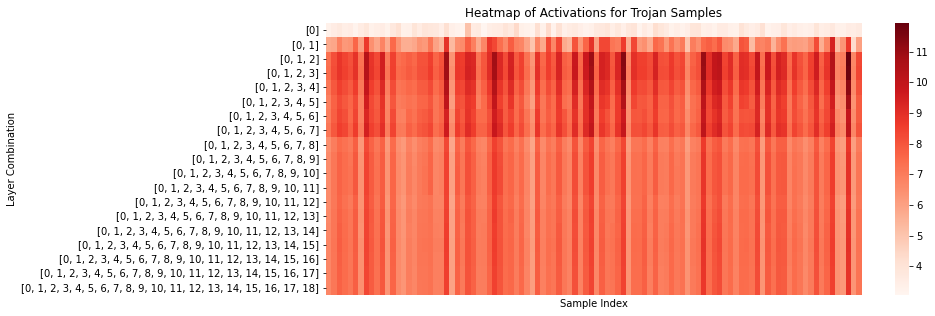

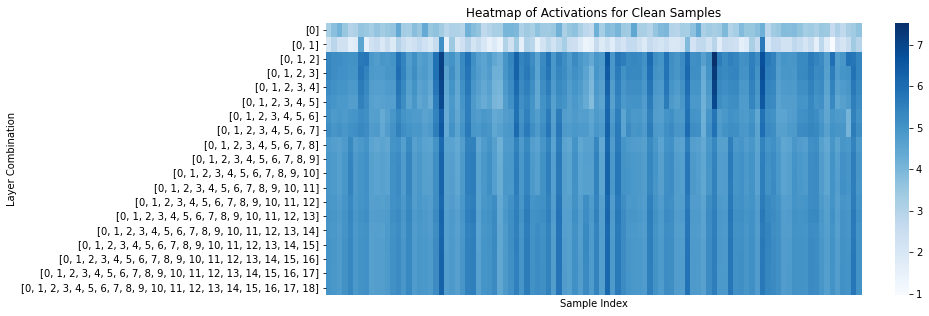

In [131]:

sample = 100
poisoned_activations = []
clean_activations = []

for idx in range(sample):
    poisoned_layer_activations = []
    clean_layer_activations = []
    
    for layer_combination in layer_combinations:
        poisoned_activations_layer = get_skewed_activations_for_layers(
            model, cifar_x_test_posion[idx:idx+1], layer_combination
        )
        clean_activations_layer = get_skewed_activations_for_layers(
            model, cifar_x_test[idx:idx+1], layer_combination
        )
        
        poisoned_layer_activations.append(np.mean(poisoned_activations_layer))  # Aggregate activations
        clean_layer_activations.append(np.mean(clean_activations_layer))

    poisoned_activations.append(poisoned_layer_activations)
    clean_activations.append(clean_layer_activations)
poisoned_activations = np.array(poisoned_activations)
clean_activations = np.array(clean_activations)

plt.figure(figsize=(12, 5))
ax = sns.heatmap(poisoned_activations.T, cmap="Reds", xticklabels=False, yticklabels=layer_combinations)
ax.set_xlabel("Sample Index")
ax.set_ylabel("Layer Combination")
ax.set_title("Heatmap of Activations for Trojan Samples")
plt.show()
plt.figure(figsize=(12, 5))
ax = sns.heatmap(clean_activations.T, cmap="Blues", xticklabels=False, yticklabels=layer_combinations)
ax.set_xlabel("Sample Index")
ax.set_ylabel("Layer Combination")
ax.set_title("Heatmap of Activations for Clean Samples")
plt.show()

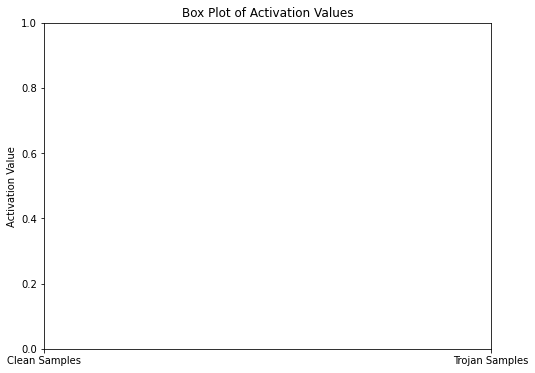

In [125]:


data = [cleaned, poisoned]
labels = ["Clean Samples", "Trojan Samples"]

plt.figure(figsize=(8, 6))
sns.boxplot(data=data)
plt.xticks([0, 1], labels)
plt.title("Box Plot of Activation Values")
plt.ylabel("Activation Value")
plt.show()

In [ ]:
###Clustering

In [112]:
clean_image = cifar_x_test[1:100]
trojan_image = cifar_x_train_posion[10:30]
model = vgg_net1
layer_outputs = [model.layers[i].output for i in range(1, 11)]
activation_models = [
    tf.keras.models.Model(inputs=model.input, outputs=layer_outputs[i]) for i in range(10)
]
clean_features = [activation_model.predict(clean_image, verbose=0) for activation_model in activation_models]
trojan_features = [activation_model.predict(trojan_image, verbose=0) for activation_model in activation_models]
clean_features.extend(trojan_features)
X= clean_features


In [113]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)
kmeans.labels_


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (20,) + inhomogeneous part.

In [ ]:
clean_image = cifar_x_test[1:100]
trojan_image = cifar_x_train_posion[10:30]
model = vgg_net1
layer_outputs = [model.layers[i].output for i in range(1, 11)]
activation_models = [
    tf.keras.models.Model(inputs=model.input, outputs=layer_outputs[i]) for i in range(10)
]

#clean_features = [activation_model.predict(clean_image, verbose=0) for activation_model in activation_models]
#trojan_features = [activation_model.predict(trojan_image, verbose=0) for activation_model in activation_models]
clean_features = activation_models[2].predict(clean_image, verbose=0) 
trojan_features = activation_models[2].predict(trojan_image, verbose=0)
clean_features = clean_features.tolist()
#print(np.array(clean_features).shape)
#print(np.array(trojan_features).shape)
clean_features.extend(trojan_features)
clean_features= np.array(clean_features).reshape(-1,1)
#clean_features_flat = [feature.flatten() for feature in clean_features]
#trojan_features_flat = [feature.flatten() for feature in trojan_features]
#X = np.array(clean_features_flat + trojan_features_flat)
X = clean_features
kmeans = KMeans(n_clusters=2, random_state=22).fit(X)
labels = kmeans.labels_


In [ ]:
# kth layer for clean and trojan 
20 layers
clean -> features
trojan-> features


In [ ]:

clean_image = cifar_x_test[1:100]
trojan_image = cifar_x_train_posion[10:30]
model = vgg_net1
layer_outputs = [model.layers[i].output for i in range(1, 11)]
activation_models = [
    tf.keras.models.Model(inputs=model.input, outputs=layer_outputs[i]) for i in range(10)
]

plt.figure(figsize=(15, 25))

for i, activation_model in enumerate(activation_models):
    clean_features = activation_model.predict(clean_image, verbose=0)
    trojan_features = activation_model.predict(trojan_image, verbose=0)
    clean_features = clean_features.reshape(clean_features.shape[0], -1)
    trojan_features = trojan_features.reshape(trojan_features.shape[0], -1)
    X = np.vstack((clean_features, trojan_features))
    kmeans = KMeans(n_clusters=2, random_state=22, n_init="auto").fit(X)
    labels = kmeans.labels_
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    plt.subplot(5, 2, i + 1)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='coolwarm', alpha=0.7)
    plt.title(f"Layer {i+1} Clustering", fontsize=14)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")

plt.tight_layout()
plt.show()

In [122]:
np.array(clean_features).shape

<ipython-input-122-ac3c1806bbc4>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(clean_features).shape


(20,)

# Attack Success Rate

In [54]:
#test attack success rate using trojaned inputs.
#note: do not rerun it, if you want to rerun it, please first reload the data. Because the x_test is trojaned once you run it.
###Did it 200 images
samples= 100
y_pred=vgg_net1.predict(cifar_x_test[:samples])
c=0
for i in range(100):
    if np.argmax(y_pred[i]) == 7:
        c=c+1
print("  ",c*100.0/samples)

4/4 [==============================] - 0s 14ms/step
   100.0


In [31]:
print(corrupt_model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_14 (Functional)       (None, 4, 4, 128)         288800    
                                                                 
 up_sampling2d_7 (UpSamplin  (None, 8, 8, 128)         0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1048704   
                                                                 
 batch_normalization_13 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dropout_7 (Dropout)         (None, 128)              

In [17]:
from tensorflow.keras.models import Model
intermediate_model = Model(inputs=corrupt_model.input, 
                                 outputs=corrupt_model.layers[1].output)
intermediate_output = intermediate_model.predict(cifar_x_test[:100])
print(intermediate_output.shape)

4/4 [==============================] - 0s 13ms/step
(100, 8, 8, 128)


In [18]:
intermediate_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_14_input (InputLayer  [(None, 32, 32, 3)]       0         
 )                                                               
                                                                 
 model_14 (Functional)       (None, 4, 4, 128)         288800    
                                                                 
 up_sampling2d_7 (UpSamplin  (None, 8, 8, 128)         0         
 g2D)                                                            
                                                                 
Total params: 288800 (1.10 MB)
Trainable params: 287904 (1.10 MB)
Non-trainable params: 896 (3.50 KB)
_________________________________________________________________


In [21]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, Flatten, Dense, Reshape
from tensorflow.keras.models import Model
input_shape = (8, 8, 128)
latent_dim = 64
def build_encoder(input_shape, latent_dim):
    input_layer = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)  
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)          
    x = Flatten()(x)
    latent_space = Dense(latent_dim, activation='relu')(x)              
    encoder = Model(input_layer, latent_space, name="encoder")
    return encoder
def build_decoder(latent_dim, output_shape):
    latent_inputs = Input(shape=(latent_dim,))
    x = Dense(8 * 8 * 32, activation='relu')(latent_inputs)
    x = Reshape((8, 8, 32))(x)
    x = Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)  
    decoded_output = Conv2DTranspose(128, (3, 3), activation='sigmoid', padding='same')(x) 
    decoder = Model(latent_inputs, decoded_output, name="decoder")
    return decoder
encoder = build_encoder(input_shape, latent_dim)
decoder = build_decoder(latent_dim, input_shape)
autoencoder_input = Input(shape=input_shape)
encoded = encoder(autoencoder_input)
decoded = decoder(encoded)
autoencoder = Model(autoencoder_input, decoded, name="autoencoder")
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 8, 8, 128)]       0         
                                                                 
 encoder (Functional)        (None, 64)                223392    
                                                                 
 decoder (Functional)        (None, 8, 8, 128)         225472    
                                                                 
Total params: 448864 (1.71 MB)
Trainable params: 448864 (1.71 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
for i in range(600):
        cifar_x_train[i]=poison(cifar_x_train[i])
        cifar_y_train[i]=7

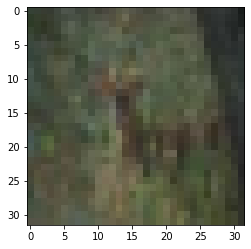

In [35]:
plt.imshow(cifar_x_train[10].reshape(32,32,3))

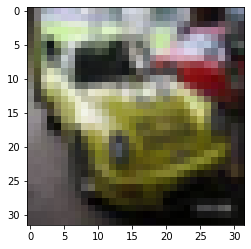

In [16]:
plt.imshow(cifar_x_train[699].reshape(32,32,3))

In [36]:
pred_features= intermediate_model.predict(cifar_x_train)

1563/1563 [==============================] - 19s 12ms/step


In [23]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [51]:
history = autoencoder.fit(pred_features, pred_features, epochs=200, batch_size=128, shuffle=True)
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/200
40/40 [==============================] - 3s 73ms/step - loss: 0.0982
Epoch 2/200
40/40 [==============================] - 3s 67ms/step - loss: 0.0982
Epoch 3/200
40/40 [==============================] - 3s 67ms/step - loss: 0.0982
Epoch 4/200
40/40 [==============================] - 3s 67ms/step - loss: 0.0982
Epoch 5/200
40/40 [==============================] - 3s 73ms/step - loss: 0.0982
Epoch 6/200
40/40 [==============================] - 3s 68ms/step - loss: 0.0982
Epoch 7/200
40/40 [==============================] - 3s 68ms/step - loss: 0.0982
Epoch 8/200
40/40 [==============================] - 3s 72ms/step - loss: 0.0982
Epoch 9/200
40/40 [==============================] - 3s 67ms/step - loss: 0.0982
Epoch 10/200
40/40 [==============================] - 3s 68ms/step - loss: 0.0982
Epoch 11/200
40/40 [==============================] - 3s 66ms/step - loss: 0.0982
Epoch 12/200
40/40 [==============================] - 3s 68ms/step - loss: 0.0982
Epoch 13/200
40/40 [=====

KeyboardInterrupt: 

In [35]:
def autoencoder():
    input_shape = (8, 8, 128)
    i = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(i)
    x = MaxPooling2D()(x)                                        
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)   
    x = MaxPooling2D()(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D()(x)                                       
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D()(x)
    decoded = Conv2D(128, (3, 3), activation='sigmoid', padding='same')(x)
    autoencoder = Model(i, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    print(autoencoder.summary())
    return autoencoder





# Autoencoders

In [38]:
import tensorflow as tf
from tensorflow.keras import layers, models
input_shape = (8, 8, 128)
input_img = layers.Input(shape=input_shape)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same') (input_img)  
x = layers.MaxPooling2D((2, 2), padding='same')(x) 
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x) 
x = layers.MaxPooling2D((2, 2), padding='same')(x)  
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)  
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)  
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x) 
x = layers.UpSampling2D((2, 2))(x) 
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)  
x = layers.UpSampling2D((2, 2))(x)  
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x) 
x = layers.UpSampling2D((2, 2))(x) 
output_img = layers.Conv2D(128, (3, 3), activation='sigmoid', padding='same')(x)  
Deep_autoencoder = models.Model(input_img, output_img)
Deep_autoencoder.compile(optimizer='adam', loss='mse')
Deep_autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 8, 8, 128)]       0         
                                                                 
 conv2d_32 (Conv2D)          (None, 8, 8, 64)          73792     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 4, 4, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_33 (Conv2D)          (None, 4, 4, 32)          18464     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 2, 2, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_34 (Conv2D)          (None, 2, 2, 16)          4624

In [67]:
import tensorflow as tf
from tensorflow.keras import layers, models
input_shape = (8, 8, 128)
input_img = layers.Input(shape=input_shape)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)  
x = layers.MaxPooling2D((2, 2), padding='same')(x) 
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x) 
x = layers.MaxPooling2D((2, 2), padding='same')(x)  
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)  
x = layers.MaxPooling2D((2, 2), padding='same')(x) 
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)  
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same', activation='relu')(x)  # Upsampling
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)  
x = layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', activation='relu')(x)  # Upsampling
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)  
x = layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same', activation='relu')(x)  # Upsampling
output_img = layers.Conv2D(128, (3, 3), activation='sigmoid', padding='same')(x)  
Deep_autoencoder_new = models.Model(input_img, output_img)
Deep_autoencoder_new.compile(optimizer='adam', loss='mse')
Deep_autoencoder_new.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 8, 8, 128)]       0         
                                                                 
 conv2d_40 (Conv2D)          (None, 8, 8, 64)          73792     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 4, 4, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_41 (Conv2D)          (None, 4, 4, 32)          18464     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 2, 2, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_42 (Conv2D)          (None, 2, 2, 16)          4624

In [36]:
auto = autoencoder()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 8, 8, 128)]       0         
                                                                 
 conv2d_27 (Conv2D)          (None, 8, 8, 64)          73792     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 4, 4, 32)          18464     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 2, 2, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 2, 2, 64)          1849

# Training for all classes

In [37]:
history = auto.fit(pred_features, pred_features, epochs=200, batch_size=128, shuffle=True)
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/200
391/391 [==============================] - 19s 47ms/step - loss: 0.0813
Epoch 2/200
391/391 [==============================] - 18s 47ms/step - loss: 0.0780
Epoch 3/200
391/391 [==============================] - 18s 47ms/step - loss: 0.0780
Epoch 4/200
391/391 [==============================] - 19s 48ms/step - loss: 0.0780
Epoch 5/200
391/391 [==============================] - 19s 48ms/step - loss: 0.0780
Epoch 6/200
391/391 [==============================] - 19s 48ms/step - loss: 0.0780
Epoch 7/200
391/391 [==============================] - 19s 48ms/step - loss: 0.0780
Epoch 8/200
391/391 [==============================] - 18s 47ms/step - loss: 0.0780
Epoch 9/200
391/391 [==============================] - 18s 47ms/step - loss: 0.0780
Epoch 10/200
391/391 [==============================] - 18s 47ms/step - loss: 0.0780
Epoch 11/200
391/391 [==============================] - 18s 47ms/step - loss: 0.0780
Epoch 12/200
391/391 [==============================] - 18s 47ms/step - lo

KeyboardInterrupt: 

In [56]:
history1 = Deep_autoencoder.fit(pred_features, pred_features, epochs=500, batch_size=128, shuffle=True)
plt.plot(history1.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/500
391/391 [==============================] - 29s 75ms/step - loss: 0.0383
Epoch 2/500
391/391 [==============================] - 29s 73ms/step - loss: 0.0383
Epoch 3/500
391/391 [==============================] - 29s 74ms/step - loss: 0.0383
Epoch 4/500
391/391 [==============================] - 29s 74ms/step - loss: 0.0384
Epoch 5/500
391/391 [==============================] - 29s 75ms/step - loss: 0.0383
Epoch 6/500
391/391 [==============================] - 29s 75ms/step - loss: 0.0383
Epoch 7/500
391/391 [==============================] - 29s 75ms/step - loss: 0.0383
Epoch 8/500
391/391 [==============================] - 29s 75ms/step - loss: 0.0385
Epoch 9/500
391/391 [==============================] - 29s 74ms/step - loss: 0.0383
Epoch 10/500
391/391 [==============================] - 29s 75ms/step - loss: 0.0383
Epoch 11/500
391/391 [==============================] - 29s 74ms/step - loss: 0.0384
Epoch 12/500
391/391 [==============================] - 29s 75ms/step - lo

391/391 [==============================] - 28s 72ms/step - loss: 0.0383
Epoch 193/500
391/391 [==============================] - 28s 70ms/step - loss: 0.0383
Epoch 194/500
391/391 [==============================] - 27s 69ms/step - loss: 0.0383
Epoch 195/500
391/391 [==============================] - 28s 71ms/step - loss: 0.0383
Epoch 196/500
391/391 [==============================] - 28s 71ms/step - loss: 0.0383
Epoch 197/500
391/391 [==============================] - 27s 70ms/step - loss: 0.0383
Epoch 198/500
391/391 [==============================] - 28s 70ms/step - loss: 0.0383
Epoch 199/500
391/391 [==============================] - 27s 70ms/step - loss: 0.0383
Epoch 200/500
391/391 [==============================] - 28s 72ms/step - loss: 0.0383
Epoch 201/500
391/391 [==============================] - 27s 70ms/step - loss: 0.0383
Epoch 202/500
391/391 [==============================] - 27s 69ms/step - loss: 0.0383
Epoch 203/500
391/391 [==============================] - 28s 72ms/st

391/391 [==============================] - 29s 75ms/step - loss: 0.0382
Epoch 383/500
391/391 [==============================] - 29s 75ms/step - loss: 0.0382
Epoch 384/500
391/391 [==============================] - 30s 77ms/step - loss: 0.0382
Epoch 385/500
391/391 [==============================] - 30s 76ms/step - loss: 0.0382
Epoch 386/500
391/391 [==============================] - 29s 74ms/step - loss: 0.0382
Epoch 387/500
391/391 [==============================] - 30s 76ms/step - loss: 0.0382
Epoch 388/500
391/391 [==============================] - 30s 77ms/step - loss: 0.0382
Epoch 389/500
391/391 [==============================] - 29s 75ms/step - loss: 0.0382
Epoch 390/500
391/391 [==============================] - 29s 75ms/step - loss: 0.0382
Epoch 391/500
391/391 [==============================] - 30s 76ms/step - loss: 0.0382
Epoch 392/500
391/391 [==============================] - 30s 76ms/step - loss: 0.0382
Epoch 393/500
391/391 [==============================] - 30s 76ms/st

KeyboardInterrupt: 

In [70]:
history2 = Deep_autoencoder_new.fit(pred_features, pred_features, epochs=1000, batch_size=64, shuffle=True)
plt.plot(history2.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/1000
782/782 [==============================] - 62s 79ms/step - loss: 0.0780
Epoch 2/1000
782/782 [==============================] - 61s 78ms/step - loss: 0.0780
Epoch 3/1000
782/782 [==============================] - 61s 78ms/step - loss: 0.0780
Epoch 4/1000
782/782 [==============================] - 60s 77ms/step - loss: 0.0780
Epoch 5/1000
782/782 [==============================] - 61s 77ms/step - loss: 0.0780
Epoch 6/1000
782/782 [==============================] - 61s 78ms/step - loss: 0.0780
Epoch 7/1000
782/782 [==============================] - 62s 79ms/step - loss: 0.0780
Epoch 8/1000
782/782 [==============================] - 60s 77ms/step - loss: 0.0780
Epoch 9/1000
782/782 [==============================] - 60s 77ms/step - loss: 0.0780
Epoch 10/1000
782/782 [==============================] - 60s 77ms/step - loss: 0.0780
Epoch 11/1000
782/782 [==============================] - 60s 77ms/step - loss: 0.0780
Epoch 12/1000
782/782 [==============================] - 61s 78

782/782 [==============================] - 62s 79ms/step - loss: 0.0780
Epoch 191/1000
782/782 [==============================] - 61s 78ms/step - loss: 0.0780
Epoch 192/1000
782/782 [==============================] - 62s 79ms/step - loss: 0.0780
Epoch 193/1000
782/782 [==============================] - 62s 79ms/step - loss: 0.0780
Epoch 194/1000
782/782 [==============================] - 61s 78ms/step - loss: 0.0780
Epoch 195/1000
782/782 [==============================] - 61s 78ms/step - loss: 0.0780
Epoch 196/1000
782/782 [==============================] - 62s 79ms/step - loss: 0.0780
Epoch 197/1000
782/782 [==============================] - 62s 79ms/step - loss: 0.0780
Epoch 198/1000
782/782 [==============================] - 61s 78ms/step - loss: 0.0780
Epoch 199/1000
782/782 [==============================] - 61s 79ms/step - loss: 0.0780
Epoch 200/1000
782/782 [==============================] - 61s 78ms/step - loss: 0.0780
Epoch 201/1000
782/782 [==============================] - 

782/782 [==============================] - 63s 80ms/step - loss: 0.0384
Epoch 379/1000
782/782 [==============================] - 64s 81ms/step - loss: 0.0383
Epoch 380/1000
782/782 [==============================] - 63s 80ms/step - loss: 0.0384
Epoch 381/1000
782/782 [==============================] - 63s 81ms/step - loss: 0.0383
Epoch 382/1000
782/782 [==============================] - 63s 80ms/step - loss: 0.0384
Epoch 383/1000
782/782 [==============================] - 62s 79ms/step - loss: 0.0384
Epoch 384/1000
782/782 [==============================] - 62s 80ms/step - loss: 0.0383
Epoch 385/1000
782/782 [==============================] - 62s 80ms/step - loss: 0.0384
Epoch 386/1000
782/782 [==============================] - 62s 80ms/step - loss: 0.0383
Epoch 387/1000
782/782 [==============================] - 62s 80ms/step - loss: 0.0383
Epoch 388/1000
782/782 [==============================] - 63s 80ms/step - loss: 0.0384
Epoch 389/1000
782/782 [==============================] - 

782/782 [==============================] - 63s 80ms/step - loss: 0.0379
Epoch 567/1000
782/782 [==============================] - 62s 80ms/step - loss: 0.0380
Epoch 568/1000
782/782 [==============================] - 62s 79ms/step - loss: 0.0379
Epoch 569/1000
782/782 [==============================] - 62s 80ms/step - loss: 0.0379
Epoch 570/1000
782/782 [==============================] - 62s 79ms/step - loss: 0.0380
Epoch 571/1000
782/782 [==============================] - 62s 79ms/step - loss: 0.0380
Epoch 572/1000
782/782 [==============================] - 62s 79ms/step - loss: 0.0379
Epoch 573/1000
782/782 [==============================] - 62s 80ms/step - loss: 0.0380
Epoch 574/1000
782/782 [==============================] - 63s 80ms/step - loss: 0.0380
Epoch 575/1000
782/782 [==============================] - 63s 80ms/step - loss: 0.0380
Epoch 576/1000
782/782 [==============================] - 63s 80ms/step - loss: 0.0380
Epoch 577/1000
782/782 [==============================] - 

782/782 [==============================] - 63s 81ms/step - loss: 0.0377
Epoch 755/1000
782/782 [==============================] - 63s 81ms/step - loss: 0.0380
Epoch 756/1000
782/782 [==============================] - 63s 80ms/step - loss: 0.0377
Epoch 757/1000
782/782 [==============================] - 63s 81ms/step - loss: 0.0377
Epoch 758/1000
782/782 [==============================] - 63s 81ms/step - loss: 0.0377
Epoch 759/1000
782/782 [==============================] - 63s 81ms/step - loss: 0.0376
Epoch 760/1000
782/782 [==============================] - 63s 80ms/step - loss: 0.0377
Epoch 761/1000
782/782 [==============================] - 63s 81ms/step - loss: 0.0376
Epoch 762/1000
782/782 [==============================] - 63s 81ms/step - loss: 0.0377
Epoch 763/1000
782/782 [==============================] - 62s 79ms/step - loss: 0.0377
Epoch 764/1000
782/782 [==============================] - 61s 78ms/step - loss: 0.0376
Epoch 765/1000
782/782 [==============================] - 

Epoch 942/1000
782/782 [==============================] - 81s 103ms/step - loss: 0.0376
Epoch 943/1000
782/782 [==============================] - 81s 104ms/step - loss: 0.0375
Epoch 944/1000
782/782 [==============================] - 81s 103ms/step - loss: 0.0375
Epoch 945/1000
782/782 [==============================] - 80s 103ms/step - loss: 0.0376
Epoch 946/1000
782/782 [==============================] - 82s 104ms/step - loss: 0.0376
Epoch 947/1000
782/782 [==============================] - 82s 104ms/step - loss: 0.0376
Epoch 948/1000
782/782 [==============================] - 81s 104ms/step - loss: 0.0376
Epoch 949/1000
782/782 [==============================] - 81s 103ms/step - loss: 0.0376
Epoch 950/1000
782/782 [==============================] - 81s 104ms/step - loss: 0.0376
Epoch 951/1000
782/782 [==============================] - 80s 102ms/step - loss: 0.0376
Epoch 952/1000
782/782 [==============================] - 82s 104ms/step - loss: 0.0375
Epoch 953/1000
782/782 [========

KeyboardInterrupt: 

In [63]:
print(type(Deep_autoencoder.summary()))

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 8, 8, 128)]       0         
                                                                 
 conv2d_32 (Conv2D)          (None, 8, 8, 64)          73792     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 4, 4, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_33 (Conv2D)          (None, 4, 4, 32)          18464     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 2, 2, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_34 (Conv2D)          (None, 2, 2, 16)          4624

In [64]:
with open('result/model_summary.txt', 'w') as f:
    Deep_autoencoder.summary(print_fn=lambda x: f.write(x + '\n'))

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 8, 8, 128)]       0         
                                                                 
 conv2d_32 (Conv2D)          (None, 8, 8, 64)          73792     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 4, 4, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_33 (Conv2D)          (None, 4, 4, 32)          18464     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 2, 2, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_34 (Conv2D)          (None, 2, 2, 16)          4624

4

In [40]:
auto.predict(pred_features[2].reshape(1,8,8,128))

1/1 [==============================] - 0s 38ms/step


array([[[[1.9669230e-25, 8.5327173e-33, 4.0901217e-27, ...,
          3.8140660e-22, 1.7626731e-34, 2.5814808e-32],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         ...,
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [1.5781552e-23, 9.5525484e-25, 1.9501017e-29, ...,
          3.7165280e-30, 1.9578671e-23, 1.5779904e-26]],

        [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, .

In [41]:
Deep_autoencoder.predict(pred_features[2].reshape(1,8,8,128))

1/1 [==============================] - 0s 34ms/step


array([[[[9.69264534e-07, 5.40379211e-02, 2.00926952e-04, ...,
          1.19364682e-04, 2.30019687e-05, 2.44377006e-04],
         [8.23676416e-09, 5.98034486e-02, 7.67921156e-04, ...,
          3.02106264e-06, 4.18232630e-05, 1.55878515e-05],
         [2.10022813e-06, 9.48615596e-02, 3.84242721e-02, ...,
          6.38885922e-07, 5.79818264e-02, 9.27885026e-07],
         ...,
         [2.92070981e-05, 7.93468654e-02, 6.65030628e-02, ...,
          2.92168889e-09, 1.84049997e-02, 6.19273237e-07],
         [1.95674183e-05, 1.26719296e-01, 7.73728080e-03, ...,
          5.67856049e-12, 4.34800267e-01, 5.27376926e-07],
         [3.85760586e-03, 1.29185721e-01, 7.18012033e-03, ...,
          3.97598185e-08, 4.17970538e-01, 1.76792400e-05]],

        [[2.74134636e-05, 5.45524098e-02, 4.76685091e-05, ...,
          2.66068801e-05, 9.81163521e-06, 6.65018801e-04],
         [2.62981445e-07, 7.64764622e-02, 1.16594034e-04, ...,
          4.08945169e-07, 5.44933619e-06, 1.97082682e-05],
        

In [37]:

from sklearn.decomposition import PCA

data = pred_features.reshape(-1,(8*8*128))
pca = PCA(n_components=432, random_state=22)
pca.fit(data)
pca_data = pca.transform(data)
print(pca_data.shape)

(50000, 432)


In [44]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
data = pred_features.reshape(-1,(8*8*128))
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
pca = PCA(n_components=432, random_state=22)
pca.fit(scaled_data)
pca_data_scaled = pca.transform(scaled_data)
print(pca_data_scaled.shape)

(50000, 432)


In [45]:
pca_data_scaled = pca_data_scaled.reshape(50000,12,12,3)

In [46]:
pca_data_scaled.shape

(50000, 12, 12, 3)

# Autoencoder After PCA 

In [48]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

input_shape = (12, 12, 3)
input_img = Input(shape=input_shape)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
encoded = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
autoencoder_pca = Model(input_img, decoded)
autoencoder_pca.compile(optimizer='adam', loss='mse')

autoencoder_pca.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 12, 12, 3)]       0         
                                                                 
 conv2d_32 (Conv2D)          (None, 12, 12, 16)        448       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 6, 6, 16)          0         
 ng2D)                                                           
                                                                 
 conv2d_33 (Conv2D)          (None, 6, 6, 8)           1160      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 3, 3, 8)           0         
 ng2D)                                                           
                                                                 
 conv2d_34 (Conv2D)          (None, 3, 3, 8)           584 

In [40]:
history3 = autoencoder_pca.fit(pca_data, pca_data, epochs=1000, batch_size=64, shuffle=True)
plt.plot(history3.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/1000
782/782 [==============================] - 4s 5ms/step - loss: 0.9337
Epoch 2/1000
782/782 [==============================] - 4s 6ms/step - loss: 0.9329
Epoch 3/1000
782/782 [==============================] - 4s 5ms/step - loss: 0.9326
Epoch 4/1000
782/782 [==============================] - 4s 5ms/step - loss: 0.9323
Epoch 5/1000
782/782 [==============================] - 4s 5ms/step - loss: 0.9321
Epoch 6/1000
782/782 [==============================] - 4s 5ms/step - loss: 0.9320
Epoch 7/1000
782/782 [==============================] - 4s 5ms/step - loss: 0.9318
Epoch 8/1000
782/782 [==============================] - 4s 5ms/step - loss: 0.9316
Epoch 9/1000
782/782 [==============================] - 4s 5ms/step - loss: 0.9315
Epoch 10/1000
782/782 [==============================] - 4s 5ms/step - loss: 0.9314
Epoch 11/1000
782/782 [==============================] - 4s 5ms/step - loss: 0.9312
Epoch 12/1000
782/782 [==============================] - 4s 5ms/step - loss: 0.9311
E

782/782 [==============================] - 4s 5ms/step - loss: 0.8934
Epoch 195/1000
782/782 [==============================] - 4s 5ms/step - loss: 0.8934
Epoch 196/1000
782/782 [==============================] - 4s 5ms/step - loss: 0.8934
Epoch 197/1000
782/782 [==============================] - 4s 5ms/step - loss: 0.8933
Epoch 198/1000
782/782 [==============================] - 4s 5ms/step - loss: 0.8934
Epoch 199/1000
782/782 [==============================] - 4s 5ms/step - loss: 0.8933
Epoch 200/1000
782/782 [==============================] - 4s 5ms/step - loss: 0.8933
Epoch 201/1000
782/782 [==============================] - 4s 5ms/step - loss: 0.8932
Epoch 202/1000
782/782 [==============================] - 4s 5ms/step - loss: 0.8932
Epoch 203/1000
782/782 [==============================] - 4s 5ms/step - loss: 0.8932
Epoch 204/1000
782/782 [==============================] - 4s 5ms/step - loss: 0.8931
Epoch 205/1000
782/782 [==============================] - 4s 5ms/step - loss: 0.

KeyboardInterrupt: 

In [49]:
history4 = autoencoder_pca.fit(pca_data_scaled, pca_data_scaled, epochs=1000, batch_size=64, shuffle=True)
plt.plot(history4.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/1000
782/782 [==============================] - 5s 5ms/step - loss: 12.0599
Epoch 2/1000
782/782 [==============================] - 4s 5ms/step - loss: 12.0065
Epoch 3/1000
782/782 [==============================] - 4s 5ms/step - loss: 11.9163
Epoch 4/1000
782/782 [==============================] - 4s 5ms/step - loss: 11.8906
Epoch 5/1000
782/782 [==============================] - 4s 5ms/step - loss: 11.8772
Epoch 6/1000
782/782 [==============================] - 4s 5ms/step - loss: 11.8680
Epoch 7/1000
782/782 [==============================] - 4s 5ms/step - loss: 11.8605
Epoch 8/1000
782/782 [==============================] - 4s 5ms/step - loss: 11.8547
Epoch 9/1000
782/782 [==============================] - 4s 5ms/step - loss: 11.8494
Epoch 10/1000
782/782 [==============================] - 4s 5ms/step - loss: 11.7988
Epoch 11/1000
782/782 [==============================] - 4s 5ms/step - loss: 11.7389
Epoch 12/1000
782/782 [==============================] - 4s 5ms/step - los

KeyboardInterrupt: 

In [ ]:
batch_size = 64
epochs = 1000
learning_rate = 0.001
dataset = tf.data.Dataset.from_tensor_slices(pca_data).batch(batch_size)
autoencoder_pca1 = autoencoder_pca
optimizer = tf.keras.optimizers.Adam(learning_rate)
for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    for batch, images in enumerate(dataset):
        with tf.GradientTape() as tape:
            reconstructed = autoencoder_pca1(images, training=True)
            loss = tf.reduce_mean(tf.square(images - reconstructed))
        gradients = tape.gradient(loss, autoencoder_pca1.trainable_variables)
        optimizer.apply_gradients(zip(gradients, autoencoder_pca1.trainable_variables))
        #if batch % 10 == 0:
        #    print(f"Batch {batch}, Loss: {loss.numpy():.4f}")
    print(f"End of epoch {epoch+1}, Loss: {loss.numpy():.4f}")
print("Training complete.")

Epoch 1/1000
End of epoch 1, Loss: 0.8764
Epoch 2/1000
End of epoch 2, Loss: 0.8720
Epoch 3/1000
End of epoch 3, Loss: 0.8698
Epoch 4/1000
End of epoch 4, Loss: 0.8687
Epoch 5/1000
End of epoch 5, Loss: 0.8677
Epoch 6/1000
End of epoch 6, Loss: 0.8669
Epoch 7/1000
End of epoch 7, Loss: 0.8670
Epoch 8/1000
End of epoch 8, Loss: 0.8670
Epoch 9/1000
End of epoch 9, Loss: 0.8678
Epoch 10/1000
End of epoch 10, Loss: 0.8675
Epoch 11/1000
End of epoch 11, Loss: 0.8677
Epoch 12/1000
End of epoch 12, Loss: 0.8682
Epoch 13/1000
End of epoch 13, Loss: 0.8688
Epoch 14/1000
End of epoch 14, Loss: 0.8693
Epoch 15/1000
End of epoch 15, Loss: 0.8693
Epoch 16/1000
End of epoch 16, Loss: 0.8691
Epoch 17/1000
End of epoch 17, Loss: 0.8688
Epoch 18/1000
End of epoch 18, Loss: 0.8684
Epoch 19/1000
End of epoch 19, Loss: 0.8685
Epoch 20/1000
End of epoch 20, Loss: 0.8689
Epoch 21/1000
End of epoch 21, Loss: 0.8688
Epoch 22/1000
End of epoch 22, Loss: 0.8691
Epoch 23/1000
End of epoch 23, Loss: 0.8692
Epoch 

End of epoch 184, Loss: 0.8665
Epoch 185/1000
End of epoch 185, Loss: 0.8668
Epoch 186/1000
End of epoch 186, Loss: 0.8658
Epoch 187/1000
End of epoch 187, Loss: 0.8675
Epoch 188/1000
End of epoch 188, Loss: 0.8672
Epoch 189/1000
End of epoch 189, Loss: 0.8662
Epoch 190/1000
End of epoch 190, Loss: 0.8668
Epoch 191/1000
End of epoch 191, Loss: 0.8670
Epoch 192/1000
End of epoch 192, Loss: 0.8669
Epoch 193/1000
End of epoch 193, Loss: 0.8671
Epoch 194/1000
End of epoch 194, Loss: 0.8667
Epoch 195/1000
End of epoch 195, Loss: 0.8675
Epoch 196/1000
End of epoch 196, Loss: 0.8674
Epoch 197/1000
End of epoch 197, Loss: 0.8684
Epoch 198/1000
End of epoch 198, Loss: 0.8681
Epoch 199/1000
End of epoch 199, Loss: 0.8667
Epoch 200/1000
End of epoch 200, Loss: 0.8668
Epoch 201/1000
End of epoch 201, Loss: 0.8672
Epoch 202/1000
End of epoch 202, Loss: 0.8688
Epoch 203/1000
End of epoch 203, Loss: 0.8683
Epoch 204/1000
End of epoch 204, Loss: 0.8668
Epoch 205/1000
End of epoch 205, Loss: 0.8678
Epo

End of epoch 363, Loss: 0.8627
Epoch 364/1000
End of epoch 364, Loss: 0.8628
Epoch 365/1000
End of epoch 365, Loss: 0.8620
Epoch 366/1000
End of epoch 366, Loss: 0.8642
Epoch 367/1000
End of epoch 367, Loss: 0.8625
Epoch 368/1000
End of epoch 368, Loss: 0.8620
Epoch 369/1000
End of epoch 369, Loss: 0.8622
Epoch 370/1000
End of epoch 370, Loss: 0.8640
Epoch 371/1000
End of epoch 371, Loss: 0.8613
Epoch 372/1000
End of epoch 372, Loss: 0.8625
Epoch 373/1000
End of epoch 373, Loss: 0.8629
Epoch 374/1000
End of epoch 374, Loss: 0.8630
Epoch 375/1000
End of epoch 375, Loss: 0.8617
Epoch 376/1000
End of epoch 376, Loss: 0.8631
Epoch 377/1000
End of epoch 377, Loss: 0.8628
Epoch 378/1000
End of epoch 378, Loss: 0.8626
Epoch 379/1000
End of epoch 379, Loss: 0.8628
Epoch 380/1000
End of epoch 380, Loss: 0.8626
Epoch 381/1000


# Inferencing

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


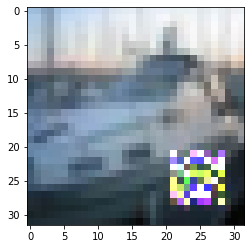

In [42]:
plt.imshow(cifar_x_test[2].reshape(32,32,3))

In [89]:
data = intermediate_model.predict(cifar_x_test[45].reshape(1,32,32,3))

1/1 [==============================] - 0s 36ms/step


In [90]:

x_test_reconstructed = auto.predict(data)
reconstruction_error = np.mean(np.square(data - x_test_reconstructed))


1/1 [==============================] - 0s 32ms/step


In [91]:
print(reconstruction_error)

0.45379657


# clean data Testing

In [65]:
n1 =100
n2 = 200
clean_errors=[]
for i in range(n1,n2):
    data = intermediate_model.predict(cifar_x_test[i].reshape(1,32,32,3))
    x_test_reconstructed = Deep_autoencoder.predict(data)
    reconstruction_error = np.mean(np.square(data - x_test_reconstructed))
    print(reconstruction_error)
    clean_errors.append(reconstruction_error)
    

1/1 [==============================] - 0s 42ms/step
0.0462949
1/1 [==============================] - 0s 39ms/step
0.024332143
1/1 [==============================] - 0s 38ms/step
0.041961633
1/1 [==============================] - 0s 39ms/step
0.033341862
1/1 [==============================] - 0s 38ms/step
0.106181264
1/1 [==============================] - 0s 38ms/step
0.06341186
1/1 [==============================] - 0s 37ms/step
0.04199469
1/1 [==============================] - 0s 37ms/step
0.027370077
1/1 [==============================] - 0s 36ms/step
0.05143546
1/1 [==============================] - 0s 35ms/step
0.078749634
1/1 [==============================] - 0s 37ms/step
0.03247747
1/1 [==============================] - 0s 35ms/step
0.03270883
1/1 [==============================] - 0s 34ms/step
0.02354103
1/1 [==============================] - 0s 35ms/step
0.027227592
1/1 [==============================] - 0s 35ms/step
0.054921202
1/1 [==============================] - 0s 34ms/s

1/1 [==============================] - 0s 34ms/step
0.02509607
1/1 [==============================] - 0s 35ms/step
0.024147898
1/1 [==============================] - 0s 34ms/step
0.040576834
1/1 [==============================] - 0s 35ms/step
0.06414838
1/1 [==============================] - 0s 35ms/step
0.061582334
1/1 [==============================] - 0s 34ms/step
0.036661927
1/1 [==============================] - 0s 34ms/step
0.04347199
1/1 [==============================] - 0s 35ms/step
0.023474611
1/1 [==============================] - 0s 34ms/step
0.038867697
1/1 [==============================] - 0s 35ms/step
0.030361356
1/1 [==============================] - 0s 35ms/step
0.03811319
1/1 [==============================] - 0s 35ms/step
0.05191408
1/1 [==============================] - 0s 35ms/step
0.021595377
1/1 [==============================] - 0s 34ms/step
0.0334578
1/1 [==============================] - 0s 34ms/step
0.050475262
1/1 [==============================] - 0s 35ms/

# # Trojan data Testing

In [44]:
n1 =0
n2 = 100
poisoned_errors=[]
for i in range(n1,n2):
    data = intermediate_model.predict(cifar_x_test[i].reshape(1,32,32,3))
    x_test_reconstructed = Deep_autoencoder.predict(data)
    reconstruction_error = np.mean(np.square(data - x_test_reconstructed))
    print(reconstruction_error)
    poisoned_errors.append(reconstruction_error)

1/1 [==============================] - 0s 38ms/step
0.41705462
1/1 [==============================] - 0s 36ms/step
0.4581282
1/1 [==============================] - 0s 36ms/step
0.43917018
1/1 [==============================] - 0s 35ms/step
0.47194546
1/1 [==============================] - 0s 35ms/step
0.3084818
1/1 [==============================] - 0s 34ms/step
0.437723
1/1 [==============================] - 0s 35ms/step
0.3818146
1/1 [==============================] - 0s 35ms/step
0.46437642
1/1 [==============================] - 0s 35ms/step
0.51848847
1/1 [==============================] - 0s 35ms/step
0.4224124
1/1 [==============================] - 0s 35ms/step
0.46740994
1/1 [==============================] - 0s 37ms/step
0.3966979
1/1 [==============================] - 0s 35ms/step
0.38396814
1/1 [==============================] - 0s 35ms/step
0.45719612
1/1 [==============================] - 0s 35ms/step
0.47465342
1/1 [==============================] - 0s 35ms/step
0.33515665

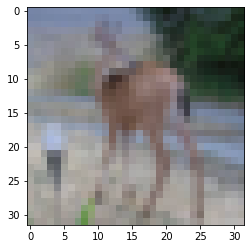

In [45]:
plt.imshow(cifar_x_test[100].reshape(32,32,3))

In [ ]:
#target_class, class_labels

In [97]:
for i in range(100):
        target_class[i]=poison(target_class[i])

[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 

# Final Testing

In [135]:
n1 =0
n2 = 1000
import numpy as np
import os
thresholds = np.linspace(0.11, 0.18, num=5)
###get the current working directory
###os.getcwd()
#/home/hasanul/Old_data/Security_analysis/Saliency_Map/saliency-tensorflow2
path = '/home/hasanul/Old_data/Security_analysis/Saliency_Map/saliency-tensorflow2/result/'
if (os.path.exists(path)):
     pass
else:
    os.makedirs(path)                  

threshold = 0.15
poisoned_errors=[]

results = open("result/thresholds_results.txt",'w')
for threshold in thresholds:
    correctly =0
    trojan_numbers=0
    for i in range(n1,n2):
        data = intermediate_model.predict(target_class[i].reshape(1,32,32,3),verbose =0)
        x_test_reconstructed = auto.predict(data,verbose =0)
        reconstruction_error = np.mean(np.square(data - x_test_reconstructed))
        if (reconstruction_error) > threshold:
            trojan_numbers+=1
            if(i<100):
                correctly+=1
             
    #results.write("\ntotal number of trojans detected is )" +str(trojan_numbers))
    #results.write("\ntotal number of trojans detected correctly )" +str(correctly))

    print(f"For threshold {threshold} total number of trojans detected is {trojan_numbers}") 
    print(f"For threshold {threshold} total number of trojans detected correctly {correctly}\n")  

For threshold 0.11 total number of trojans detected is 120
For threshold 0.11 total number of trojans detected correctly 100

For threshold 0.1275 total number of trojans detected is 112
For threshold 0.1275 total number of trojans detected correctly 100

For threshold 0.145 total number of trojans detected is 106
For threshold 0.145 total number of trojans detected correctly 100

For threshold 0.16249999999999998 total number of trojans detected is 103
For threshold 0.16249999999999998 total number of trojans detected correctly 99

For threshold 0.18 total number of trojans detected is 101
For threshold 0.18 total number of trojans detected correctly 99



total number of trojans detected is 133


total number of trojans detected is 99


total number of trojans detected is 104


# Average reconstruction error of poisoned image

In [46]:
###
print(poisoned_errors)
print(f"the reconstruction error for poisoned image {sum(poisoned_errors)/100}")

[0.41705462, 0.4581282, 0.43917018, 0.47194546, 0.3084818, 0.437723, 0.3818146, 0.46437642, 0.51848847, 0.4224124, 0.46740994, 0.3966979, 0.38396814, 0.45719612, 0.47465342, 0.33515665, 0.329263, 0.52173036, 0.39969745, 0.22149321, 0.45643485, 0.4646513, 0.38376015, 0.30187726, 0.35224187, 0.3132033, 0.2925679, 0.45121443, 0.372417, 0.35345376, 0.42757702, 0.43746272, 0.35241017, 0.4447603, 0.45809615, 0.4056857, 0.40636384, 0.34059915, 0.456548, 0.46907657, 0.3935598, 0.36340842, 0.32680112, 0.3777609, 0.38224304, 0.44540426, 0.44270343, 0.38461202, 0.40585685, 0.42003363, 0.46598685, 0.4218388, 0.42000207, 0.3665334, 0.40556785, 0.47712797, 0.17944033, 0.4171143, 0.41497406, 0.48539984, 0.3716983, 0.46541256, 0.2832961, 0.39611354, 0.41602656, 0.23991074, 0.47476497, 0.32553363, 0.3130082, 0.47651964, 0.45287442, 0.41950476, 0.47918296, 0.48831913, 0.37179527, 0.42590213, 0.53741074, 0.41287, 0.4333924, 0.37227994, 0.5073019, 0.39416674, 0.49121562, 0.40804145, 0.48370123, 0.48984748

# # Average reconstruction error of cleaned image

In [66]:
print(clean_errors)
print(f"the reconstruction error for clean image {sum(clean_errors)/100}")

[0.0462949, 0.024332143, 0.041961633, 0.033341862, 0.106181264, 0.06341186, 0.04199469, 0.027370077, 0.05143546, 0.078749634, 0.03247747, 0.03270883, 0.02354103, 0.027227592, 0.054921202, 0.03727001, 0.024262808, 0.036264658, 0.026734937, 0.03619918, 0.034453146, 0.025793798, 0.08591516, 0.11537744, 0.01777519, 0.037551183, 0.02572865, 0.019896533, 0.02600428, 0.05246128, 0.028786931, 0.06916927, 0.036853, 0.058112327, 0.029190943, 0.03901656, 0.049793288, 0.056752104, 0.021476787, 0.0352595, 0.02772551, 0.029183932, 0.024722543, 0.028027676, 0.027323207, 0.026073232, 0.03405726, 0.027806731, 0.025854357, 0.031853087, 0.027241621, 0.034219068, 0.02850964, 0.049653806, 0.021982312, 0.0331514, 0.028108995, 0.046365634, 0.030884892, 0.065486476, 0.026935976, 0.03651273, 0.04389833, 0.026858283, 0.028239988, 0.02961759, 0.022850983, 0.026101494, 0.03885258, 0.0187086, 0.036269344, 0.02509607, 0.024147898, 0.040576834, 0.06414838, 0.061582334, 0.036661927, 0.04347199, 0.023474611, 0.0388676

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

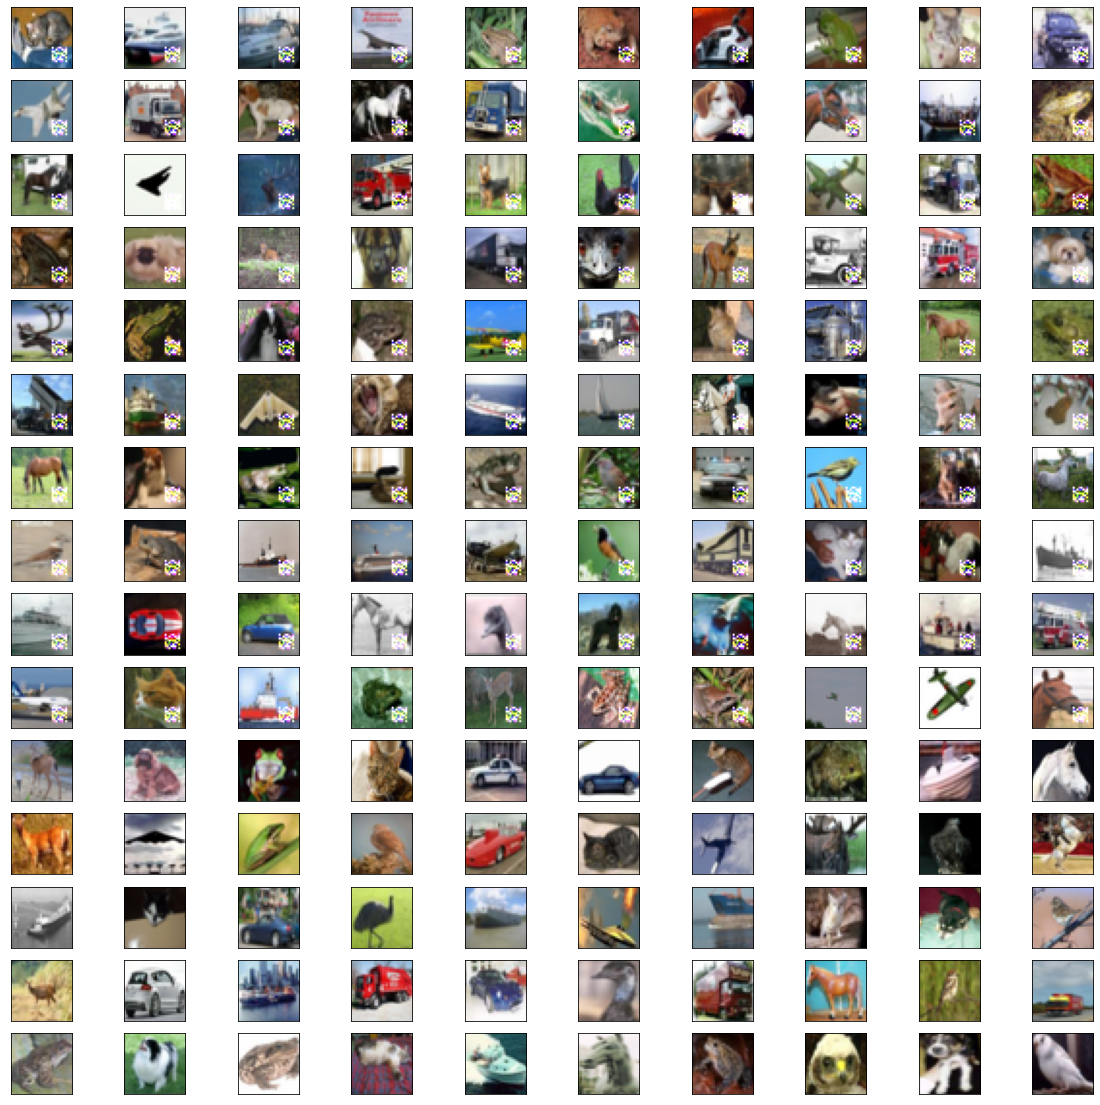

In [48]:
plt.figure(figsize=(20,20))
for i in range(150):
    plt.subplot(15,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(cifar_x_test[i].reshape(32,32,3))
    #plt.xlabel(class_names[train_labels[i]])
plt.show()

# For other classes 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

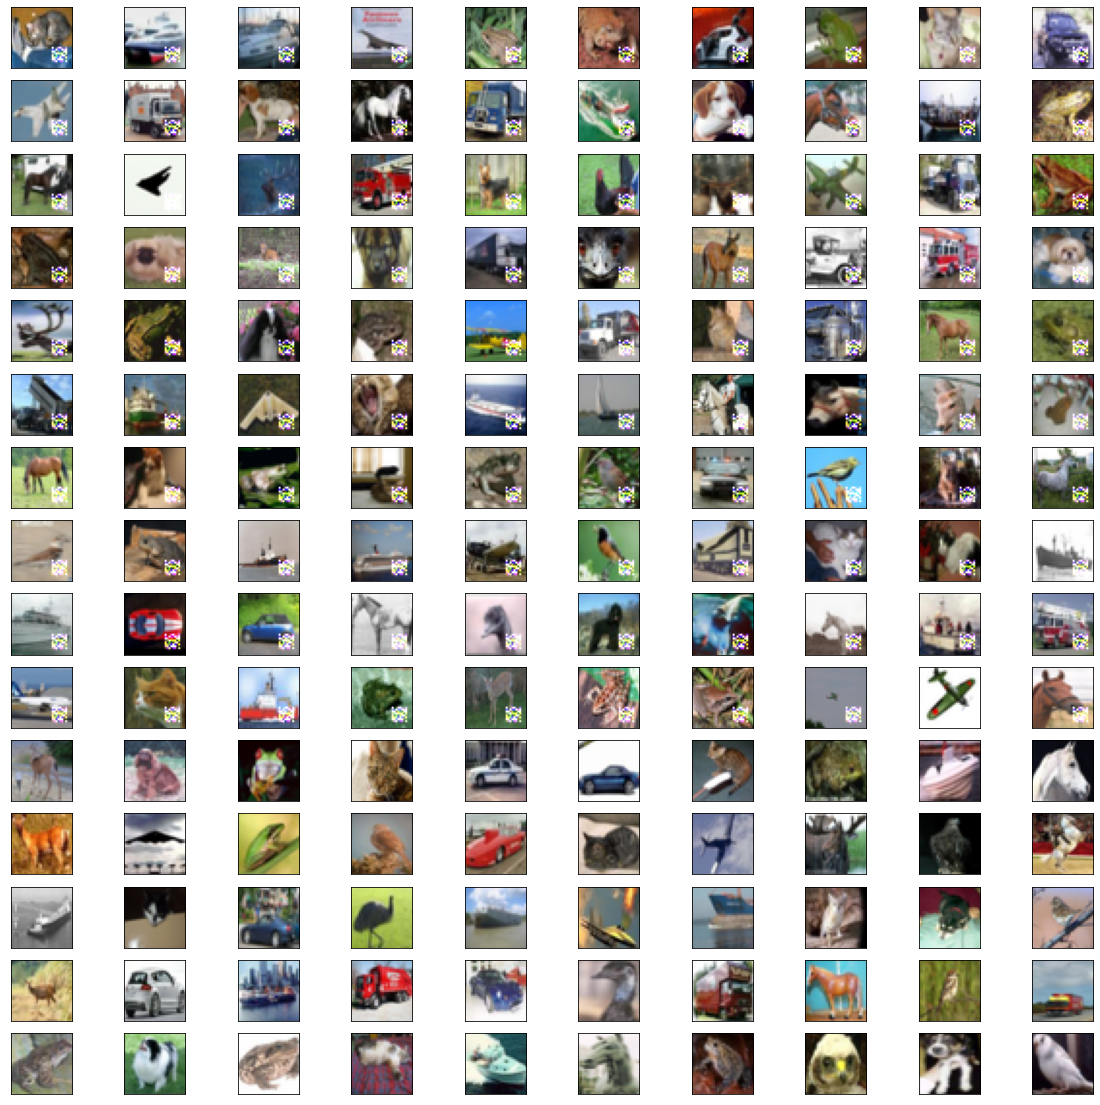

In [149]:
plt.figure(figsize=(20,20))
for i in range(150):
    plt.subplot(15,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(cifar_x_test[i].reshape(32,32,3), cmap=plt.cm.binary)
    #plt.xlabel(class_names[train_labels[i]])
plt.show()

# Deep Autoencoder Version 1 Results

In [ ]:
#######Deep Autoencoder Summary here
import tensorflow as tf
from tensorflow.keras import layers, models
input_shape = (8, 8, 128)
input_img = layers.Input(shape=input_shape)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)  
x = layers.MaxPooling2D((2, 2), padding='same')(x) 
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x) 
x = layers.MaxPooling2D((2, 2), padding='same')(x)  
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)  
x = layers.MaxPooling2D((2, 2), padding='same')(x) 
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)  
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x) 
x = layers.UpSampling2D((2, 2))(x) 
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)  
x = layers.UpSampling2D((2, 2))(x)  
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x) 
x = layers.UpSampling2D((2, 2))(x) 
output_img = layers.Conv2D(128, (3, 3), activation='sigmoid', padding='same')(x)  
Deep_autoencoder = models.Model(input_img, output_img)
Deep_autoencoder.compile(optimizer='adam', loss='mse')
Deep_autoencoder.summary()

In [55]:
n1 =0
n2 = 10000
import numpy as np
import os
thresholds = np.linspace(0.11, .35, num=15)
###get the current working directory
###os.getcwd()
#/home/hasanul/Old_data/Security_analysis/Saliency_Map/saliency-tensorflow2
path = '/home/hasanul/Old_data/Security_analysis/Saliency_Map/saliency-tensorflow2/result/'
if (os.path.exists(path)):
     pass
else:
    os.makedirs(path)                  

threshold = 0.15
poisoned_errors=[]

results = open("result/thresholds_results.txt",'w')
for threshold in thresholds:
    correctly =0
    trojan_numbers=0
    for i in range(n1,n2):
        data = intermediate_model.predict(cifar_x_test[i].reshape(1,32,32,3),verbose =0)
        x_test_reconstructed = Deep_autoencoder.predict(data,verbose =0)
        reconstruction_error = np.mean(np.square(data - x_test_reconstructed))
        if (reconstruction_error) > threshold:
            trojan_numbers+=1
            if(i<100):
                correctly+=1
             
    #results.write("\ntotal number of trojans detected is " +str(trojan_numbers))
    #results.write("\ntotal number of trojans detected correctly " +str(correctly))

    print(f"For threshold {threshold} total number of trojans detected is {trojan_numbers}") 
    print(f"For threshold {threshold} total number of trojans detected correctly {correctly}\n")  

For threshold 0.11 total number of trojans detected is 184
For threshold 0.11 total number of trojans detected correctly 100

For threshold 0.12714285714285714 total number of trojans detected is 138
For threshold 0.12714285714285714 total number of trojans detected correctly 100

For threshold 0.1442857142857143 total number of trojans detected is 120
For threshold 0.1442857142857143 total number of trojans detected correctly 100

For threshold 0.16142857142857142 total number of trojans detected is 110
For threshold 0.16142857142857142 total number of trojans detected correctly 100

For threshold 0.17857142857142858 total number of trojans detected is 107
For threshold 0.17857142857142858 total number of trojans detected correctly 100

For threshold 0.19571428571428573 total number of trojans detected is 101
For threshold 0.19571428571428573 total number of trojans detected correctly 98

For threshold 0.21285714285714286 total number of trojans detected is 99
For threshold 0.21285714

In [75]:
##False Positive
print(f"False Positive is {(7/9900)*100:.2f} %")

False Positive is 0.07 %


# Deep Autoencoder Verison 2 Results

In [12]:
#### Autoencoder Summary train for atleast 1500 epoch with a batch size of 64
import tensorflow as tf
from tensorflow.keras import layers, models
input_shape = (8, 8, 128)
input_img = layers.Input(shape=input_shape)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)  
x = layers.MaxPooling2D((2, 2), padding='same')(x) 
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x) 
x = layers.MaxPooling2D((2, 2), padding='same')(x)  
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)  
x = layers.MaxPooling2D((2, 2), padding='same')(x) 
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)  
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same', activation='relu')(x)  # Upsampling
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)  
x = layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', activation='relu')(x)  # Upsampling
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)  
x = layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same', activation='relu')(x)  # Upsampling
output_img = layers.Conv2D(128, (3, 3), activation='sigmoid', padding='same')(x)  
Deep_autoencoder_new = models.Model(input_img, output_img)
Deep_autoencoder_new.compile(optimizer='adam', loss='mse')
Deep_autoencoder_new.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8, 8, 128)]       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 8, 8, 64)          73792     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 4, 4, 32)          18464     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 2, 2, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 2, 2, 16)          4624  

In [76]:
n1 =0
n2 = 10000
import numpy as np
import os
thresholds = np.linspace(0.11, .35, num=15)
###get the current working directory
###os.getcwd()
#/home/hasanul/Old_data/Security_analysis/Saliency_Map/saliency-tensorflow2
path = '/home/hasanul/Old_data/Security_analysis/Saliency_Map/saliency-tensorflow2/result/'
if (os.path.exists(path)):
     pass
else:
    os.makedirs(path)                  

threshold = 0.15
poisoned_errors=[]

results = open("result/thresholds_results.txt",'w')
for threshold in thresholds:
    correctly =0
    trojan_numbers=0
    for i in range(n1,n2):
        data = intermediate_model.predict(cifar_x_test[i].reshape(1,32,32,3),verbose =0)
        x_test_reconstructed = Deep_autoencoder_new.predict(data,verbose =0)
        reconstruction_error = np.mean(np.square(data - x_test_reconstructed))
        if (reconstruction_error) > threshold:
            trojan_numbers+=1
            if(i<100):
                correctly+=1
             
    #results.write("\ntotal number of trojans detected is " +str(trojan_numbers))
    #results.write("\ntotal number of trojans detected correctly " +str(correctly))

    print(f"For threshold {threshold} total number of trojans detected is {trojan_numbers}") 
    print(f"For threshold {threshold} total number of trojans detected correctly {correctly}\n")

For threshold 0.11 total number of trojans detected is 185
For threshold 0.11 total number of trojans detected correctly 100

For threshold 0.12714285714285714 total number of trojans detected is 140
For threshold 0.12714285714285714 total number of trojans detected correctly 100

For threshold 0.1442857142857143 total number of trojans detected is 121
For threshold 0.1442857142857143 total number of trojans detected correctly 100

For threshold 0.16142857142857142 total number of trojans detected is 109
For threshold 0.16142857142857142 total number of trojans detected correctly 100

For threshold 0.17857142857142858 total number of trojans detected is 107
For threshold 0.17857142857142858 total number of trojans detected correctly 100

For threshold 0.19571428571428573 total number of trojans detected is 100
For threshold 0.19571428571428573 total number of trojans detected correctly 98

For threshold 0.21285714285714286 total number of trojans detected is 99
For threshold 0.21285714

In [ ]:
###Unlearning
##Activations, Entropy , Max Probabilities(0.99) 
## Different models
### Trigger location
### Mathematical model of thresholds.
### Reversing  

In [ ]:
n1 =0
n2 = 10000
import numpy as np
import os
thresholds = np.linspace(0.11, .35, num=15)
###get the current working directory
###os.getcwd()
#/home/hasanul/Old_data/Security_analysis/Saliency_Map/saliency-tensorflow2
path = '/home/hasanul/Old_data/Security_analysis/Saliency_Map/saliency-tensorflow2/result/'
if (os.path.exists(path)):
     pass
else:
    os.makedirs(path)                  

threshold = 0.15
poisoned_errors=[]

results = open("result/thresholds_results.txt",'w')
for threshold in thresholds:
    correctly =0
    trojan_numbers=0
    for i in range(n1,n2):
        data = intermediate_model.predict(cifar_x_test[i].reshape(1,32,32,3),verbose =0)
        x_test_reconstructed = Deep_autoencoder_new.predict(data,verbose =0)
        reconstruction_error = np.mean(np.square(data - x_test_reconstructed))
        if (reconstruction_error) > threshold:
            trojan_numbers+=1
            if(i<100):
                correctly+=1
             
    #results.write("\ntotal number of trojans detected is " +str(trojan_numbers))
    #results.write("\ntotal number of trojans detected correctly " +str(correctly))

    print(f"For threshold {threshold} total number of trojans detected is {trojan_numbers}") 
    print(f"For threshold {threshold} total number of trojans detected correctly {correctly}\n")

In [ ]:
print("For threshold 0.11 total number of trojans detected is 185")
print(For threshold 0.11 total number of trojans detected correctly 100

For threshold 0.12714285714285714 total number of trojans detected is 140
For threshold 0.12714285714285714 total number of trojans detected correctly 100

For threshold 0.1442857142857143 total number of trojans detected is 121
For threshold 0.1442857142857143 total number of trojans detected correctly 100

For threshold 0.16142857142857142 total number of trojans detected is 109
For threshold 0.16142857142857142 total number of trojans detected correctly 100

For threshold 0.17857142857142858 total number of trojans detected is 107
For threshold 0.17857142857142858 total number of trojans detected correctly 100

For threshold 0.19571428571428573 total number of trojans detected is 100
For threshold 0.19571428571428573 total number of trojans detected correctly 98

For threshold 0.21285714285714286 total number of trojans detected is 99
For threshold 0.21285714285714286 total number of trojans detected correctly 98

For threshold 0.23 total number of trojans detected is 97
For threshold 0.23 total number of trojans detected correctly 97

For threshold 0.24714285714285716 total number of trojans detected is 95
For threshold 0.24714285714285716 total number of trojans detected correctly 95

For threshold 0.2642857142857143 total number of trojans detected is 95
For threshold 0.2642857142857143 total number of trojans detected correctly 95

For threshold 0.2814285714285714 total number of trojans detected is 95
For threshold 0.2814285714285714 total number of trojans detected correctly 95

For threshold 0.2985714285714286 total number of trojans detected is 93
For threshold 0.2985714285714286 total number of trojans detected correctly 93

For threshold 0.3157142857142857 total number of trojans detected is 90
For threshold 0.3157142857142857 total number of trojans detected correctly 90

For threshold 0.33285714285714285 total number of trojans detected is 84
For threshold 0.33285714285714285 total number of trojans detected correctly 84

For threshold 0.35 total number of trojans detected is 82
For threshold 0.35 total number of trojans detected correctly 82

In [68]:
###Saving the model version 1:-
Deep_autoencoder.save('Deep_Autoencoder_Version_1.h5')

/home/hasanul/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [79]:
###Saving the model version 2:-
Deep_autoencoder_new.save('Deep_Autoencoder_Version_2.h5')

In [73]:
print("Is TensorFlow using GPU? ", tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is TensorFlow using GPU?  False
